In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import lightgbm as lgb
from scipy.misc import derivative
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import matplotlib
import sklearn
import scipy
import seaborn as sns
import sys
import warnings


import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

import graphviz
from  sklearn.model_selection  import train_test_split
from  sklearn.tree             import DecisionTreeClassifier
from  sklearn.neural_network   import MLPClassifier
from  sklearn.metrics          import accuracy_score
from  sklearn                  import tree
from  sklearn.metrics          import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from graphviz import Digraph
from catboost import CatBoostRegressor
from scipy.stats import norm
from sklearn.tree import export_graphviz
import pydot
from scipy.stats import skew
from matplotlib import pyplot
import scipy.stats as stats
import lightgbm as lgb
import seaborn as sns
from sklearn import tree
#import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib
import warnings
import graphviz
import sklearn
import scipy
import json
import sys
import csv
import re
import os
from math import sqrt

Using TensorFlow backend.


In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.1.2
sklearn: 0.21.2
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.4
Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

In [4]:
df = pd.read_excel("./CaseStudyData_2020.xlsx")
df.head()

Unnamed: 0  Target  Var_1 Var_2 Var_3    Var_4  Var_5  Var_6  Var_7  Var_8  \
0           0       0      0     L     Y 1750.000      1 36.000     86   2606   
1           1       0      0     1     N 1300.000     12    nan     13    406   
2           2       0      0     0     N    0.000      0    nan    274   8337   
3           3       1      0     L     Y  800.000      3 37.000      6      8   
4           4       0      0     1     N 6250.000      0    nan    126   3833   

   ... Var_41  Var_42 Var_43  Var_44  Var_45 Var_46 Var_47  Var_48  Var_49  \
0  ...  5.000     nan    nan       Y       N    nan      0       N       N   
1  ... 15.000     nan    nan       Y       N    nan      0       N       N   
2  ...    nan     nan    nan       Y       N    nan      0       N       N   
3  ...    nan     nan    nan       N       N    nan      0       N       N   
4  ...    nan   0.000    nan       Y       N    nan      0       N       N   

   Var_50  
0       Y  
1       Y  
2       N  
3       Y  
4       N  

[5 rows x 52 columns]

In [5]:
df.take([0],axis=1)

Unnamed: 0
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
11             11
12             12
13             13
14             14
15             15
16             16
17             17
18             18
19             19
20             20
21             21
22             22
23             23
24             24
25             25
26             26
27             27
28             28
29             29
...           ...
34554       34554
34555       34555
34556       34556
34557       34557
34558       34558
34559       34559
34560       34560
34561       34561
34562       34562
34563       34563
34564       34564
34565       34565
34566       34566
34567       34567
34568       34568
34569       34569
34570       34570
34571       34571
34572       34572
34573       34573
34574       34574
34575       34575
34576       34576
34577       34577
34578       34578
34579       34579
34580       34580
34581       34581
34582       34582
34583       34583

[34584 rows x 1 columns]

In [6]:
#drop first unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
headers = pd.read_excel("./CaseStudyData_2020.xlsx", sheet_name="Var_Descr")

In [8]:
headers = headers["Description"]

In [9]:
df.columns = headers
df.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description Worst Account Status All Credits Any Legal Action YN  \
0                                          L                   Y   
1                                          1                   N   
2                                          0                   N   
3                                          L                   Y   
4                                          1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date MO Number of months in 1 delay_L6M  \
0                            5.000                                nan   
1                           15.000                                nan   
2                              nan                                nan   
3                              nan                                nan   
4                              nan                              0.000   

Description  MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
0                                                   nan                Y   
1                                                   nan                Y   
2                                                   nan                Y   
3                                                   nan                N   
4                                                   nan                Y   

Description OD_Pending Credit_YN CC Number of months in 2 delay_L12M  \
0                              N                                 nan   
1                              N                                 nan   
2                              N                                 nan   
3                              N                                 nan   
4                              N                                 nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             N   
1                                     0             N   
2                                     0             N   
3                                     0             N   
4                                     0             N   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           N                             Y  
1                                           N                             Y  
2      

In [10]:
df.shape #SHAPE OF DATASET

(34584, 51)

In [11]:
(df.isna().sum()*100)/df.shape[0] #CHECK NaN COLUMNS

Description
Good_Bad_Flag                                  0.000
CC Num of application_L1M                      0.000
Worst Account Status All Credits               0.000
Any Legal Action YN                            0.000
Existing Credit Card Previous Limit           24.494
LO Num of application_L6M                      0.000
TS Last Legal Action                          83.952
TS Oldest Open Credit Card                     0.000
CC TS First Open Active Credit Card            0.000
Last Credit Decision                          26.162
Total Assets_3                                 0.043
Any Legal Action no date YN                   81.963
TS Last Closed good account                   11.659
CC Num of application_L6M                      0.000
Home Phone YN                                  5.933
Employers Address YN                           0.000
AMC_Transfer_Outstanding                      46.944
Existing Customer Limit                       23.786
CC Total Payment of all Credit car

In [12]:
df.describe()

Description  Good_Bad_Flag  CC Num of application_L1M  \
count            34584.000                  34584.000   
mean                 0.048                      0.099   
std                  0.213                      0.424   
min                  0.000                      0.000   
25%                  0.000                      0.000   
50%                  0.000                      0.000   
75%                  0.000                      0.000   
max                  1.000                     11.000   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
count                                  26113.000                  34584.000   
mean                                    1790.203                      3.449   
std                                     3410.281                      5.224   
min                                        0.000                      0.000   
25%                                        0.000                      1.000   
50%                                      200.000                      2.000   
75%                                     2400.000                      4.000   
max                                    80000.000                    231.000   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
count                    5550.000                   34584.000   
mean                       31.412                      73.428   
std                        17.922                      68.804   
min                         1.000                       0.000   
25%                        17.000                      13.000   
50%                        31.000                      56.000   
75%                        45.000                     117.000   
max                       214.000                     350.000   

Description  CC TS First Open Active Credit Card  Total Assets_3  \
count                                  34584.000       34569.000   
mean                                    1983.584        2418.822   
std                                     2096.732       34151.200   
min                                        0.000           0.000   
25%                                       32.000           0.000   
50%                                     1356.000           2.000   
75%                                     3307.000         112.000   
max                                    10657.000     4170043.000   

Description  TS Last Closed good account  CC Num of application_L6M  ...  \
count                          30552.000                  34584.000  ...   
mean                               9.883                      0.540  ...   
std                               11.366                      1.322  ...   
min                                0.000                      0.000  ...   
25%                                2.000                      0.000  ...   
50%                                6.000                      0.000  ...   
75%                               13.000                      1.000  ...   
max                               61.000                     45.000  ...   

Description  Total Amount of Open Mortgage Loans  \
count                                  34584.000   
mean                                    2221.040   
std                                    26802.596   
min                                        0.000   
25%                                        0.000   
50%                                        0.000   
75%                                        0.000   
max                                  3281755.000   

Description  OD Number of months in 2 delay_L24M  \
count                                   1169.000   
mean                                       0.380   
std                                        1.080   
min                                        0.000   
25%                                        0.000   
50%                                        0.000   
75%                                        0.000   
max  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34584 entries, 0 to 34583
Data columns (total 51 columns):
Good_Bad_Flag                                  34584 non-null int64
CC Num of application_L1M                      34584 non-null int64
Worst Account Status All Credits               34584 non-null object
Any Legal Action YN                            34584 non-null object
Existing Credit Card Previous Limit            26113 non-null float64
LO Num of application_L6M                      34584 non-null int64
TS Last Legal Action                           5550 non-null float64
TS Oldest Open Credit Card                     34584 non-null int64
CC TS First Open Active Credit Card            34584 non-null int64
Last Credit Decision                           25536 non-null object
Total Assets_3                                 34569 non-null float64
Any Legal Action no date YN                    6238 non-null object
TS Last Closed good account                    30552 non-null float

In [14]:
print("Good Flag ratio is:",len(df[df['Good_Bad_Flag'] == 1])*100 / df.shape[0],"%")

Good Flag ratio is: 4.768100855887115 %


So we have an imbalance dataset.

In [15]:
# Check if we have duplicate rows
print('rows and columns: ' + str(df.shape))
df_no_duplicate = df.drop_duplicates()
print('rows and columns after removing duplicates:' + str(df_no_duplicate.shape))
print('Ratio is {}%'.format(((df.shape[0]-df_no_duplicate.shape[0])/df.shape[0])*100))

rows and columns: (34584, 51)
rows and columns after removing duplicates:(34582, 51)
Ratio is 0.005783021050196623%


Two duplicated rows, but continue with initial data ==> df

In [16]:
 # Check unique values in each columns
for column in df.columns:
    print(column,'\n',len(df[column].unique()),df[column].dtypes)

Good_Bad_Flag 
 2 int64
CC Num of application_L1M 
 10 int64
Worst Account Status All Credits 
 9 object
Any Legal Action YN 
 2 object
Existing Credit Card Previous Limit 
 527 float64
LO Num of application_L6M 
 78 int64
TS Last Legal Action 
 99 float64
TS Oldest Open Credit Card 
 344 int64
CC TS First Open Active Credit Card 
 7023 int64
Last Credit Decision 
 4 object
Total Assets_3 
 3731 float64
Any Legal Action no date YN 
 3 object
TS Last Closed good account 
 63 float64
CC Num of application_L6M 
 27 int64
Home Phone YN 
 3 object
Employers Address YN 
 2 object
AMC_Transfer_Outstanding 
 1446 float64
Existing Customer Limit 
 438 float64
CC Total Payment of all Credit cards 
 5286 int64
OD Tot Outstanding Balance YTL 
 5189 int64
Residential Status 
 6 float64
Time in Employment 
 441 float64
CC Number of months in 1 delay_L12M 
 56 float64
Last Declared Monthly Income_L3M 
 2198 int64
Monthly Net Income 
 3670 int64
Employment Field 
 64 float64
Tenure 
 229 int64
Monthly

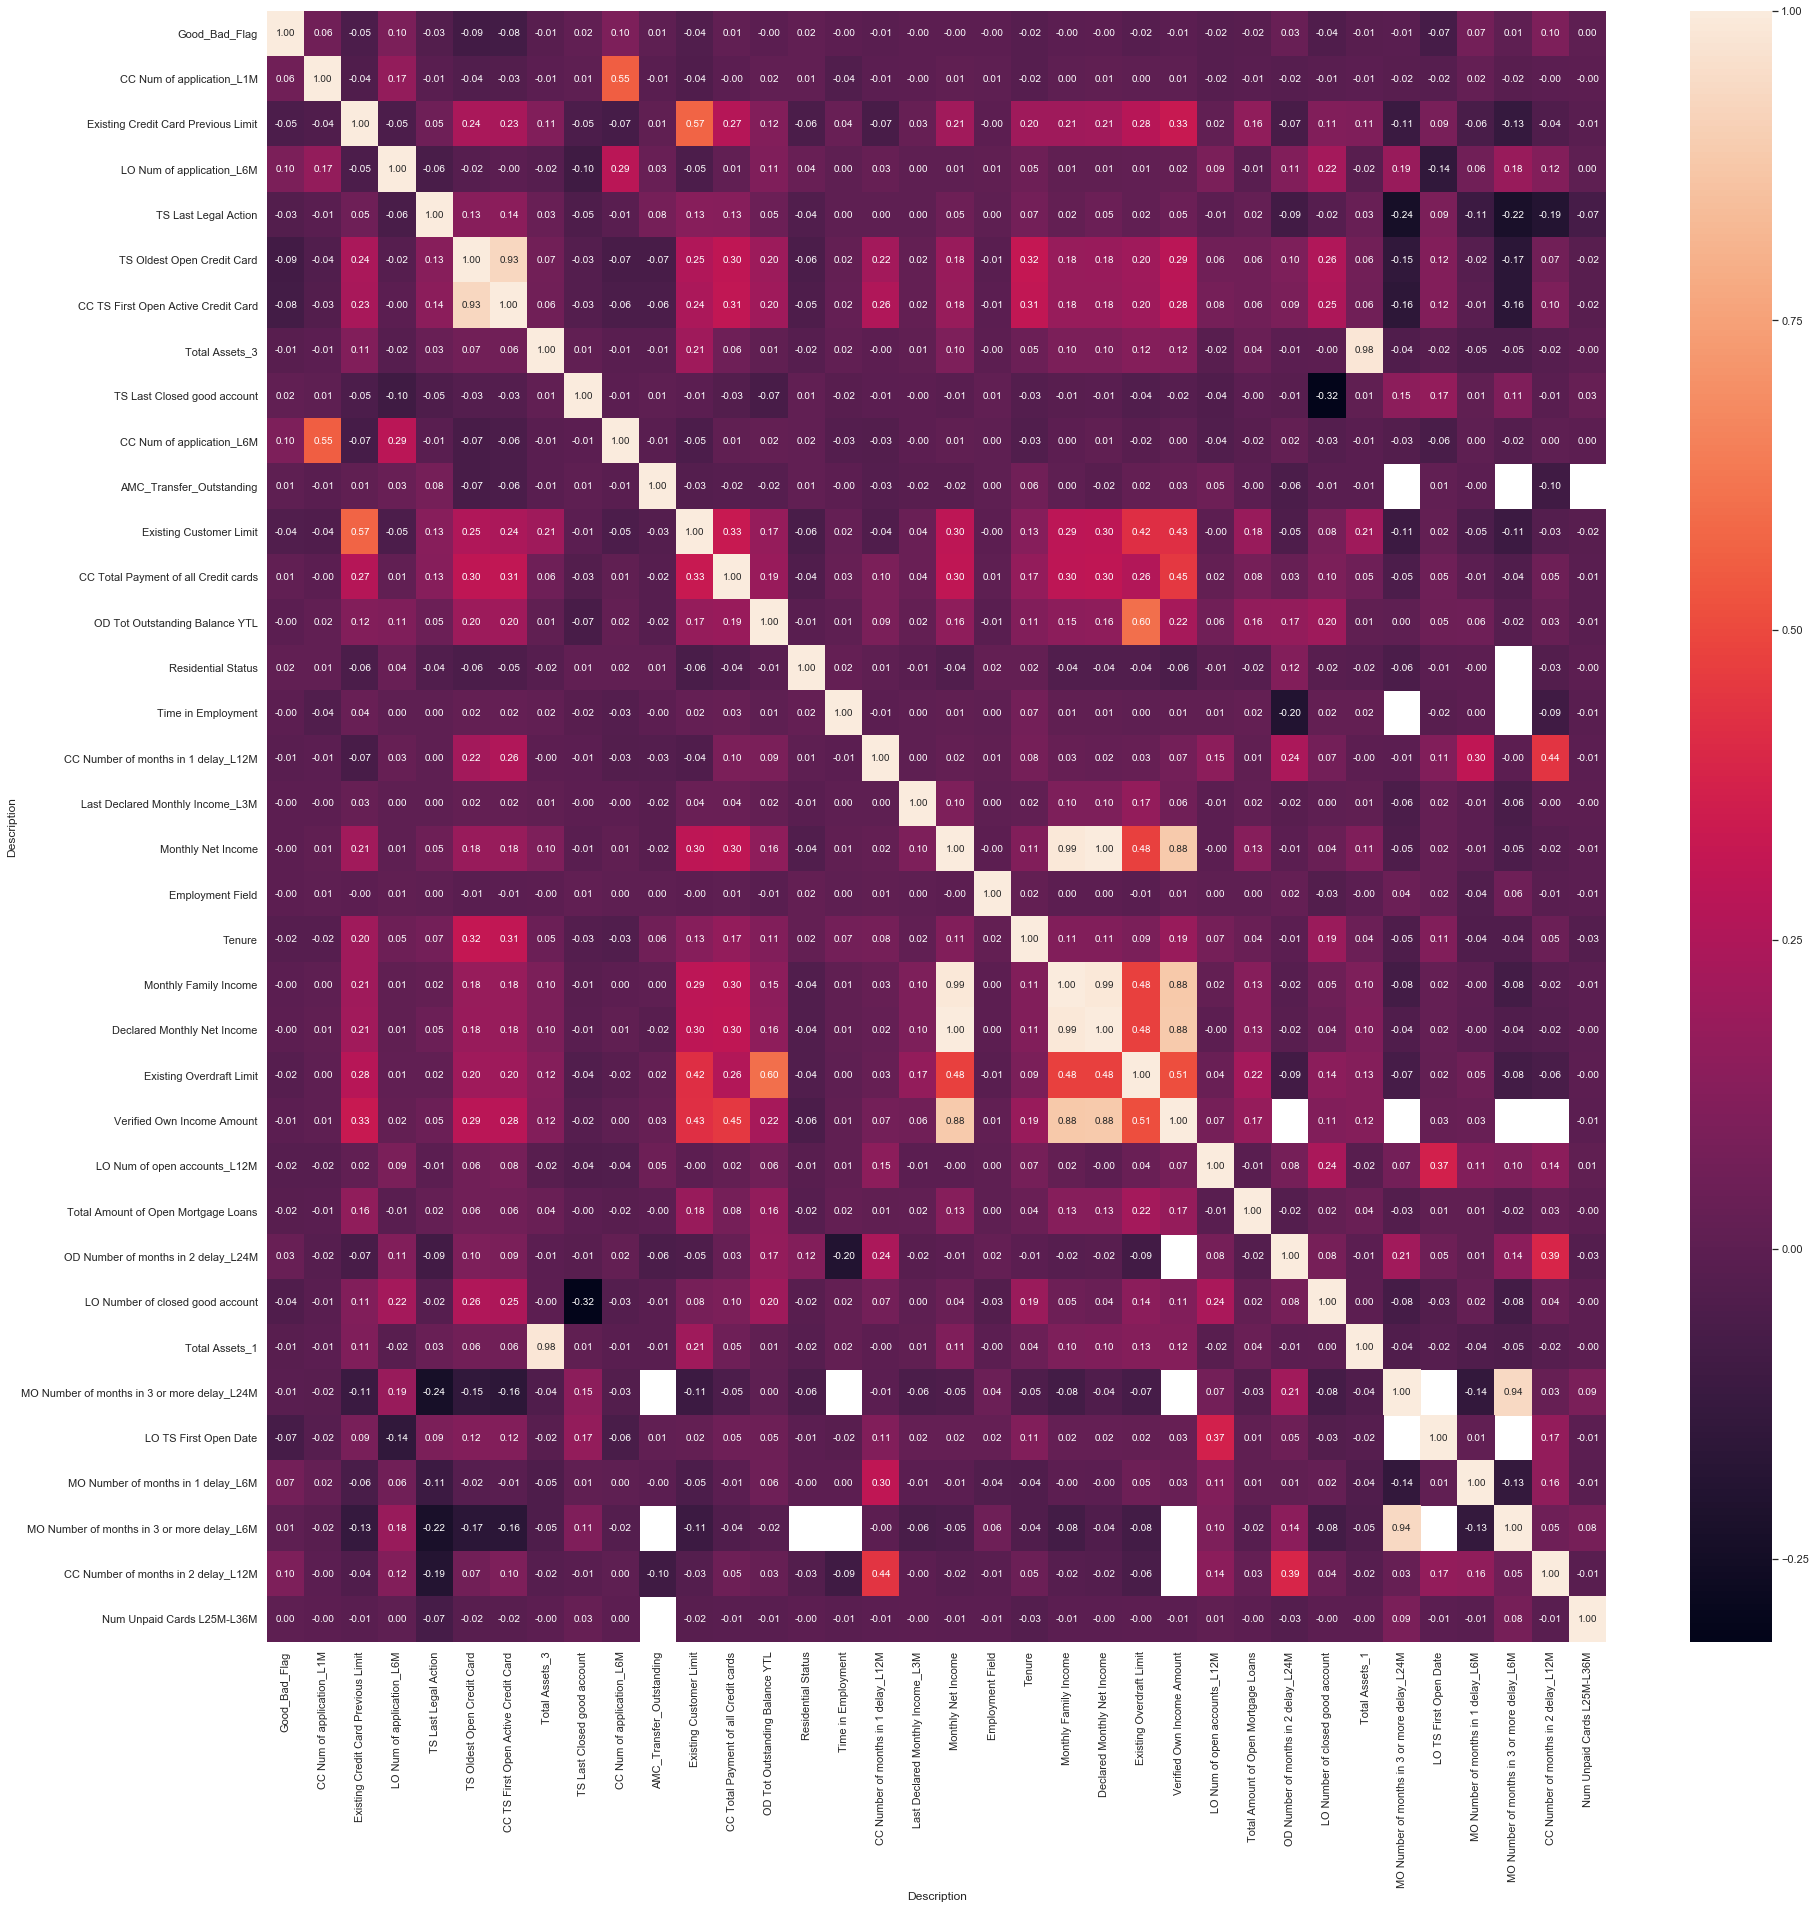

In [17]:
plt.figure(figsize=(30,30)) # CORRELATION HEATMAP
sns.heatmap(df.corr(), annot=True, fmt=".2f")

plt.show()

In [18]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [19]:
# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] >= 0.85)]
to_drop

['CC TS First Open Active Credit Card',
 'Monthly Family Income',
 'Declared Monthly Net Income',
 'Verified Own Income Amount',
 'Total Assets_1',
 'MO Number of months in 3 or more delay_L6M']

In [20]:
#drop columns with corr greater than 90%
df_no_corr = df.drop(to_drop, axis=1) 

In [21]:
df_no_corr.shape, df.shape

((34584, 45), (34584, 51))

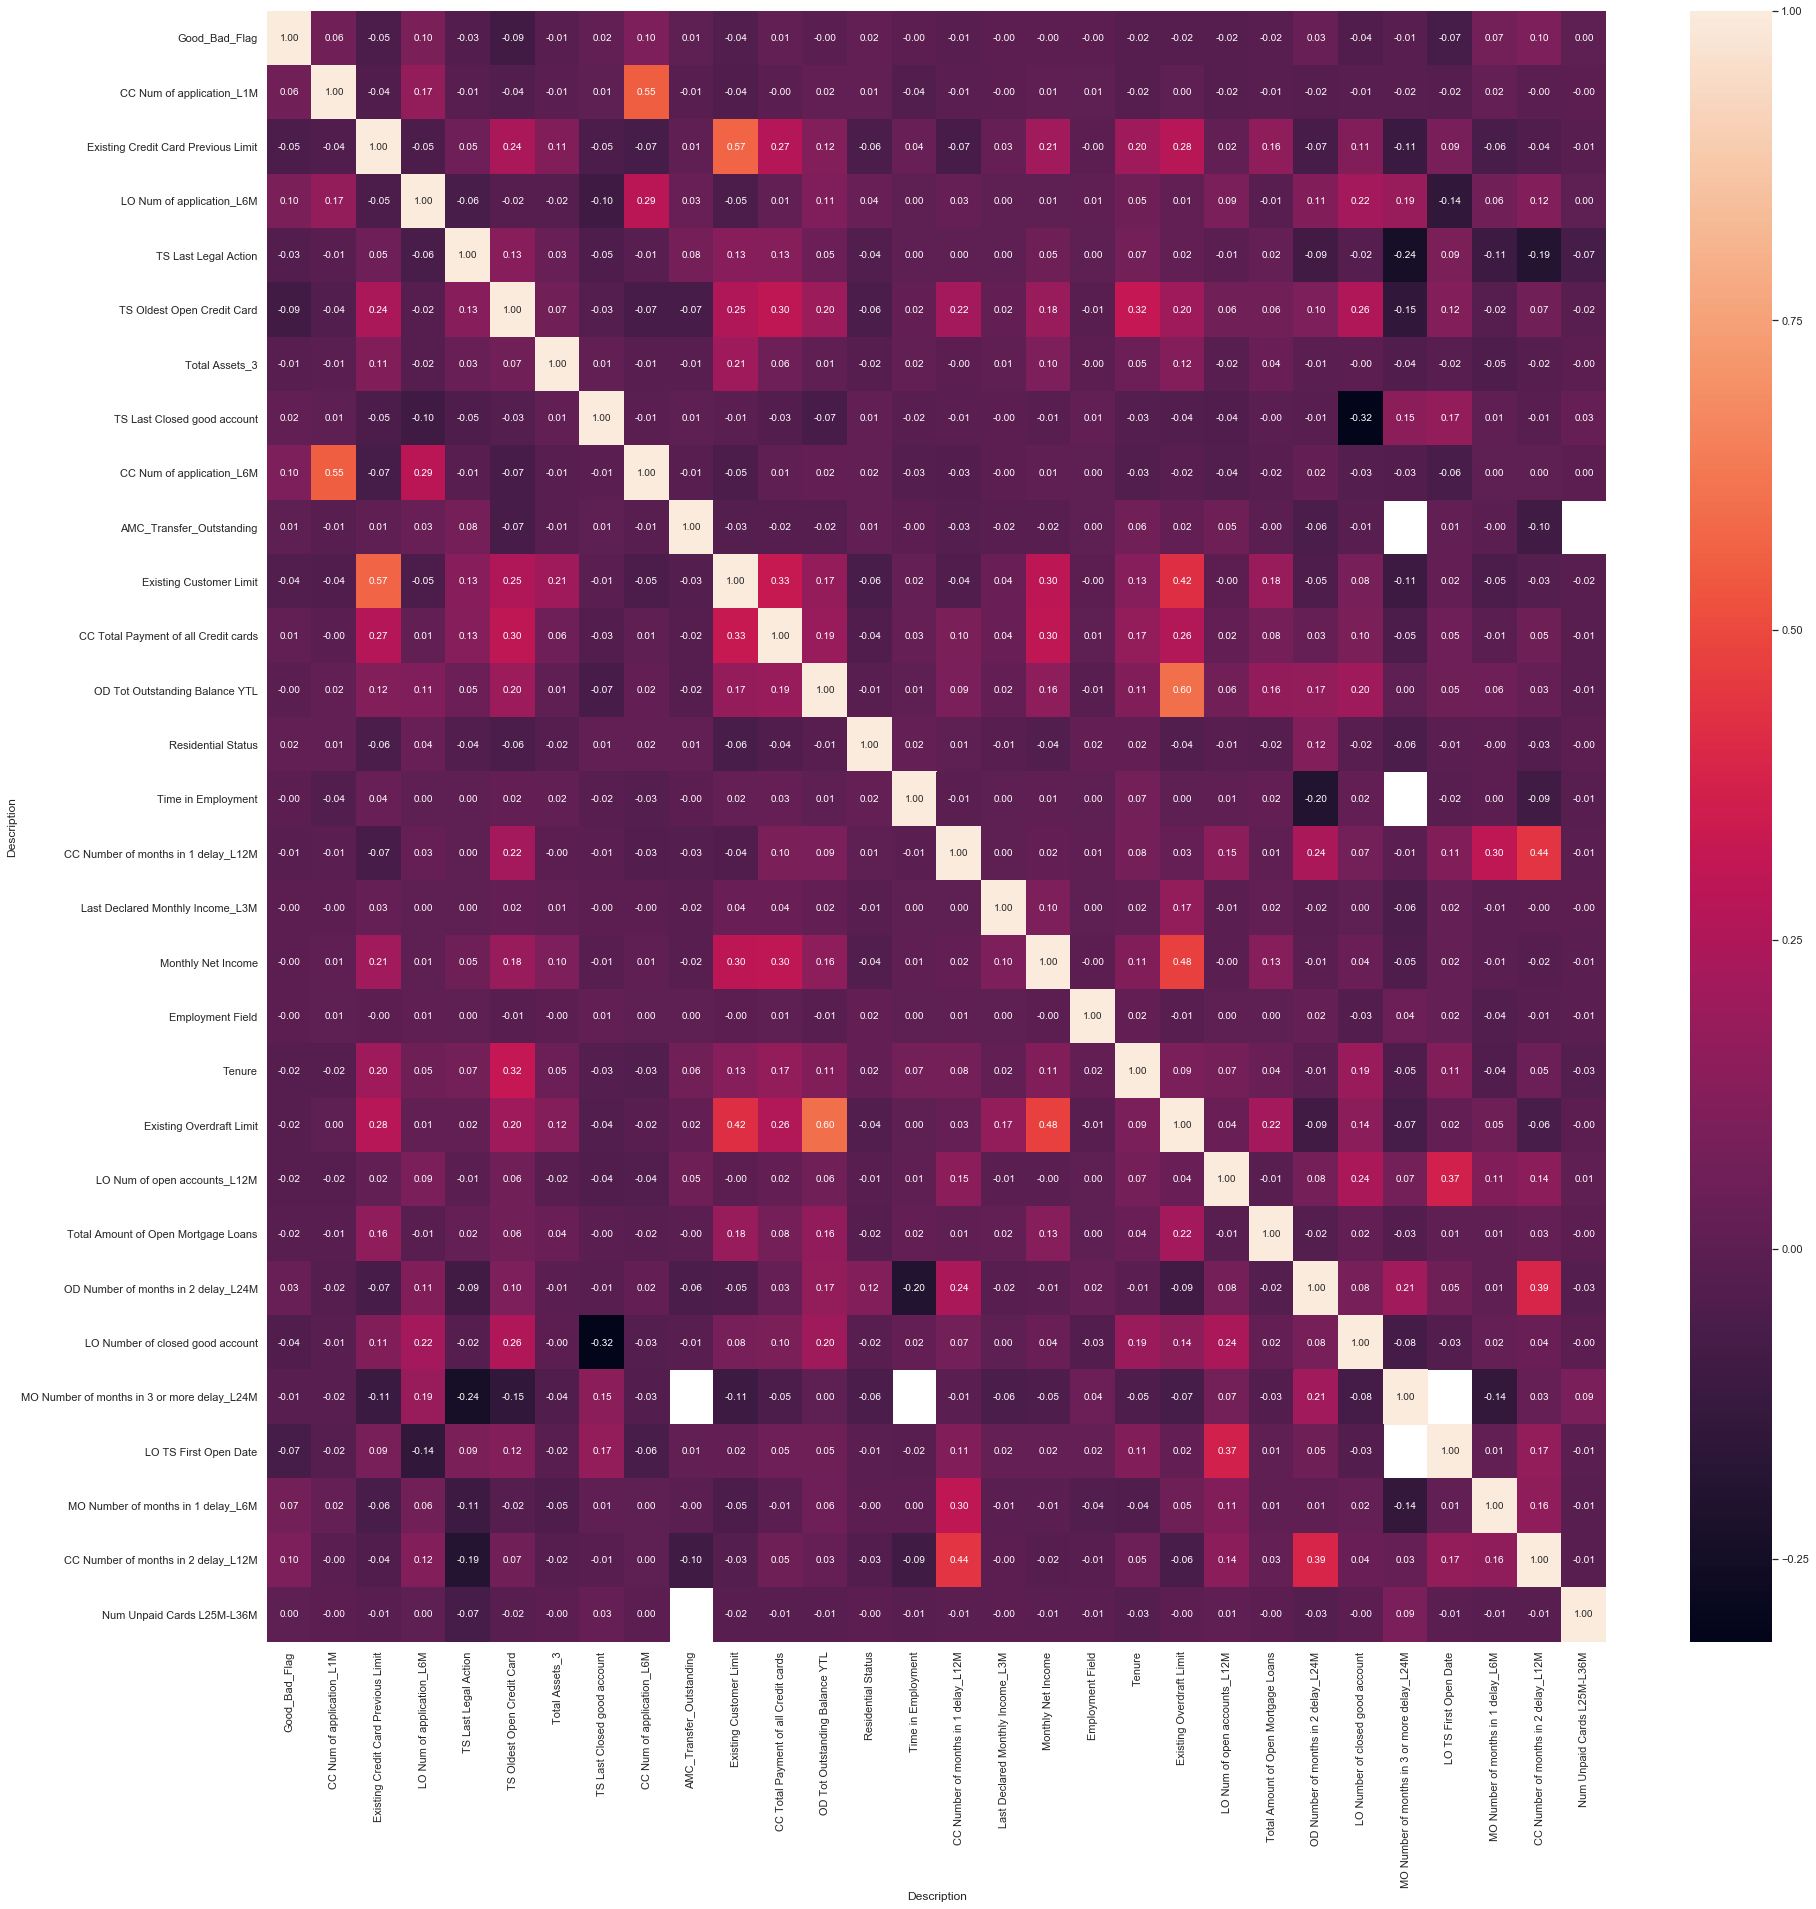

In [22]:
plt.figure(figsize=(30,30)) # CORRELATION HEATMAP
sns.heatmap(df_no_corr.corr(), annot=True, fmt=".2f")

plt.show()

Drop Any Legal Action no date YN column, because it has conflict with var 6 <br>
This is called Domain Knowledge Elimination

In [23]:
df = df.drop(['Any Legal Action no date YN'], axis=1)
df.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description Worst Account Status All Credits Any Legal Action YN  \
0                                          L                   Y   
1                                          1                   N   
2                                          0                   N   
3                                          L                   Y   
4                                          1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  MO Number of months in 3 or more delay_L6M E Mail Given YN  \
0                                                   nan               Y   
1                                                   nan               Y   
2                                                   nan               Y   
3                                                   nan               N   
4                                                   nan               Y   

Description OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                              N                                  nan   
1                              N                                  nan   
2                              N                                  nan   
3                              N                                  nan   
4                              N                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             N   
1                                     0             N   
2                                     0             N   
3                                     0             N   
4                                     0             N   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           N                             Y  
1                                           N                             Y  
2

In [24]:
df_no_corr = df_no_corr.drop(['Any Legal Action no date YN'], axis=1)
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description Worst Account Status All Credits Any Legal Action YN  \
0                                          L                   Y   
1                                          1                   N   
2                                          0                   N   
3                                          L                   Y   
4                                          1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date MO Number of months in 1 delay_L6M  \
0                            5.000                                nan   
1                           15.000                                nan   
2                              nan                                nan   
3                              nan                                nan   
4                              nan                              0.000   

Description E Mail Given YN  OD_Pending Credit_YN  \
0                         Y                     N   
1                         Y                     N   
2                         Y                     N   
3                         N                     N   
4                         Y                     N   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                       N                                 N   
1                       N                                 N   
2                       N                                 N   
3                       N                                 N   
4                       N                                 N   

Description  CC Existing Customers in L6M  
0               

In [25]:
#CHECK CONSTANT COLUMNS
constant = df.columns[~(df != df.iloc[0]).any()].tolist() 
print('constant features:', ', '.join(constant))

constant features: 


In [26]:
# DEFINE TARGET (OUTPUT) COLUMNS
tar_columns=['Good_Bad_Flag'] 
target = df[tar_columns]

## Identifying columns as categorical or not
categorial_features = ['Worst Account Status All Credits',
                       'Any Legal Action YN',
                       'Last Credit Decision',
                       'Home Phone YN',
                       'Employers Address YN',
                       'Residential Status',
                       'Employment Field',
                       'PO Credit Exisits_YN',
                       'CC Worst Payment Status_L24M',
                       'CB Unpaid Notes_Cheques YN',
                       'Worst Status of All Loans_L3Y',
                       'E Mail Given YN',
                       'OD_Pending Credit_YN',
                       'Guarantee YN',
                       'Overridden_From_Final_Decline_YN',
                       'CC Existing Customers in L6M']

yes_no =  ['Any Legal Action YN',
           'Home Phone YN',
           'Employers Address YN',
           'PO Credit Exisits_YN',
           'CB Unpaid Notes_Cheques YN',
           'E Mail Given YN',
           'OD_Pending Credit_YN',
           'Guarantee YN',
           'Overridden_From_Final_Decline_YN',
           'CC Existing Customers in L6M']

one_hot = ['Last Credit Decision',
           'Residential Status',
           'Employment Field']

label =   ['Worst Account Status All Credits',
           'CC Worst Payment Status_L24M']


In [27]:
# Python code t get difference of two lists 
# Using set() 
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

In [28]:
numeric_columns = list(set(df.columns) - set(categorial_features))
numeric_columns

['MO Number of months in 3 or more delay_L24M',
 'CC Num of application_L1M',
 'TS Last Legal Action',
 'Monthly Family Income',
 'Monthly Net Income',
 'OD Tot Outstanding Balance YTL',
 'Existing Overdraft Limit',
 'CC Number of months in 2 delay_L12M',
 'Existing Credit Card Previous Limit',
 'Total Assets_1',
 'CC Total Payment of all Credit cards',
 'MO Number of months in 3 or more delay_L6M',
 'Existing Customer Limit',
 'AMC_Transfer_Outstanding',
 'TS Last Closed good account',
 'Verified Own Income Amount',
 'LO Number of closed good account',
 'TS Oldest Open Credit Card',
 'OD Number of months in 2 delay_L24M',
 'CC Number of months in 1 delay_L12M',
 'MO Number of months in 1 delay_L6M',
 'Declared Monthly Net Income',
 'Good_Bad_Flag',
 'LO Num of open accounts_L12M',
 'CC Num of application_L6M',
 'Num Unpaid Cards L25M-L36M',
 'Tenure',
 'LO TS First Open Date',
 'CC TS First Open Active Credit Card',
 'LO Num of application_L6M',
 'Total Assets_3',
 'Last Declared Mont

In [29]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34584 entries, 0 to 34583
Data columns (total 1 columns):
Good_Bad_Flag    34584 non-null int64
dtypes: int64(1)
memory usage: 270.3 KB


<Figure size 432x288 with 0 Axes>

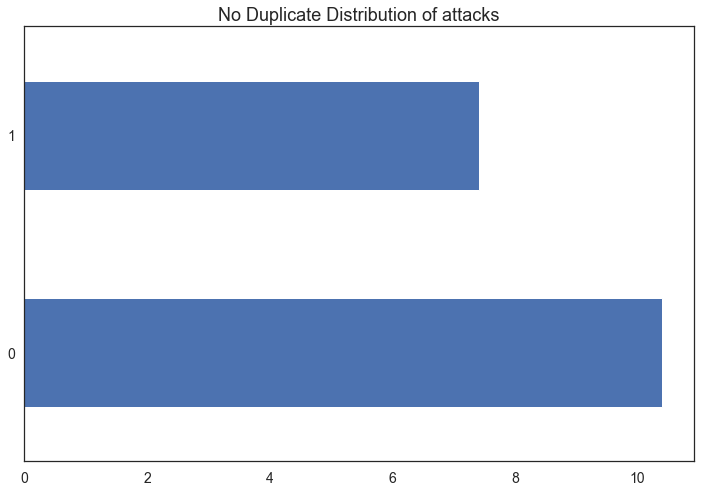

In [158]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
plt.title('No Duplicate Distribution of attacks')
#df.plot(kind='barh')
df['Good_Bad_Flag'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

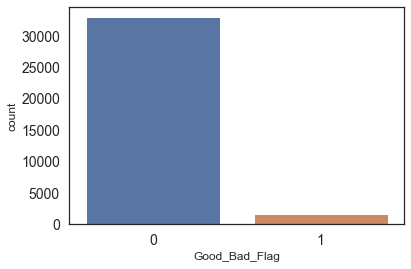

In [159]:
sns.countplot(df['Good_Bad_Flag'])

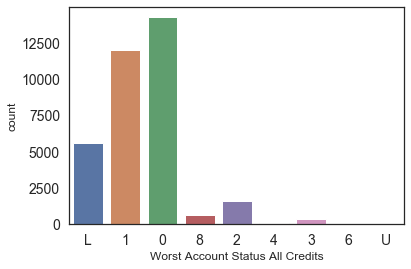

In [160]:
sns.countplot(df[categorial_features[0]])

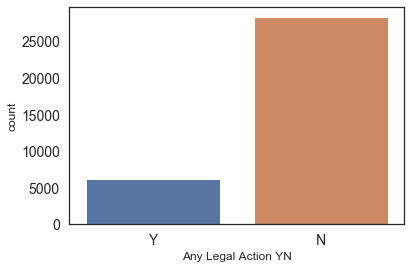

In [161]:
sns.countplot(df[categorial_features[1]])

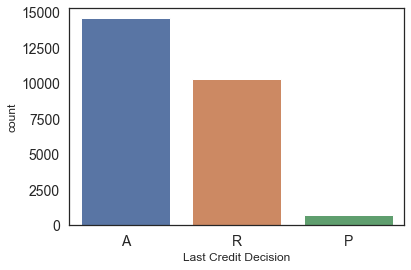

In [162]:
sns.countplot(df[categorial_features[2]])

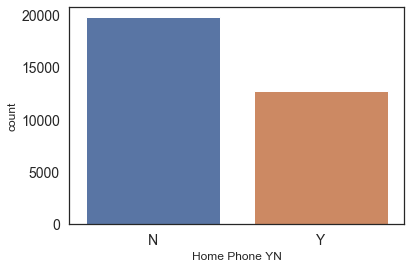

In [163]:
sns.countplot(df[categorial_features[3]])

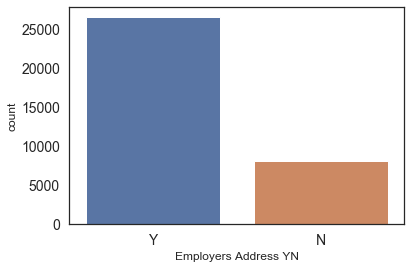

In [164]:
sns.countplot(df[categorial_features[4]])

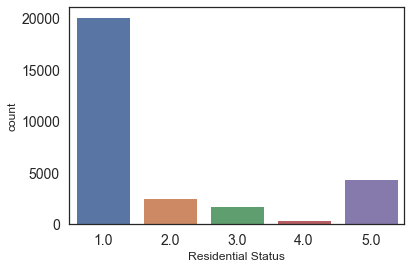

In [165]:
sns.countplot(df[categorial_features[5]])

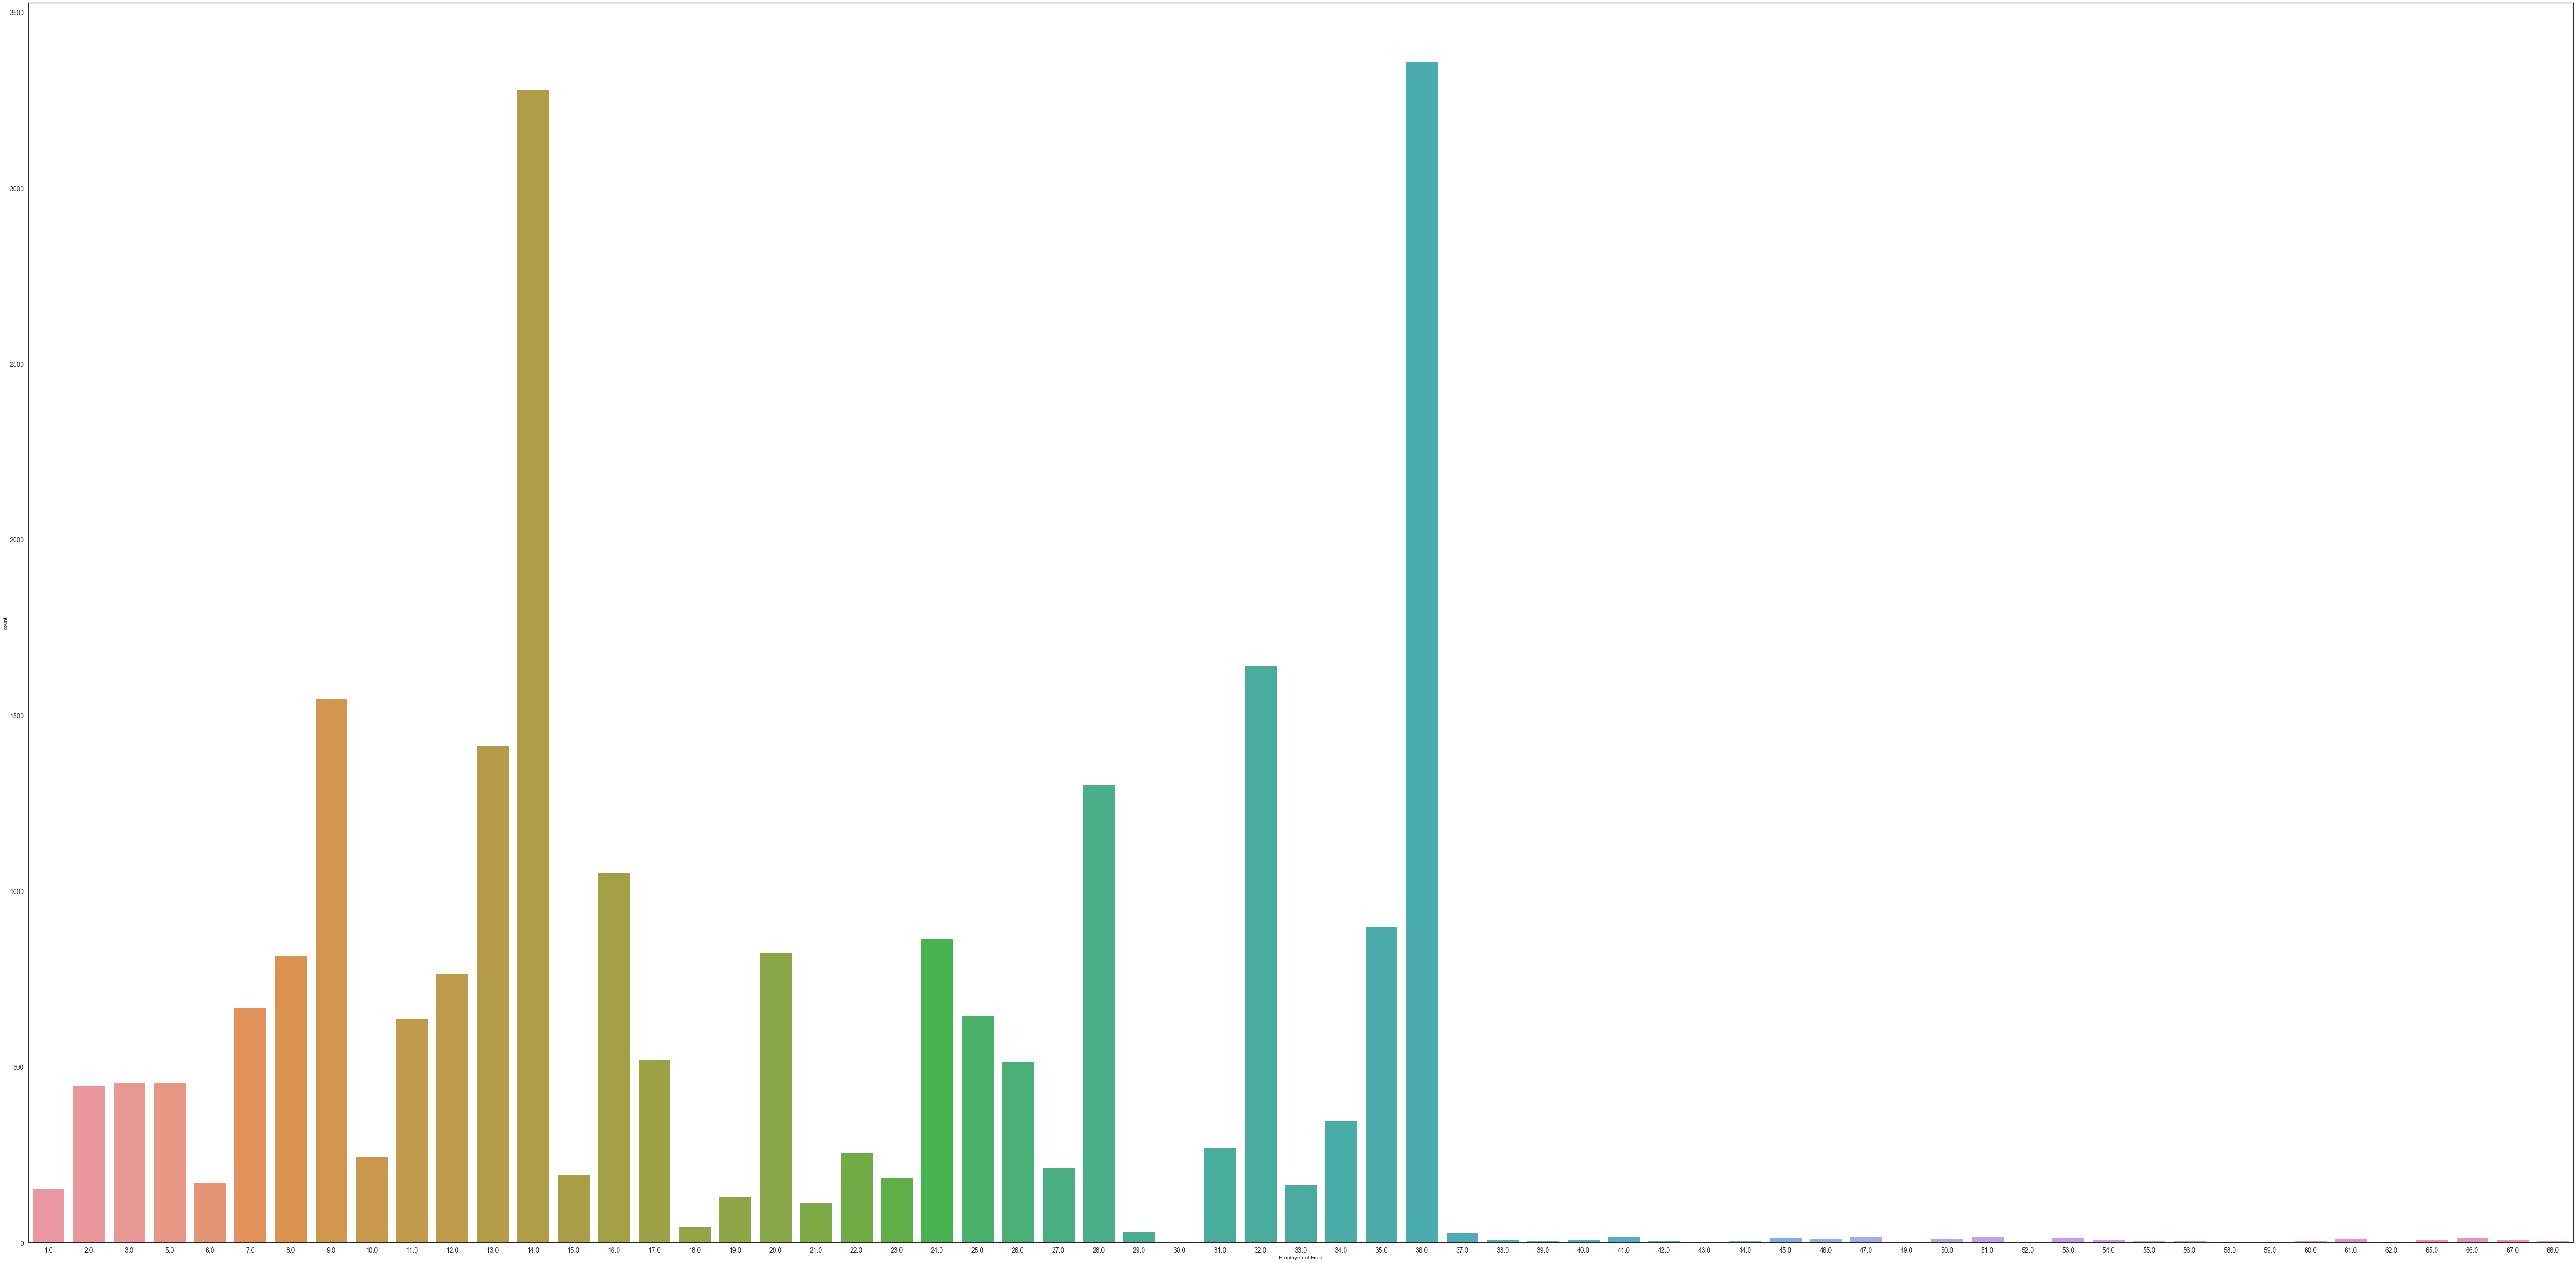

In [166]:
plt.figure(figsize=(100, 50))
sns.countplot(df[categorial_features[6]],)

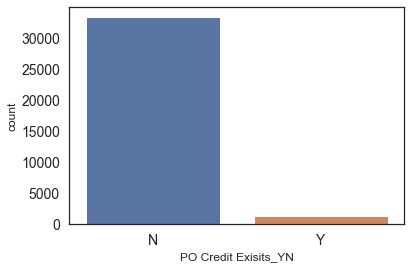

In [167]:
sns.countplot(df[categorial_features[7]])

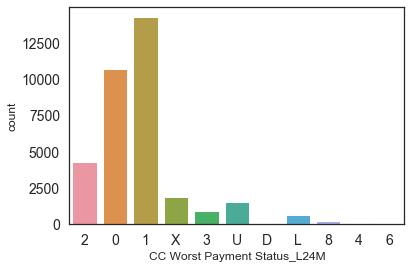

In [168]:
sns.countplot(df[categorial_features[8]])

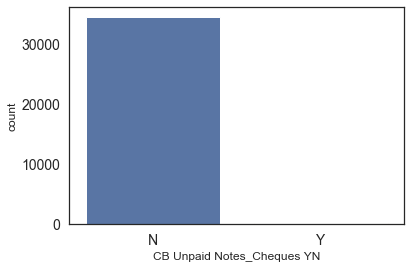

In [169]:
sns.countplot(df[categorial_features[9]])

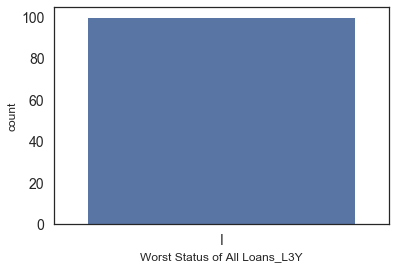

In [170]:
sns.countplot(df[categorial_features[10]])

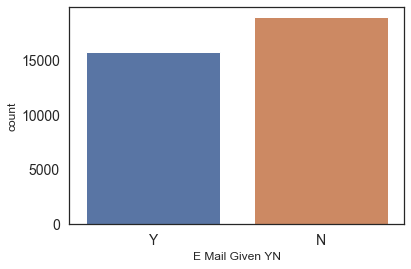

In [171]:
sns.countplot(df[categorial_features[11]])

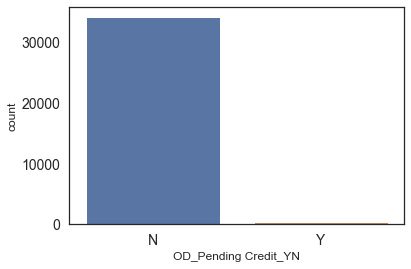

In [172]:
sns.countplot(df[categorial_features[12]])

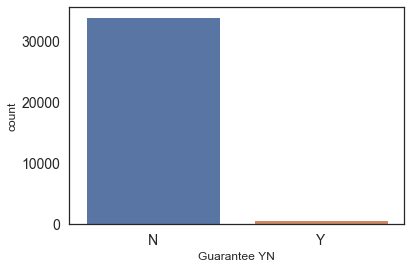

In [173]:
sns.countplot(df[categorial_features[13]])

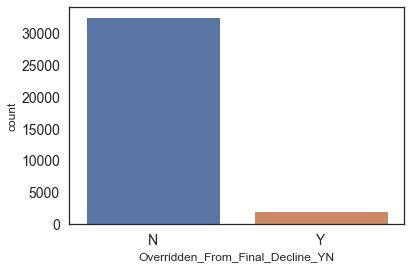

In [174]:
sns.countplot(df[categorial_features[14]])

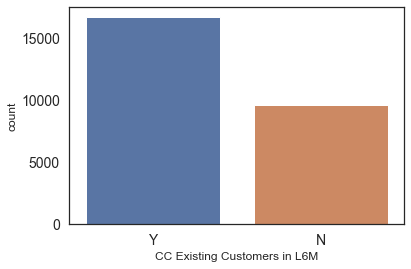

In [175]:
sns.countplot(df[categorial_features[15]])

<Figure size 432x288 with 0 Axes>

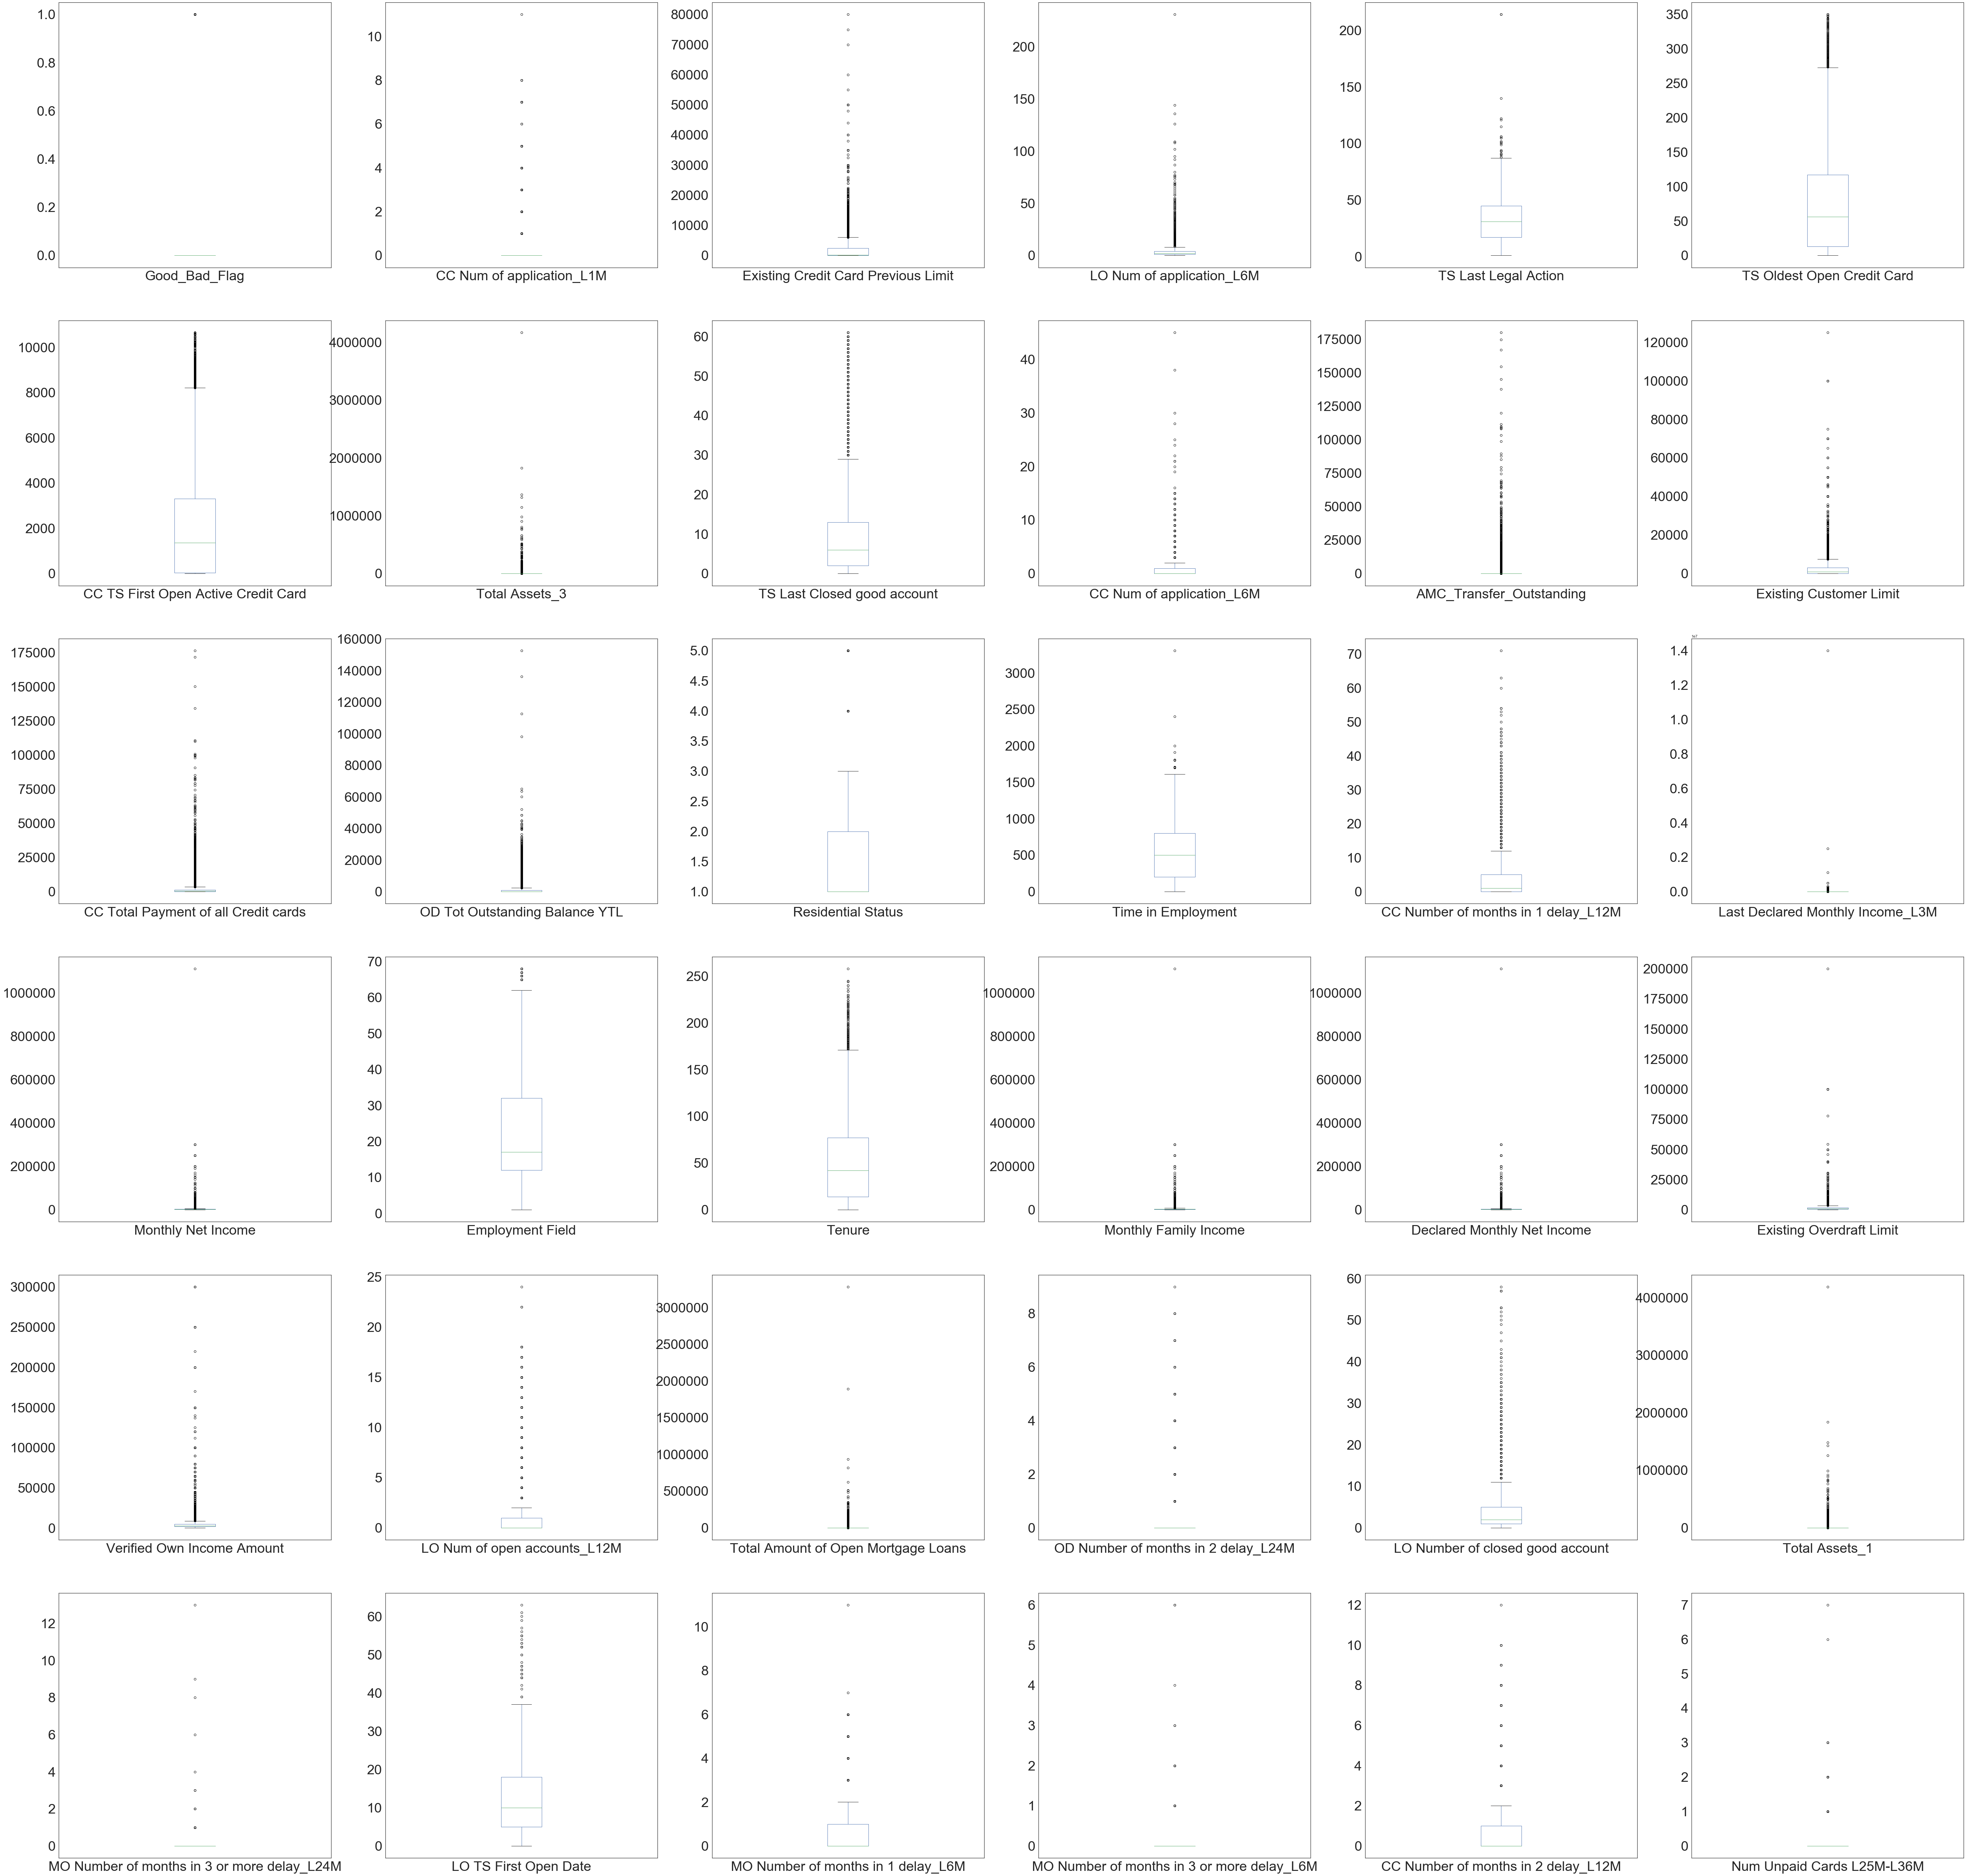

<Figure size 432x288 with 0 Axes>

In [144]:
fig = df.plot(kind='box', subplots=True, figsize=(100,100), layout=(6,6), sharex=False, 
        fontsize=40, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

<Figure size 432x288 with 0 Axes>

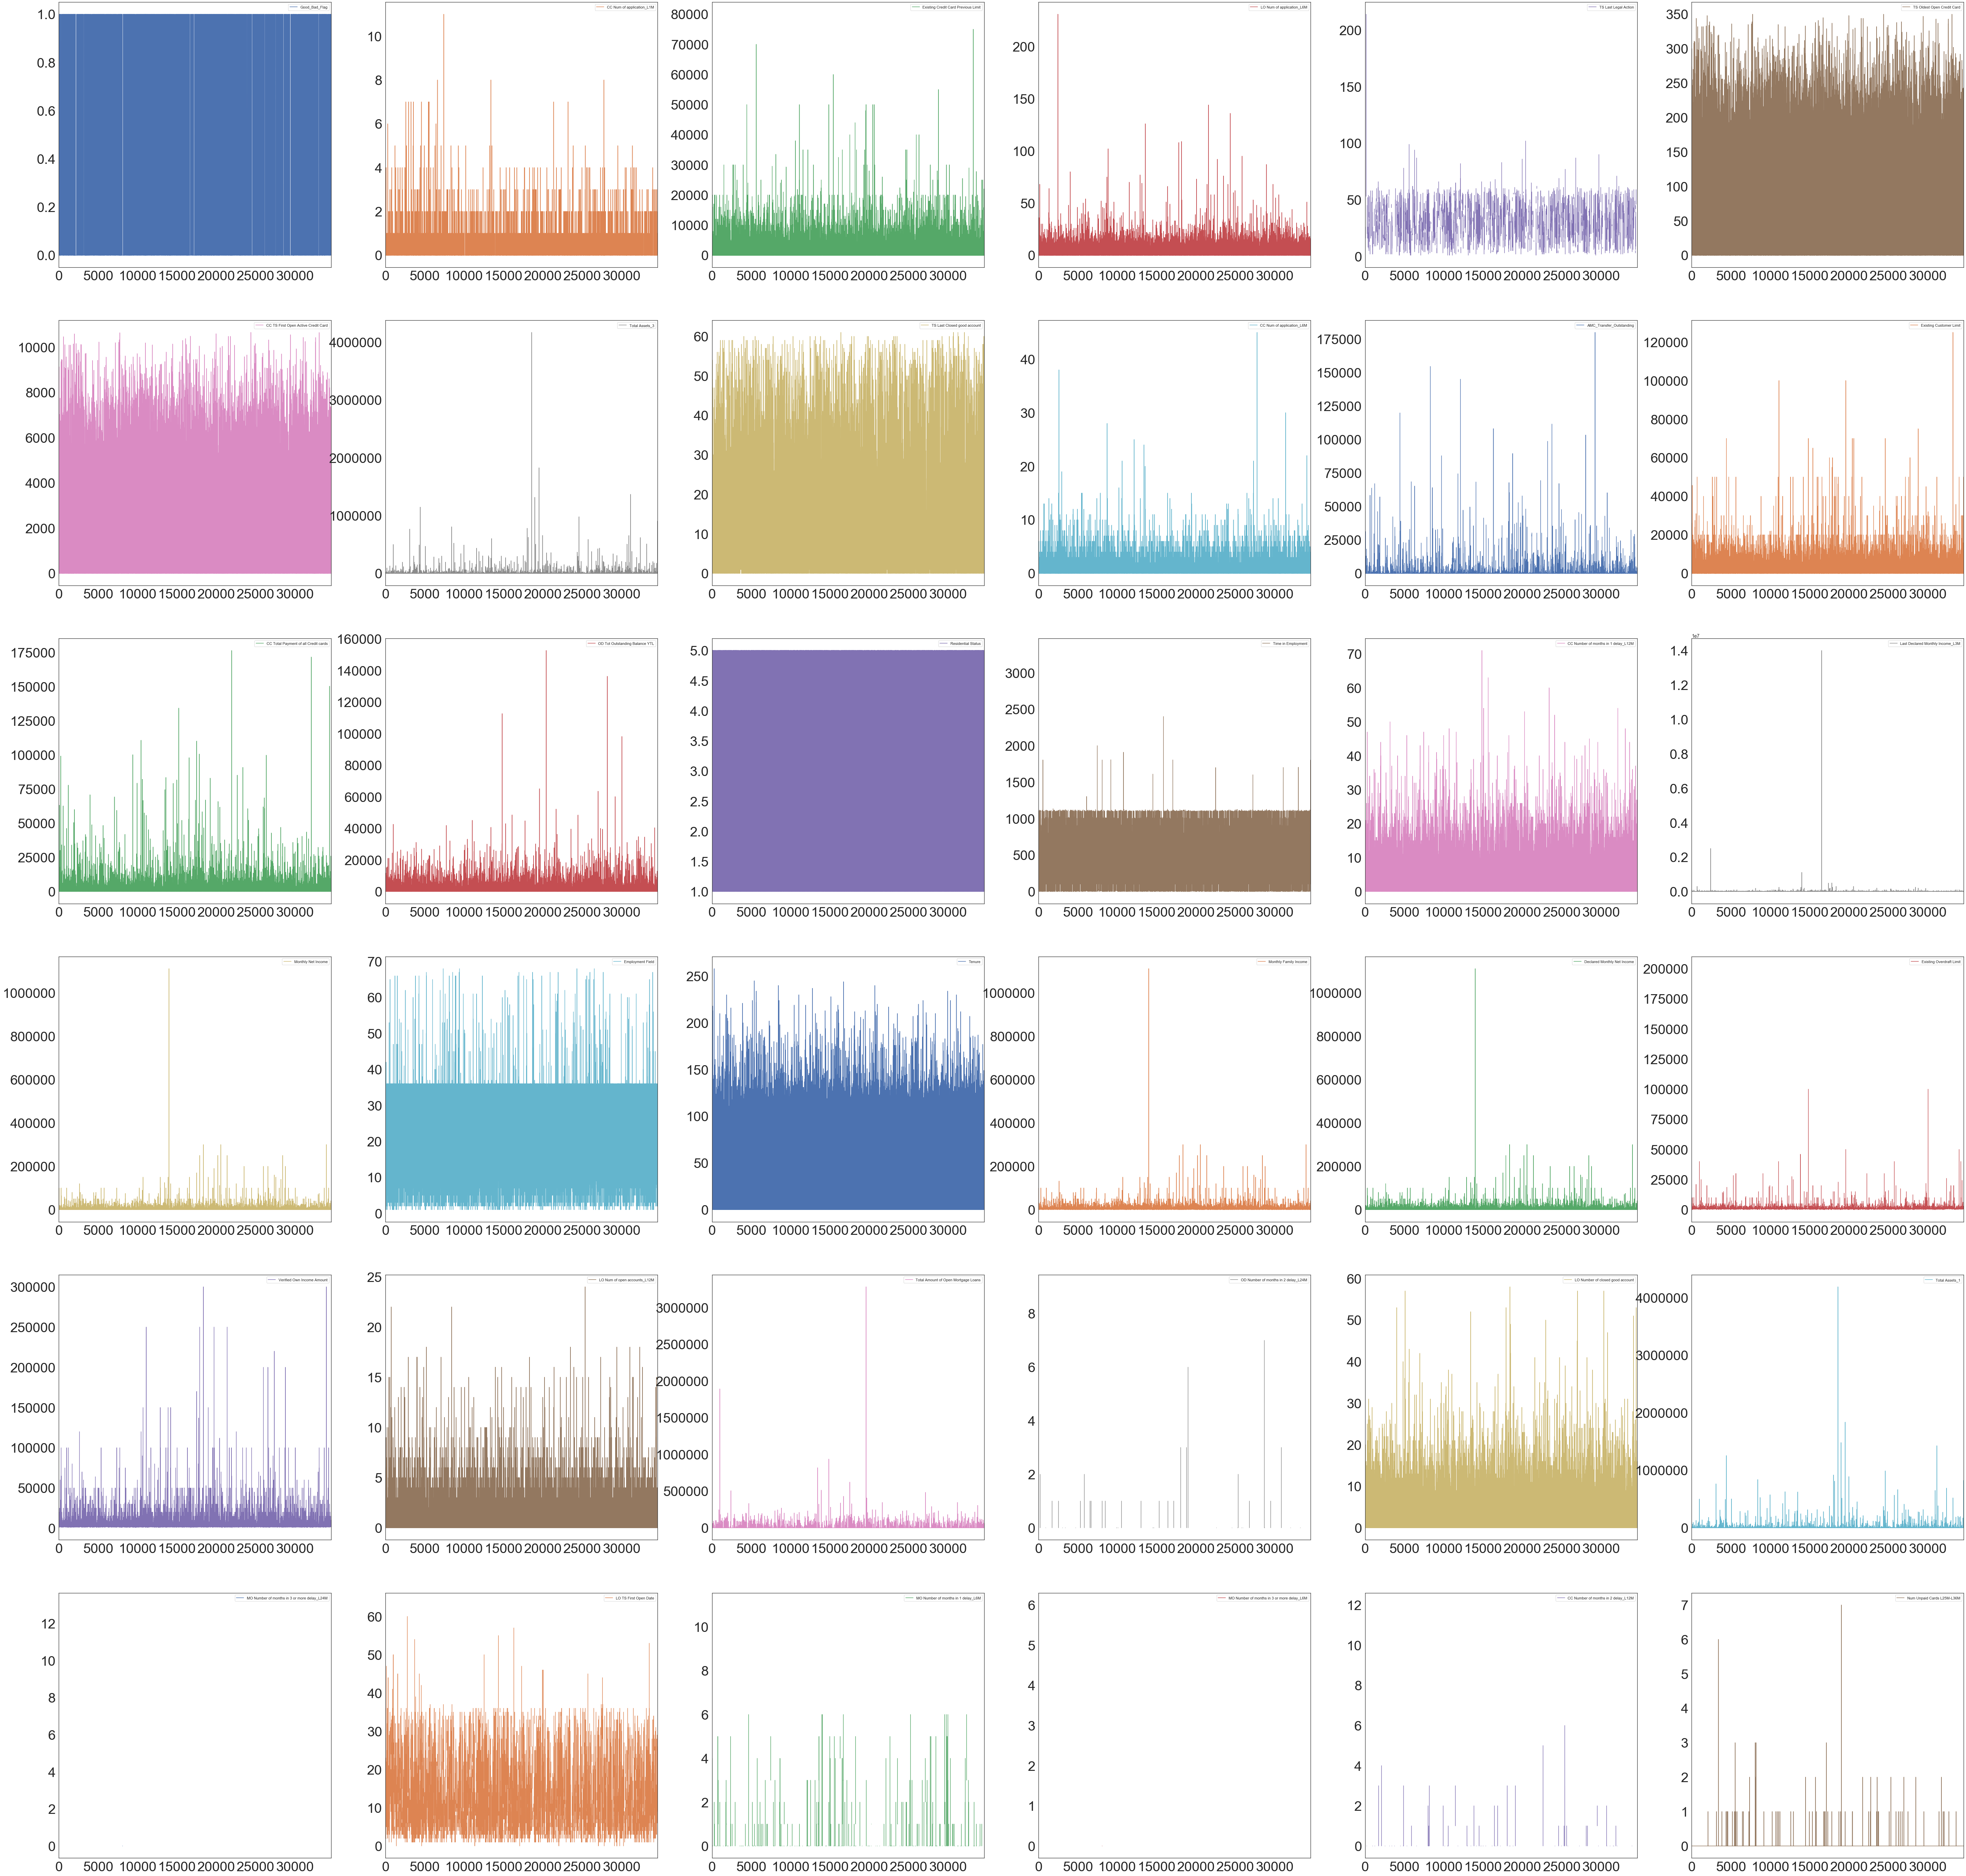

<Figure size 432x288 with 0 Axes>

In [176]:
find = df.plot(kind='line', subplots=True, figsize=(100,100), layout=(6,6), sharex=False, fontsize=40, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

In [153]:
len(categorial_features)

16

<Figure size 432x288 with 0 Axes>

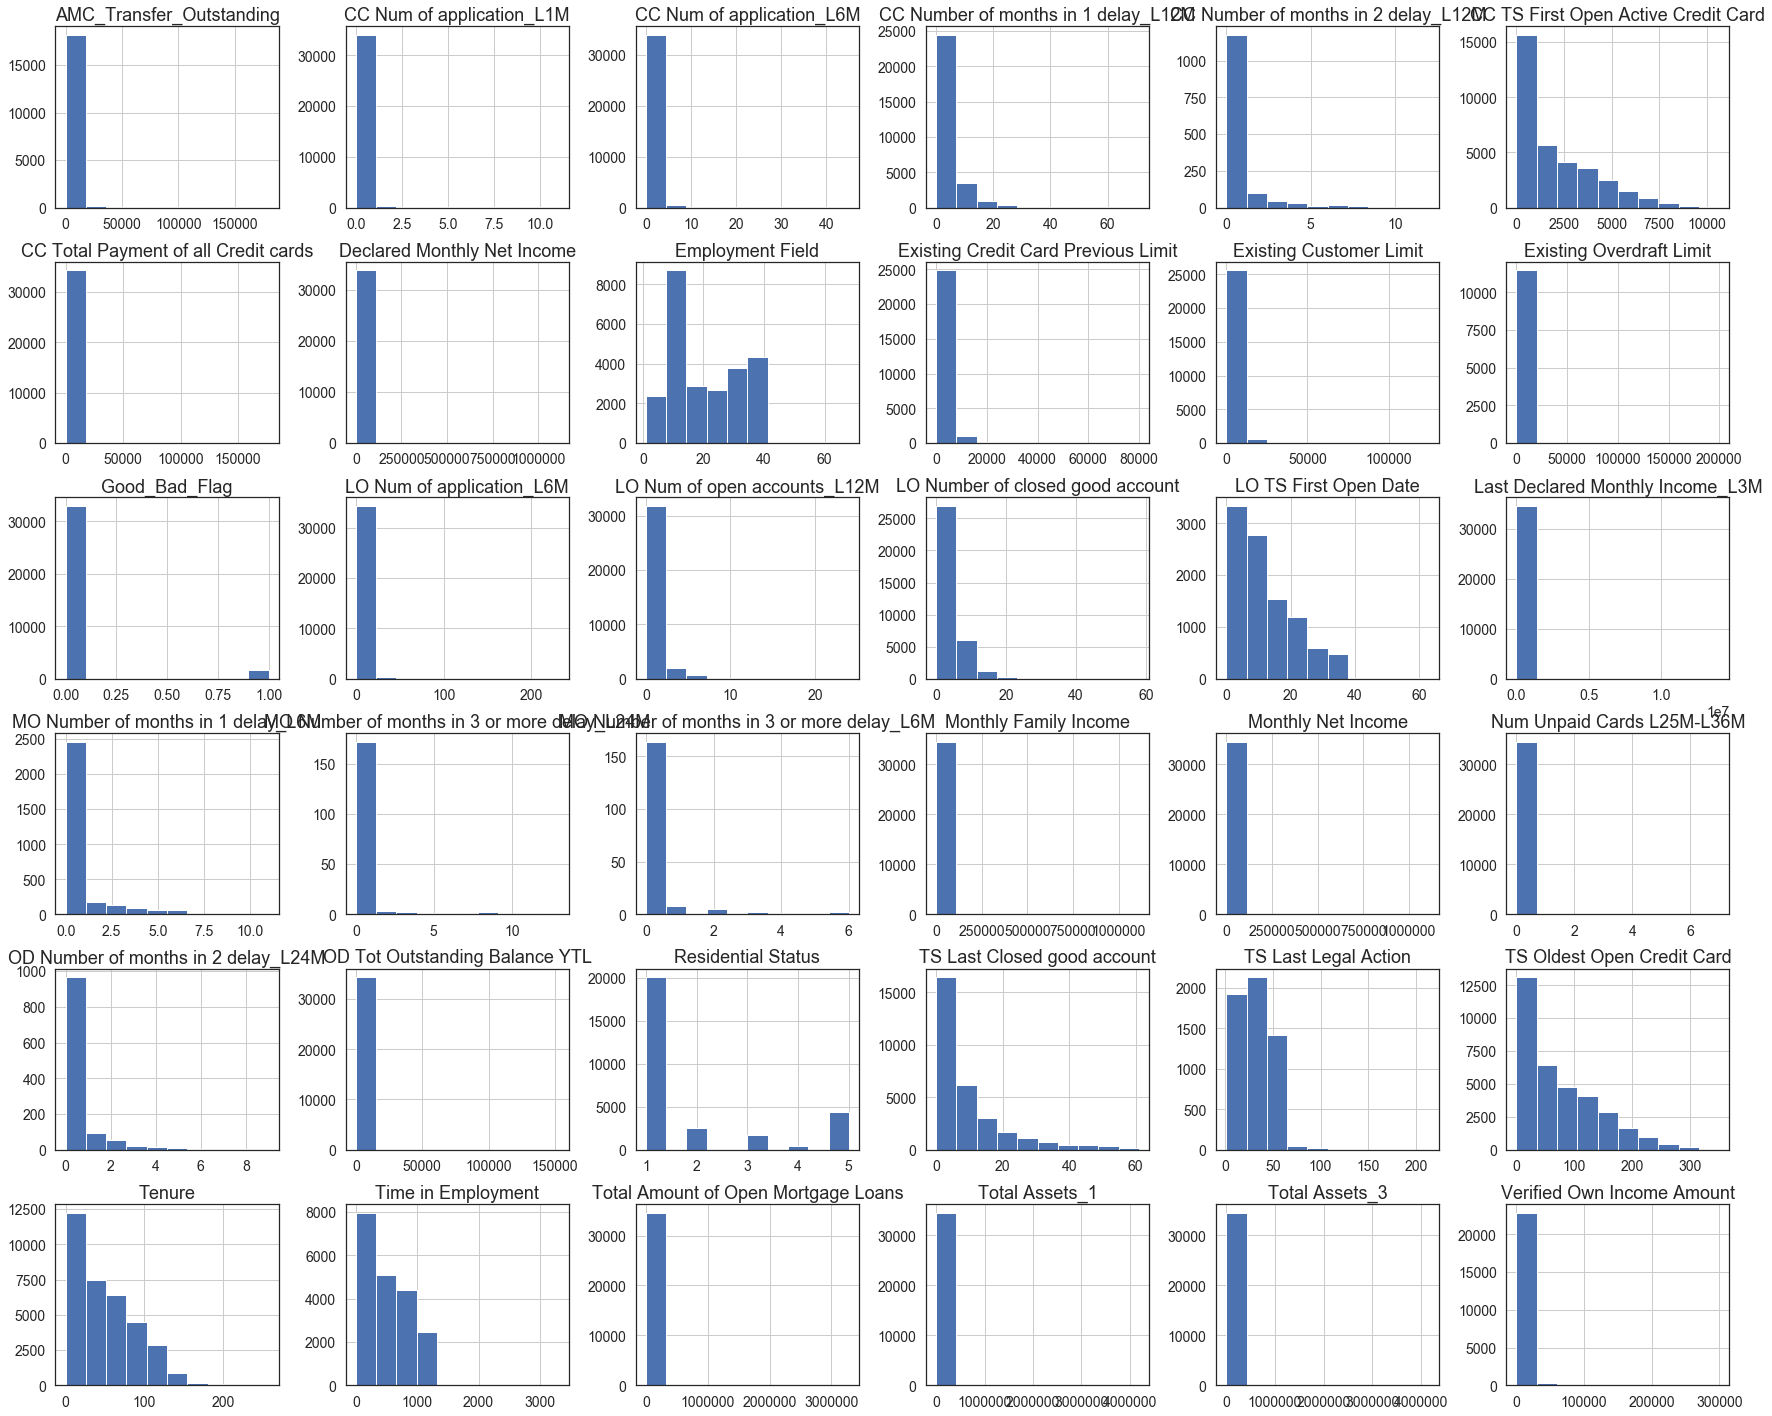

<Figure size 432x288 with 0 Axes>

In [48]:
# HISTOGRAMS OF FEATURES
df.hist(figsize=(30,25))
plt.figure()

In [30]:
df_backup = df[df.columns]
df_backup.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description Worst Account Status All Credits Any Legal Action YN  \
0                                          L                   Y   
1                                          1                   N   
2                                          0                   N   
3                                          L                   Y   
4                                          1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  MO Number of months in 3 or more delay_L6M E Mail Given YN  \
0                                                   nan               Y   
1                                                   nan               Y   
2                                                   nan               Y   
3                                                   nan               N   
4                                                   nan               Y   

Description OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                              N                                  nan   
1                              N                                  nan   
2                              N                                  nan   
3                              N                                  nan   
4                              N                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             N   
1                                     0             N   
2                                     0             N   
3                                     0             N   
4                                     0             N   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           N                             Y  
1                                           N                             Y  
2

In [132]:
df = df_backup[df_backup.columns]
df.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description Worst Account Status All Credits Any Legal Action YN  \
0                                          L                   Y   
1                                          1                   N   
2                                          0                   N   
3                                          L                   Y   
4                                          1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  MO Number of months in 3 or more delay_L6M E Mail Given YN  \
0                                                   nan               Y   
1                                                   nan               Y   
2                                                   nan               Y   
3                                                   nan               N   
4                                                   nan               Y   

Description OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                              N                                  nan   
1                              N                                  nan   
2                              N                                  nan   
3                              N                                  nan   
4                              N                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             N   
1                                     0             N   
2                                     0             N   
3                                     0             N   
4                                     0             N   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           N                             Y  
1                                           N                             Y  
2

In [133]:
# DEFINE TARGET (OUTPUT) COLUMNS
tar_columns=['Good_Bad_Flag'] 
target = df[tar_columns]

## Identifying columns as categorical or not
categorial_features = ['Worst Account Status All Credits',
                       'Any Legal Action YN',
                       'Last Credit Decision',
                       'Home Phone YN',
                       'Employers Address YN',
                       'Residential Status',
                       'Employment Field',
                       'PO Credit Exisits_YN',
                       'CC Worst Payment Status_L24M',
                       'CB Unpaid Notes_Cheques YN',
                       'Worst Status of All Loans_L3Y',
                       'E Mail Given YN',
                       'OD_Pending Credit_YN',
                       'Guarantee YN',
                       'Overridden_From_Final_Decline_YN',
                       'CC Existing Customers in L6M']

yes_no =  ['Any Legal Action YN',
           'Home Phone YN',
           'Employers Address YN',
           'PO Credit Exisits_YN',
           'CB Unpaid Notes_Cheques YN',
           'E Mail Given YN',
           'OD_Pending Credit_YN',
           'Guarantee YN',
           'Overridden_From_Final_Decline_YN',
           'CC Existing Customers in L6M']

one_hot = ['Last Credit Decision',
           'Residential Status',
           'Employment Field']

label =   ['Worst Account Status All Credits',
           'CC Worst Payment Status_L24M']

In [134]:
# Python code t get difference of two lists 
# Using set() 
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

In [135]:
numeric_columns = list(set(df.columns) - set(categorial_features))
numeric_columns

['MO Number of months in 3 or more delay_L24M',
 'CC Num of application_L1M',
 'TS Last Legal Action',
 'Monthly Family Income',
 'Monthly Net Income',
 'OD Tot Outstanding Balance YTL',
 'Existing Overdraft Limit',
 'CC Number of months in 2 delay_L12M',
 'Existing Credit Card Previous Limit',
 'Total Assets_1',
 'CC Total Payment of all Credit cards',
 'MO Number of months in 3 or more delay_L6M',
 'Existing Customer Limit',
 'AMC_Transfer_Outstanding',
 'TS Last Closed good account',
 'Verified Own Income Amount',
 'LO Number of closed good account',
 'TS Oldest Open Credit Card',
 'OD Number of months in 2 delay_L24M',
 'CC Number of months in 1 delay_L12M',
 'MO Number of months in 1 delay_L6M',
 'Declared Monthly Net Income',
 'Good_Bad_Flag',
 'LO Num of open accounts_L12M',
 'CC Num of application_L6M',
 'Num Unpaid Cards L25M-L36M',
 'Tenure',
 'LO TS First Open Date',
 'CC TS First Open Active Credit Card',
 'LO Num of application_L6M',
 'Total Assets_3',
 'Last Declared Mont

In [136]:
## LABEL ENCODE OF THESE CATEGORICAL COLUMNS
def label_encode(label):
    if label == 'D':
        return 9
    if label == 'X':
        return 10
    if label == 'L':
        return 11
    if label == 'U':
        return -1
    else:
        return label
for index, value in enumerate(label):
    df[value] = df[value].apply(label_encode)
df.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits Any Legal Action YN  \
0                                          11                   Y   
1                                           1                   N   
2                                           0                   N   
3                                          11                   Y   
4                                           1                   N   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  MO Number of months in 3 or more delay_L6M E Mail Given YN  \
0                                                   nan               Y   
1                                                   nan               Y   
2                                                   nan               Y   
3                                                   nan               N   
4                                                   nan               Y   

Description OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                              N                                  nan   
1                              N                                  nan   
2                              N                                  nan   
3                              N                                  nan   
4                              N                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             N   
1                                     0             N   
2                                     0             N   
3                                     0             N   
4                                     0             N   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           N                             Y  
1                                           N                            

In [137]:
## ENCODE YES/NO COLUMNS
def labels_yn(label):
    if label == 'Y':
        return 1
    if label == 'N':
        return 0
    else:
        return -1
    
for index, value in enumerate(yes_no):
    df[value] = df[value].apply(labels_yn)
df.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                    1   
1                                           1                    0   
2                                           0                    0   
3                                          11                    1   
4                                           1                    0   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description  CC TS First Open Active Credit Card Last Credit Decision  ...  \
0                                           2606                    A  ...   
1                                            406                    R  ...   
2                                           8337                    A  ...   
3                                              8                    A  ...   
4                                           3833                    A  ...   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
0                                                   nan                1   
1                                                   nan                1   
2                                                   nan                1   
3                                                   nan                0   
4                                                   nan                1   

Description  OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                               0                                  nan   
1                               0                                  nan   
2                               0                                  nan   
3                               0                                  nan   
4                               0                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             0   
1                                     0             0   
2                                     0             0   
3                                     0             0   
4                                     0             0   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           0                             1  
1                                           0          

In [138]:
#€ ENCODE VAR_38 COLUMN AS I --> 1, NaN --> 0
def labels_var38(label):
    if label == 'I':
        return 1
    else:
        return 0
df['Worst Status of All Loans_L3Y'] = df['Worst Status of All Loans_L3Y'].apply(labels_var38)
df['Worst Status of All Loans_L3Y']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
34554    0
34555    0
34556    0
34557    0
34558    0
34559    0
34560    0
34561    0
34562    0
34563    0
34564    0
34565    0
34566    0
34567    0
34568    0
34569    0
34570    0
34571    0
34572    0
34573    0
34574    0
34575    0
34576    0
34577    0
34578    0
34579    0
34580    0
34581    0
34582    0
34583    0
Name: Worst Status of All Loans_L3Y, Length: 34584, dtype: int64

In [139]:
## FILL THIS COLUMNS'S EMPTY VALUES --> 0
df['AMC_Transfer_Outstanding'] = df['AMC_Transfer_Outstanding'].fillna(0)
df['AMC_Transfer_Outstanding']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
5           0.000
6           0.000
7           0.000
8           0.000
9           0.000
10          0.000
11          0.000
12          0.000
13      65482.000
14          0.000
15          0.000
16          0.000
17          0.000
18          0.000
19          0.000
20          0.000
21          0.000
22          0.000
23          0.000
24          0.000
25          0.000
26          0.000
27          0.000
28          0.000
29          0.000
           ...   
34554       0.000
34555       0.000
34556       0.000
34557       0.000
34558       0.000
34559       0.000
34560       0.000
34561       0.000
34562       0.000
34563       0.000
34564       0.000
34565       0.000
34566       0.000
34567       0.000
34568     179.000
34569       0.000
34570       0.000
34571       0.000
34572       0.000
34573       0.000
34574       0.000
34575       0.000
34576       0.000
34577       0.000
34578     

In [140]:
(df.isna().sum()*100)/df.shape[0] #CHECK NaN COLUMNS

Description
Good_Bad_Flag                                  0.000
CC Num of application_L1M                      0.000
Worst Account Status All Credits               0.000
Any Legal Action YN                            0.000
Existing Credit Card Previous Limit           24.494
LO Num of application_L6M                      0.000
TS Last Legal Action                          83.952
TS Oldest Open Credit Card                     0.000
CC TS First Open Active Credit Card            0.000
Last Credit Decision                          26.162
Total Assets_3                                 0.043
TS Last Closed good account                   11.659
CC Num of application_L6M                      0.000
Home Phone YN                                  0.000
Employers Address YN                           0.000
AMC_Transfer_Outstanding                       0.000
Existing Customer Limit                       23.786
CC Total Payment of all Credit cards           0.000
OD Tot Outstanding Balance YTL    

AFTER THIS STEP OUR DATASET IS READY.  <br>
BUT APPLY THESE PROPERTIES TO DF_NO_CORR

In [1389]:
X = df.drop('Good_Bad_Flag', axis=1)

In [1390]:
y = target

In [1391]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
0                                    0                                11   
1                                    0                                 1   
2                                    0                                 0   
3                                    0                                11   
4                                    0                                 1   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
0                              1                             1750.000   
1                              0                             1300.000   
2                              0                                0.000   
3                              1                              800.000   
4                              0                             6250.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
0                                    1                36.000   
1                                   12                   nan   
2                                    0                   nan   
3                                    3                37.000   
4                                    0                   nan   

Description  TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                                    86                                 2606   
1                                    13                                  406   
2                                   274                                 8337   
3                                     6                                    8   
4                                   126                                 3833   

Description Last Credit Decision  Total Assets_3  ...  LO TS First Open Date  \
0                              A         888.000  ...                  5.000   
1                              R          20.000  ...                 15.000   
2                              A         511.000  ...                    nan   
3                              A           0.000  ...                    nan   
4                              A          32.000  ...                    nan   

Description  MO Number of months in 1 delay_L6M  \
0                                           nan   
1                                           nan   
2                                           nan   
3                                           nan   
4                                         0.000   

Description  MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
0                                                   nan                1   
1                                                   nan                1   
2                                                   nan                1   
3                                                   nan                0   
4                                                   nan                1   

Description  OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                               0                                  nan   
1                               0                                  nan   
2                               0                                  nan   
3                               0                                  nan   
4                               0                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             0   
1                                     0             0   
2                                     0             0   
3                                     0             0   
4                                     0             0   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           0                             1  
1                                           0    

In [1392]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                   -1   
1                                           1                   -1   
2                                           0                   -1   
3                                          11                   -1   
4                                           1                   -1   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4                      -1                                -1   

Description  CC Existing Customers i

In [1393]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  Last Credit Decision__R  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   Residential Status__1.0  Residential Status__2.0  Residential Status__3.0  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   

   Residential Status__4.0  Residential Status__5.0  Employment Field__1.0  \
0                        0                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
3                        0                        0                      0   
4                        0                        0                      0   

   Employment Field__2.0  ...  Employment Field__56.0  Employment Field__58.0  \
0                      0  ...                       0                       0   
1                      0  ...                       0                       0   
2                      0  ...                       0                       0   
3                      0  ...                       0                       0   
4                      0  ...                       0                       0   

   Employment Field__59.0  Employment Field__60.0  Employment Field__61.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__62.0  Employment Field__65.0  Employment Field__66.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__67.0  Employment Field__68.0  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 71 columns]

In [1394]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                          0                                11   
1                          0                                 1   
2                          0                                 0   
3                          0                                11   
4                          0                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                             1750.000   
1                    0                             1300.000   
2                    0                                0.000   
3                    1                              800.000   
4                    0                             6250.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                          1                36.000   
1                         12                   nan   
2                          0                   nan   
3                          3                37.000   
4                          0                   nan   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                          86                                 2606   
1                          13                                  406   
2                         274                                 8337   
3                           6                                    8   
4                         126                                 3833   

  Last Credit Decision  Total Assets_3  ...  Employment Field__56.0  \
0                    A         888.000  ...                       0   
1                    R          20.000  ...                       0   
2                    A         511.000  ...                       0   
3                    A           0.000  ...                       0   
4                    A          32.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 120 columns]

In [1395]:
X[numeric_columns]['E']

MO Number of months in 3 or more delay_L24M  CC Num of application_L1M  \
0                                              nan                          0   
1                                              nan                          0   
2                                              nan                          0   
3                                              nan                          0   
4                                              nan                          0   
5                                              nan                          1   
6                                              nan                          0   
7                                              nan                          0   
8                                              nan                          0   
9                                              nan                          0   
10                                             nan                          0   
11                                             nan                          0   
12                                             nan                          0   
13                                             nan                          0   
14                                             nan                          0   
15                                             nan                          0   
16                                             nan                          0   
17                                             nan                          0   
18                                             nan                          0   
19                                             nan                          0   
20                                             nan                          0   
21                                             nan                          0   
22                                             nan                          0   
23                                             nan                          0   
24                                             nan                          0   
25                                             nan                          0   
26                                             nan                          0   
27                                             nan                          0   
28                                             nan                          0   
29                                             nan                          0   
...                                            ...                        ...   
34554                                          nan                          0   
34555                                          nan                          0   
34556                                          nan                          0   
34557                                          nan                          0   
34558                                          nan                          0   
34559                                          nan                          0   
34560                                          nan                          0   
34561                                          nan                          0   
34562                                          nan                          0   
34563                                          nan                          0   
34564                                          nan                          0   
34565                                          nan                          0   
34566                                          nan                          0   
34567                                          nan                          0   
34568                                          nan                          0   
34569                                          nan                          0   
34570                                          nan                          0   
34571                                 

In [1396]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
#numeric_columns.remove('Good_Bad_Flag')

scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
3                    1                                0.010   
4                    0                                0.078   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                   nan   
2                      0.000                   nan   
3                      0.013                 0.169   
4                      0.000                   nan   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                 2606   
1                       0.037                                  406   
2                       0.783                                 8337   
3                       0.017                                    8   
4                       0.360                                 3833   

  Last Credit Decision  Total Assets_3  ...  Employment Field__56.0  \
0                    A           0.000  ...                       0   
1                    R           0.000  ...                       0   
2                    A           0.000  ...                       0   
3                    A           0.000  ...                       0   
4                    A           0.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 120 columns]

In [1397]:
X[numeric_columns]

MO Number of months in 3 or more delay_L24M  CC Num of application_L1M  \
0                                              nan                      0.000   
1                                              nan                      0.000   
2                                              nan                      0.000   
3                                              nan                      0.000   
4                                              nan                      0.000   
5                                              nan                      0.091   
6                                              nan                      0.000   
7                                              nan                      0.000   
8                                              nan                      0.000   
9                                              nan                      0.000   
10                                             nan                      0.000   
11                                             nan                      0.000   
12                                             nan                      0.000   
13                                             nan                      0.000   
14                                             nan                      0.000   
15                                             nan                      0.000   
16                                             nan                      0.000   
17                                             nan                      0.000   
18                                             nan                      0.000   
19                                             nan                      0.000   
20                                             nan                      0.000   
21                                             nan                      0.000   
22                                             nan                      0.000   
23                                             nan                      0.000   
24                                             nan                      0.000   
25                                             nan                      0.000   
26                                             nan                      0.000   
27                                             nan                      0.000   
28                                             nan                      0.000   
29                                             nan                      0.000   
...                                            ...                        ...   
34554                                          nan                      0.000   
34555                                          nan                      0.000   
34556                                          nan                      0.000   
34557                                          nan                      0.000   
34558                                          nan                      0.000   
34559                                          nan                      0.000   
34560                                          nan                      0.000   
34561                                          nan                      0.000   
34562                                          nan                      0.000   
34563                                          nan                      0.000   
34564                                          nan                      0.000   
34565                                          nan                      0.000   
34566                                          nan                      0.000   
34567                                          nan                      0.000   
34568                                          nan                      0.000   
34569                                          nan                      0.000   
34570                                          nan                      0.000   
34571                                 

In [270]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [271]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(34584, 117)

In [272]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
3                    1                                0.010   
4                    0                                0.078   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
3                      0.013                 0.169   
4                      0.000                -1.000   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                0.245   
1                       0.037                                0.038   
2                       0.783                                0.782   
3                       0.017                                0.001   
4                       0.360                                0.360   

   Total Assets_3  TS Last Closed good account  ...  Employment Field__56.0  \
0           0.000                        0.066  ...                       0   
1           0.000                        0.066  ...                       0   
2           0.000                        0.000  ...                       0   
3           0.000                        0.738  ...                       0   
4           0.000                        0.131  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 117 columns]

In [273]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [275]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26629, 117), (7955, 117), (26629, 1), (7955, 1))

In [276]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

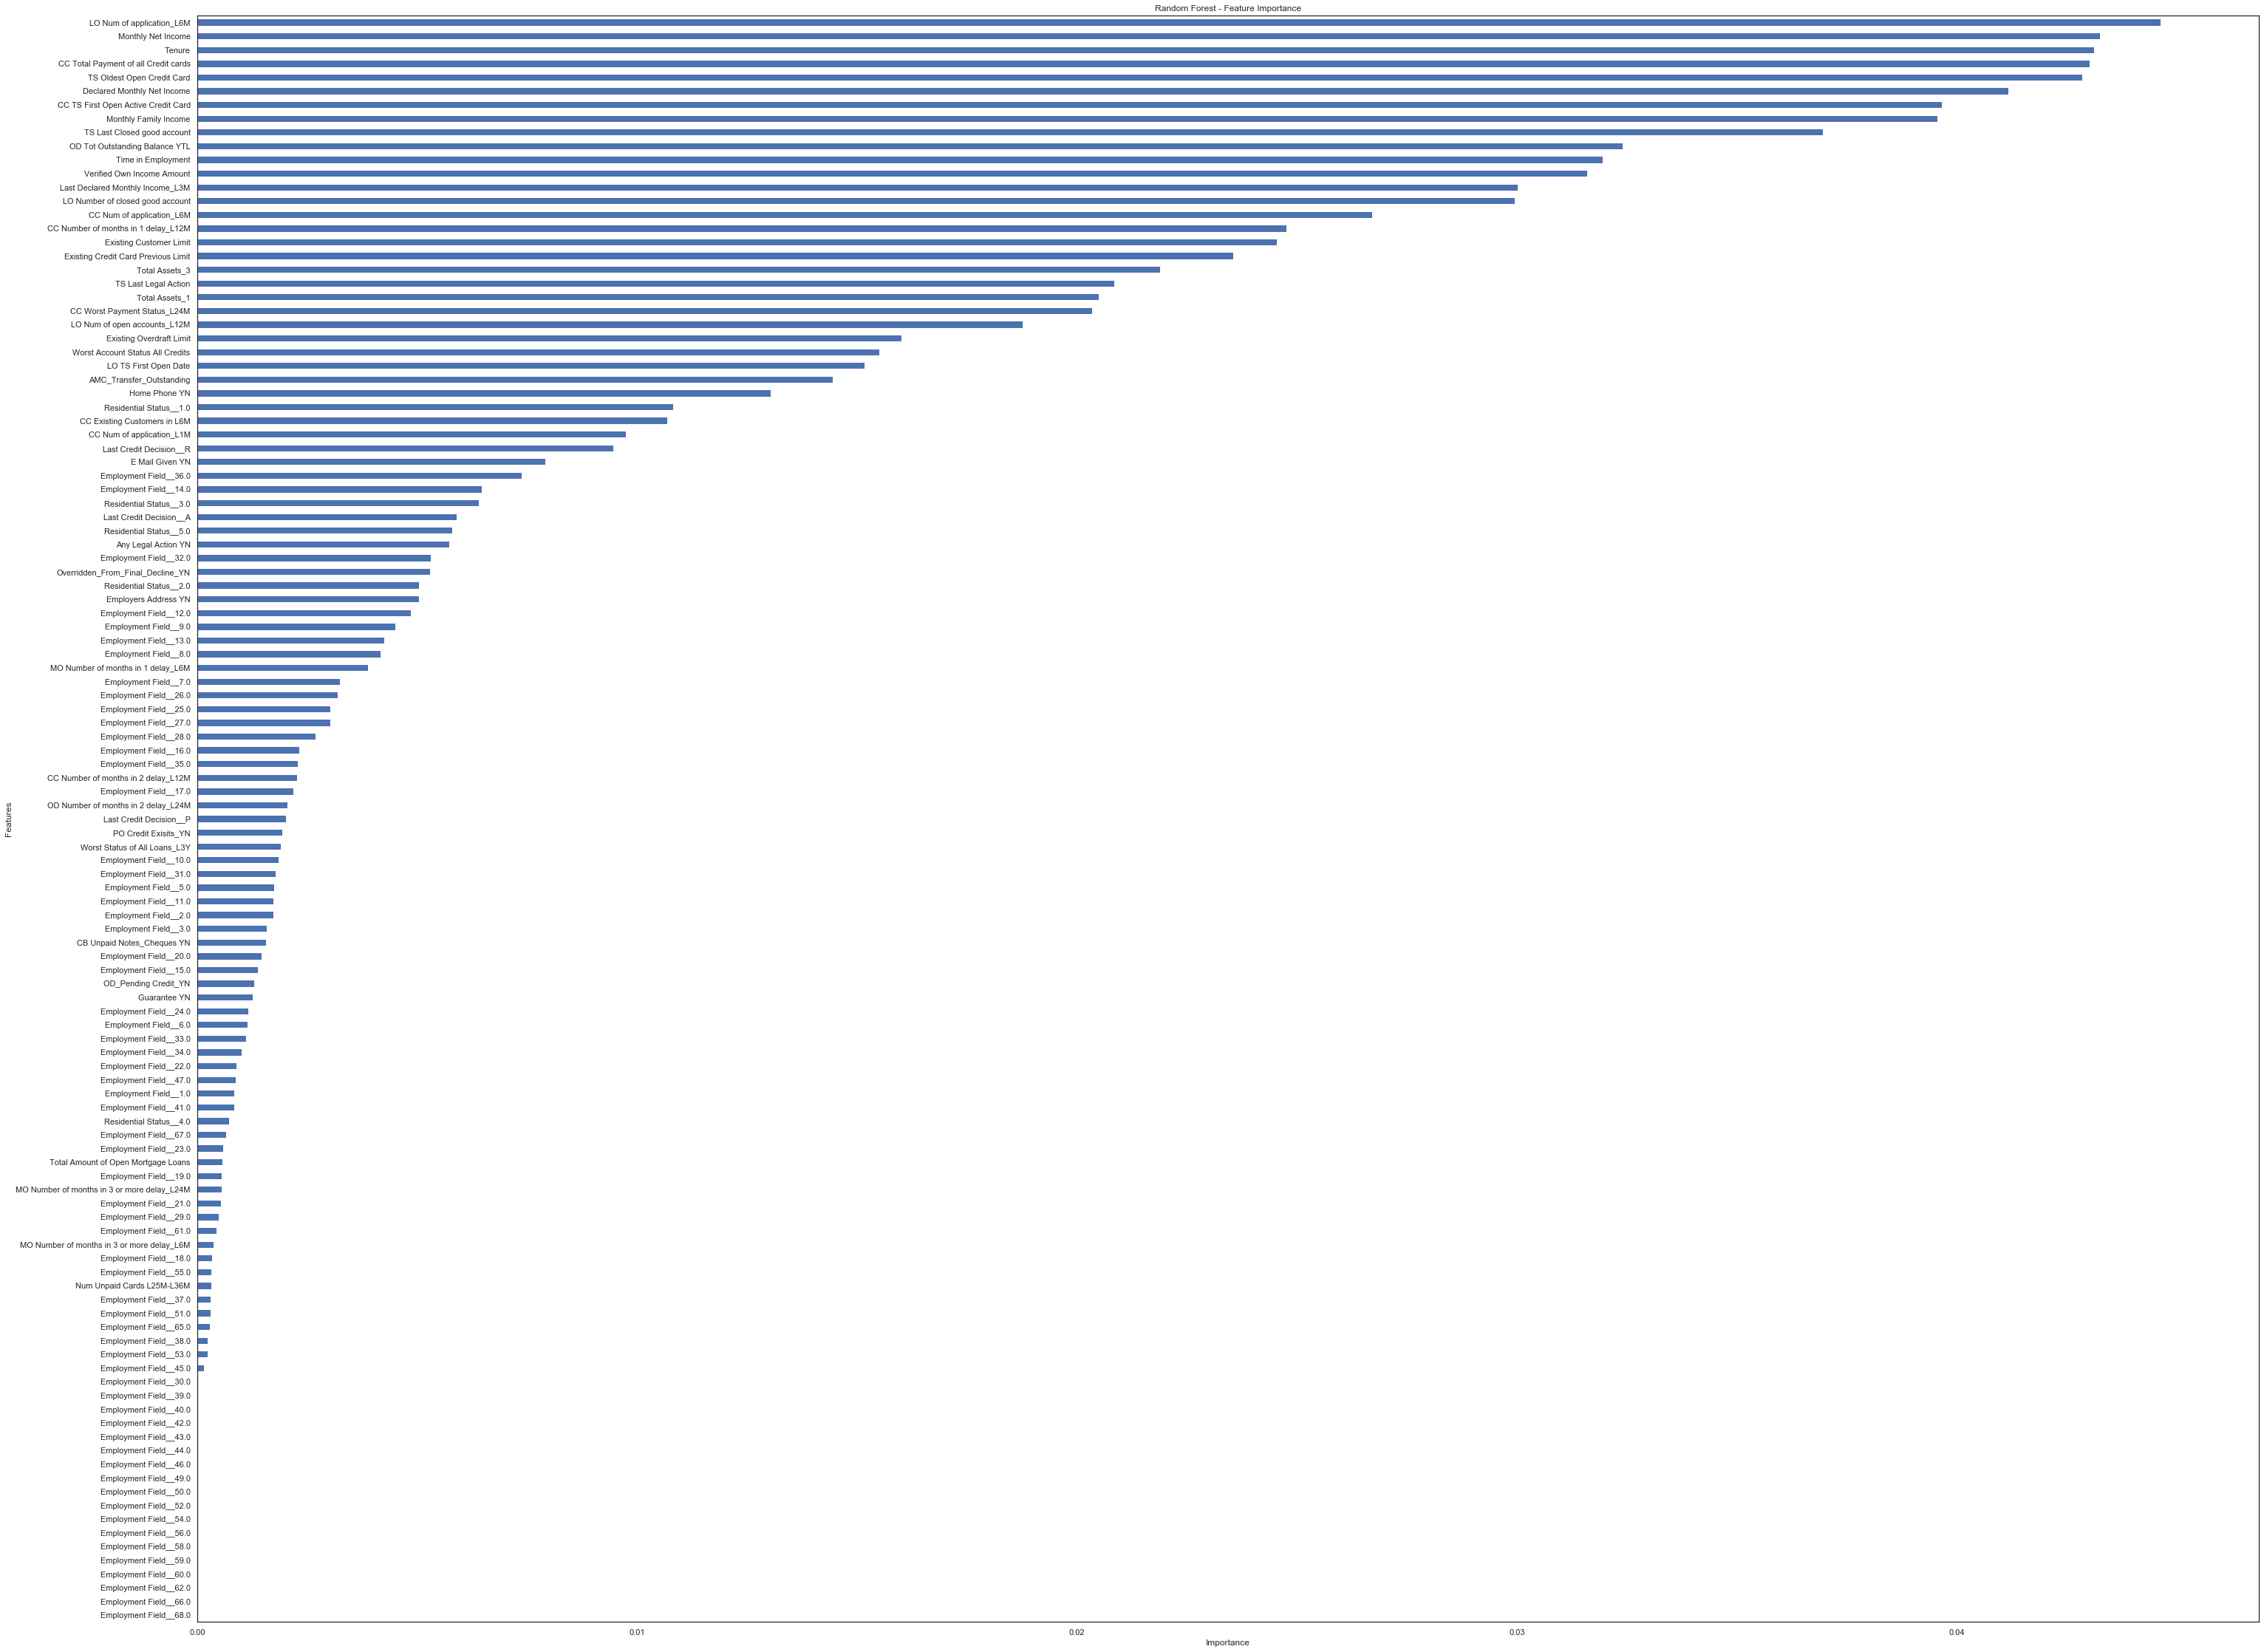

In [277]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [54]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

In [55]:
from rfpimp import permutation_importances
from sklearn.metrics import r2_score

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp

Importance
Feature                                                
TS Oldest Open Credit Card                        0.471
TS Last Closed good account                       0.406
CC TS First Open Active Credit Card               0.388
LO Num of application_L6M                         0.378
Last Credit Decision__A                           0.337
CC Total Payment of all Credit cards              0.291
Worst Account Status All Credits                  0.277
LO Number of closed good account                  0.272
Declared Monthly Net Income                       0.272
TS Last Legal Action                              0.268
Verified Own Income Amount                        0.263
Total Assets_3                                    0.254
Total Assets_1                                    0.245
Last Declared Monthly Income_L3M                  0.235
Tenure                                            0.231
OD Tot Outstanding Balance YTL                    0.203
Monthly Net Income                                0.194
CC Num of application_L6M                         0.189
Time in Employment                                0.189
Monthly Family Income                             0.175
LO Num of open accounts_L12M                      0.166
CC Number of months in 1 delay_L12M               0.166
Existing Customer Limit                           0.162
Existing Credit Card Previous Limit               0.157
CC Worst Payment Status_L24M                      0.152
Existing Overdraft Limit                          0.138
Employers Address YN                              0.106
Any Legal Action YN                               0.092
E Mail Given YN                                   0.092
CC Existing Customers in L6M                      0.083
...                                                 ...
Employment Field__59.0                            0.000
Employment Field__61.0                            0.000
Employment Field__62.0                            0.000
Employment Field__67.0                            0.000
Employment Field__66.0                            0.000
Employment Field__42.0                            0.000
Employment Field__6.0                             0.000
Employment Field__40.0                            0.000
Employment Field__21.0                            0.000
Total Amount of Open Mortgage Loans               0.000
OD Number of months in 2 delay_L24M               0.000
MO Number of months in 3 or more delay_L24M       0.000
Num Unpaid Cards L25M-L36M                        0.000
Employment Field__3.0                             0.000
Employment Field__10.0                            0.000
Employment Field__17.0                            0.000
Employment Field__19.0                            0.000
Employment Field__20.0                            0.000
Employment Field__22.0                            0.000
Employment Field__39.0                            0.000
Employment Field__23.0                            0.000
Employment Field__24.0                            0.000
Employment Field__28.0                            0.000
Employment Field__29.0                            0.000
Employment Field__30.0                            0.000
Employment Field__33.0                            0.000
Employment Field__34.0                            0.000
Employment Field__37.0                            0.000
Employment Field__38.0                            0.000
Employment Field__68.0                            0.000

[117 rows x 1 columns]

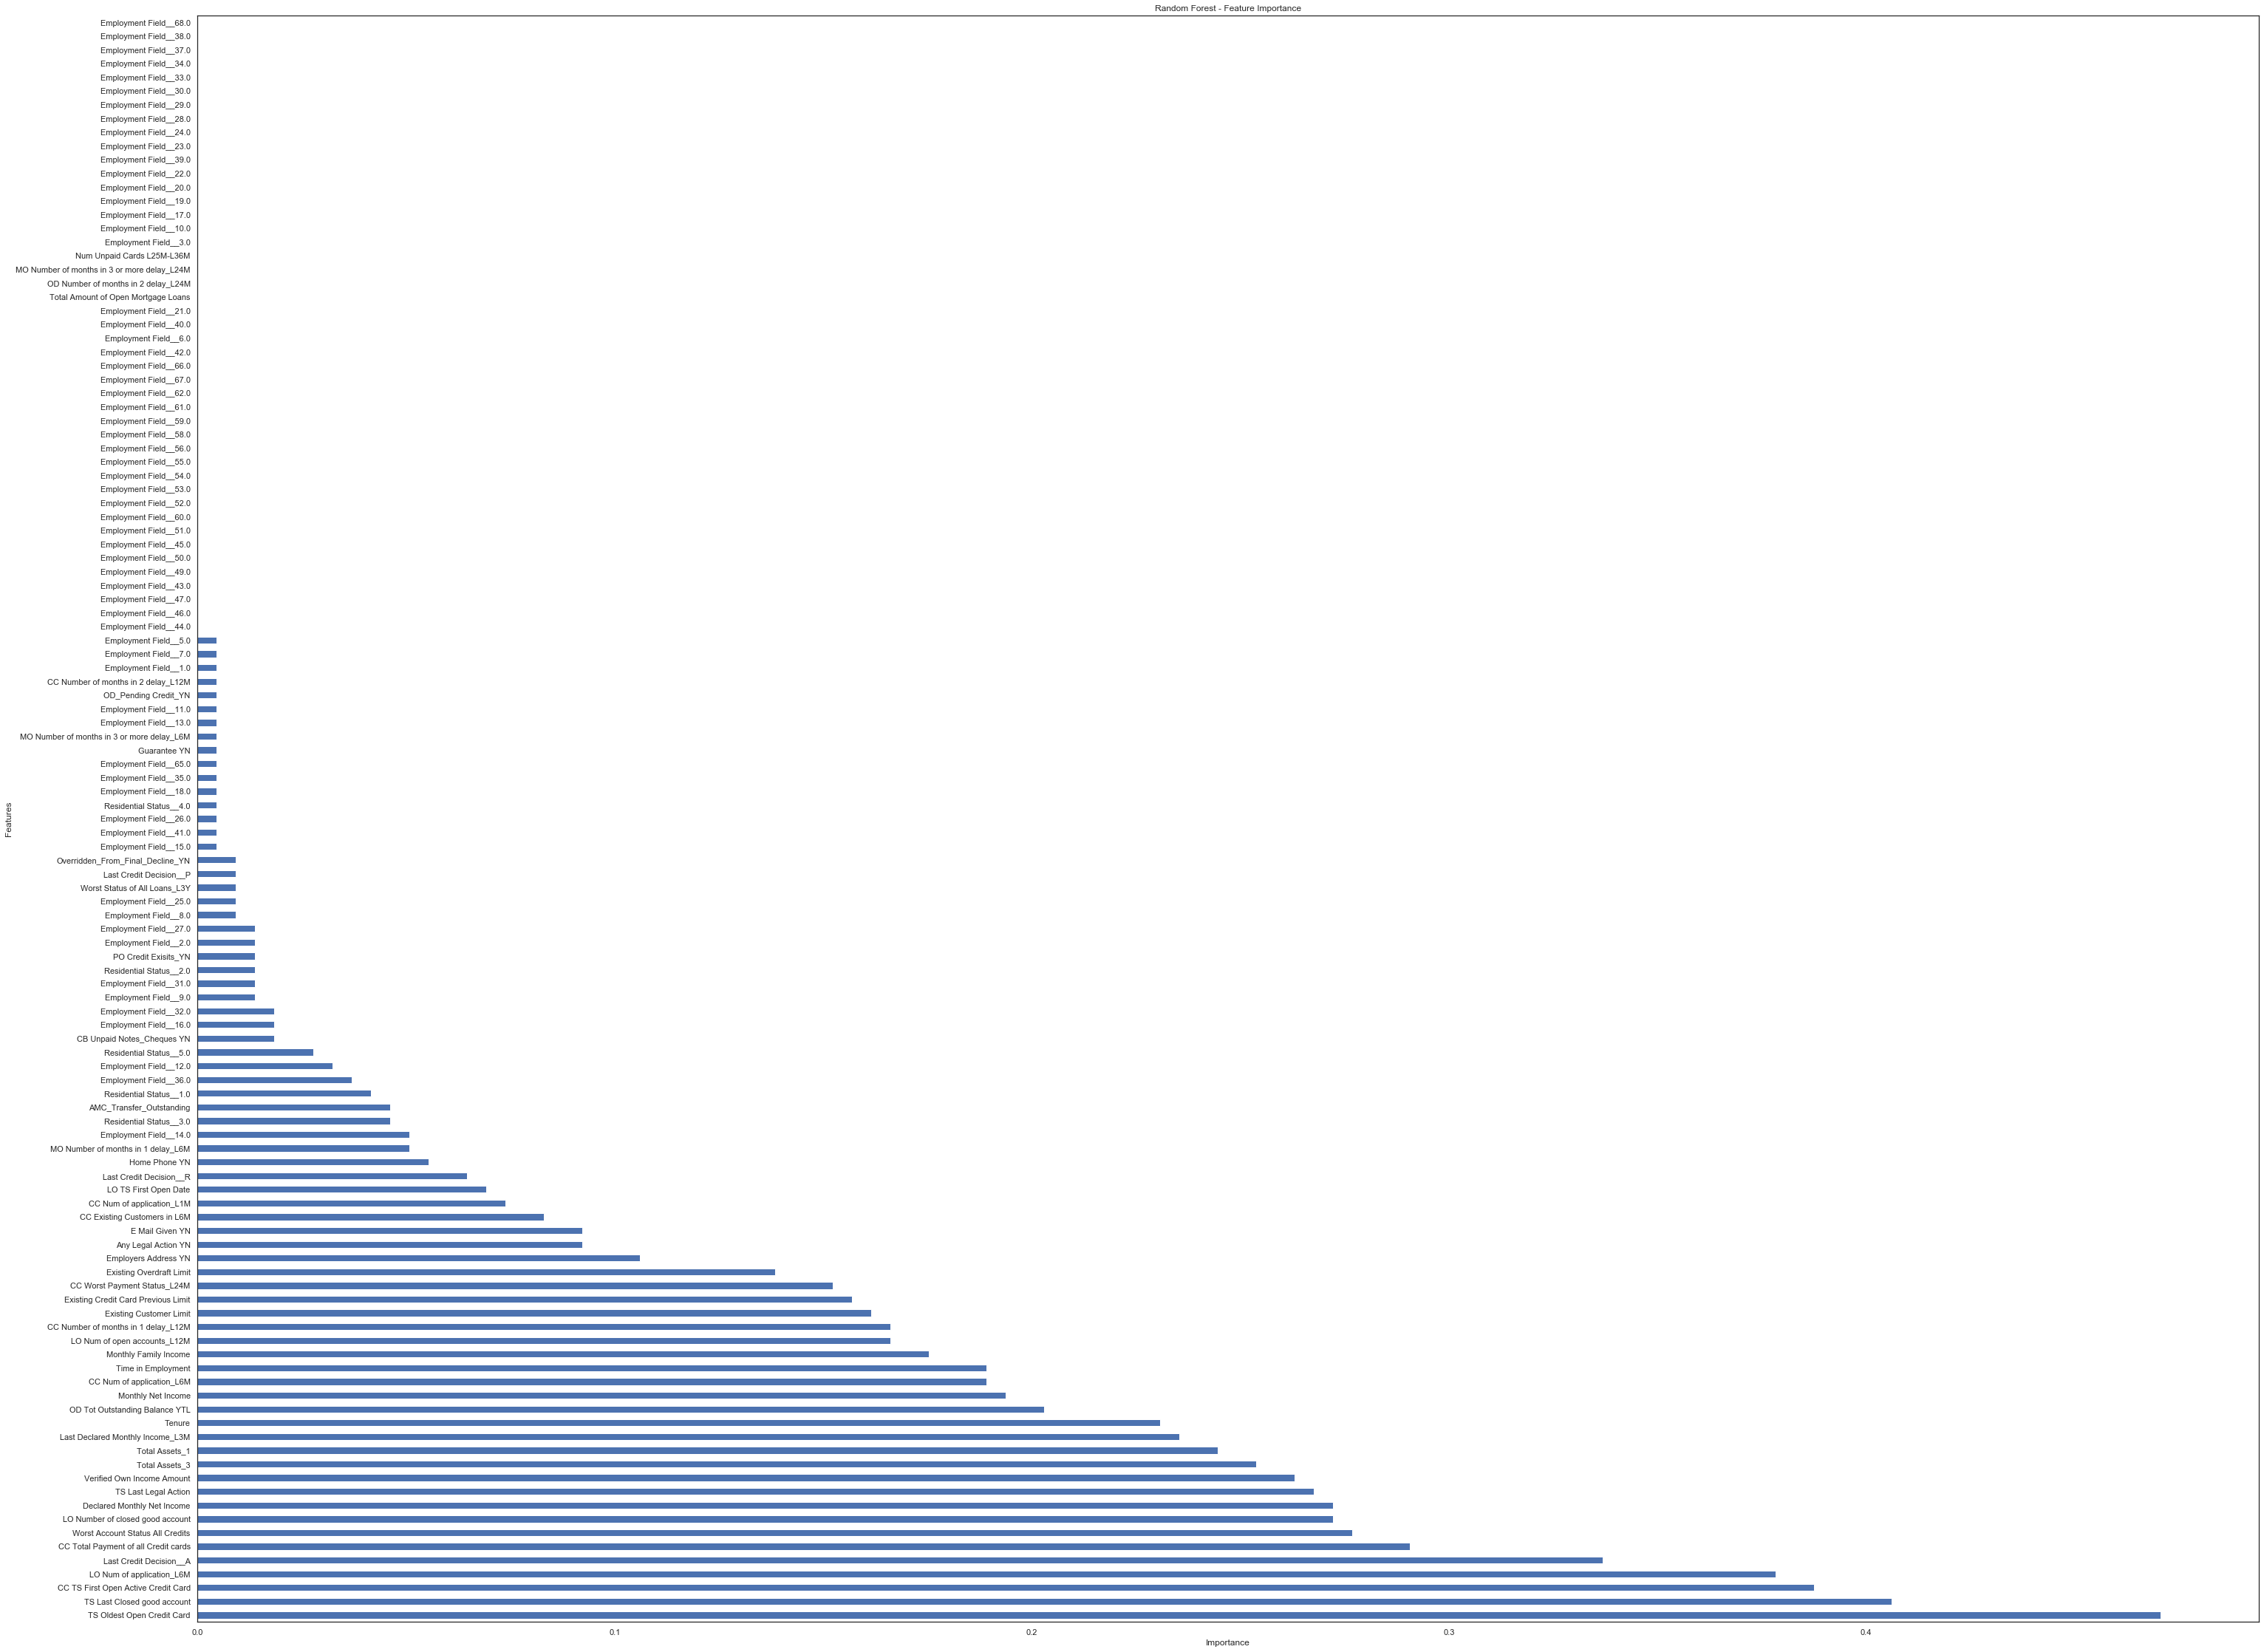

In [56]:
fea_imp = perm_imp_rfpimp
fea_imp.plot(kind='barh', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [278]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                     col
116 0.000  Employment Field__68.0
114 0.000  Employment Field__66.0
112 0.000  Employment Field__62.0
110 0.000  Employment Field__60.0
109 0.000  Employment Field__59.0
108 0.000  Employment Field__58.0
107 0.000  Employment Field__56.0
105 0.000  Employment Field__54.0
103 0.000  Employment Field__52.0
101 0.000  Employment Field__50.0
100 0.000  Employment Field__49.0
98  0.000  Employment Field__46.0
96  0.000  Employment Field__44.0
95  0.000  Employment Field__43.0
94  0.000  Employment Field__42.0
92  0.000  Employment Field__40.0
91  0.000  Employment Field__39.0
82  0.000  Employment Field__30.0

In [279]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
3                    1                                0.010   
4                    0                                0.078   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
3                      0.013                 0.169   
4                      0.000                -1.000   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                0.245   
1                       0.037                                0.038   
2                       0.783                                0.782   
3                       0.017                                0.001   
4                       0.360                                0.360   

   Total Assets_3  TS Last Closed good account  ...  Employment Field__38.0  \
0           0.000                        0.066  ...                       0   
1           0.000                        0.066  ...                       0   
2           0.000                        0.000  ...                       0   
3           0.000                        0.738  ...                       0   
4           0.000                        0.131  ...                       0   

   Employment Field__41.0  Employment Field__45.0  Employment Field__47.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__51.0  Employment Field__53.0  Employment Field__55.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__65.0  Employment Field__67.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 99 columns]

In [810]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [811]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26629, 99), (7955, 99), (26629, 1), (7955, 1))

In [220]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Model Accuracy for Binary is: 0.5503456945317411

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       0.5       0.7      7570
           1        0.1       0.7       0.1       385

    accuracy                            0.6      7955
   macro avg        0.5       0.6       0.4      7955
weighted avg        0.9       0.6       0.7      7955


 ------------------------------------

ROC-AUC Score is ..: 0.6232162157525434
Log Loss Score is ..: 15.530857595285514


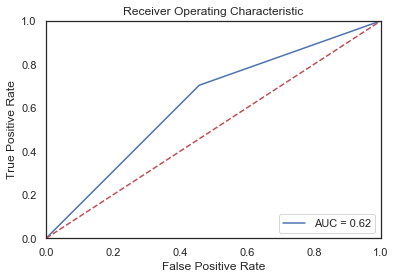

In [242]:
# Gaussian NB used for binary classification.
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",gnb.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = gnb.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

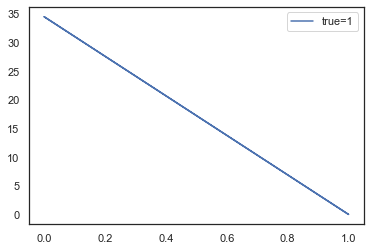

In [233]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
# evaluate predictions for a 0 true value
#losses_0 = [log_loss([0], [y_test], labels=[0,1]) for y_test in y_pred]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [y_test], labels=[0,1]) for y_test in y_pred]
# plot input to loss
#pyplot.plot(y_pred, losses_0, label='true=0')
pyplot.plot(y_pred, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

Model Accuracy for Binary is: 0.9516027655562539

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


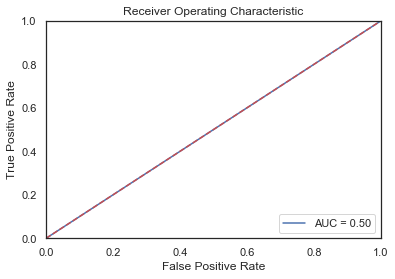

In [243]:
clf_mlp = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_mlp.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_mlp.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [226]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators' : [50,100,200,300],
    'learning_rate' : [1,2,0.5,.1],
}

clf = GridSearchCV(AdaBoostClassifier(), params, n_jobs=2, verbose=2)
clf.fit(X_train, y_train)

print (clf.best_estimator_)
clf = clf.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:  4.7min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)


In [246]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


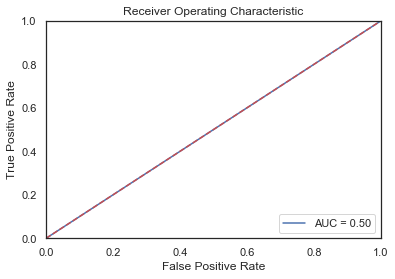

In [247]:
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Accuracy for Binary is: 0.9512256442489001

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.3       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.6       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5022671516066496
Log Loss Score is ..: 1.6846070696684476


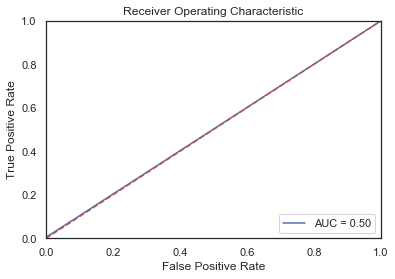

In [253]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_gini.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_gini.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Accuracy for Binary is: 0.9516027655562539

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


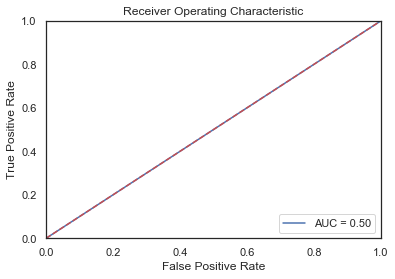

In [254]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_gini.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_gini.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   40.3s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  1.2min finished


Model Accuracy for Binary with no duplicates is: 0.9516027655562539

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


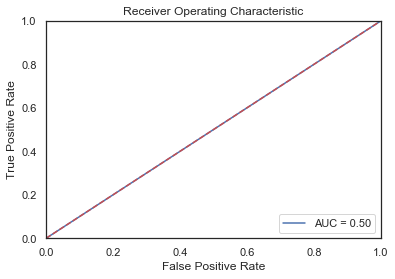

In [251]:
params = {
    'n_estimators' : [10,25,50,100],
    'max_depth' : [10,25,50,100,None],
}

clf = GridSearchCV(RandomForestClassifier(), params, n_jobs=2, verbose=2)
clf.fit(X_train,y_train)
clf = clf.best_estimator_
print("Model Accuracy for {} is: {}".format("Binary with no duplicates",clf.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  6.3min finished


Model Accuracy for Binary with no duplicates is: 0.9516027655562539

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.5       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.7       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5012326511005507
Log Loss Score is ..: 1.671581359099692


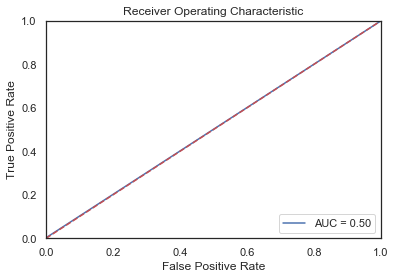

In [252]:
params = {
    'max_depth' : [3,5,10],
    'learning_rate' : [0.01,.05,.1],
    'n_estimators' :[100,150,200],
    'gamma' : [0,0.1],
    'reg_lambda' : [1,2]
}

clf = GridSearchCV(lgb.LGBMClassifier(), params, verbose=1)
clf.fit(X_train,y_train)
clf = clf.best_estimator_
print("Model Accuracy for {} is: {}".format("Binary with no duplicates",clf.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [903]:
df.groupby('Good_Bad_Flag').count()

Description    CC Num of application_L1M  Worst Account Status All Credits  \
Good_Bad_Flag                                                                
0                                  32935                             32935   
1                                   1649                              1649   

Description    Any Legal Action YN  Existing Credit Card Previous Limit  \
Good_Bad_Flag                                                             
0                            32935                                24954   
1                             1649                                 1159   

Description    LO Num of application_L6M  TS Last Legal Action  \
Good_Bad_Flag                                                    
0                                  32935                  5067   
1                                   1649                   483   

Description    TS Oldest Open Credit Card  \
Good_Bad_Flag                               
0                                   32935   
1                                    1649   

Description    CC TS First Open Active Credit Card  Last Credit Decision  \
Good_Bad_Flag                                                              
0                                            32935                 24380   
1                                             1649                  1156   

Description    Total Assets_3  ...  LO TS First Open Date  \
Good_Bad_Flag                  ...                          
0                       32921  ...                   9551   
1                        1648  ...                    378   

Description    MO Number of months in 1 delay_L6M  \
Good_Bad_Flag                                       
0                                            2928   
1                                              40   

Description    MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
Good_Bad_Flag                                                                
0                                                     178            32935   
1                                                       4             1649   

Description    OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
Good_Bad_Flag                                                              
0                             32935                                 1356   
1                              1649                                   35   

Description    Num Unpaid Cards L25M-L36M  Guarantee YN  \
Good_Bad_Flag                                             
0                                   32935         32935   
1                                    1649          1649   

Description    Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
Good_Bad_Flag                                                                  
0                                         32935                         32935  
1                                          1649                          1649  

[2 rows x 49 columns]

In [904]:
train_data = lgb.Dataset(X_train, label=y_train, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test, label=y_test)

In [905]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,
    'scale_pos_weight':1 # because training data is extremely unbalanced 

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.675972
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.694152
[3]	valid_0's auc: 0.705801
[4]	valid_0's auc: 0.717139
[5]	valid_0's auc: 0.72101
[6]	valid_0's auc: 0.721495
[7]	valid_0's auc: 0.72652
[8]	valid_0's auc: 0.729527
[9]	valid_0's auc: 0.733877
[10]	valid_0's auc: 0.734246
[11]	valid_0's auc: 0.731358
[12]	valid_0's auc: 0.729102
[13]	valid_0's auc: 0.732444
[14]	valid_0's auc: 0.73226
[15]	valid_0's auc: 0.733833
[16]	valid_0's auc: 0.735191
[17]	valid_0's auc: 0.734826
[18]	valid_0's auc: 0.734863
[19]	valid_0's auc: 0.736337
[20]	valid_0's auc: 0.736982
[21]	valid_0's auc: 0.737627
[22]	valid_0's auc: 0.738134
[23]	valid_0's auc: 0.738115
[24]	valid_0's auc: 0.737032
[25]	valid_0's auc: 0.737735
[26]	valid_0's auc: 0.739379
[27]	valid_0's auc: 0.741034
[28]	valid_0's auc: 0.741466
[29]	valid_0's auc: 0.741806
[30]	valid_0's auc: 0.742387
[31]	valid_0's auc: 0.743066
[32]	valid_0's auc: 0.744873
[33]	valid_0's auc: 0

[288]	valid_0's auc: 0.758309
[289]	valid_0's auc: 0.75842
[290]	valid_0's auc: 0.758353
[291]	valid_0's auc: 0.758114
[292]	valid_0's auc: 0.75848
[293]	valid_0's auc: 0.758452
[294]	valid_0's auc: 0.758317
[295]	valid_0's auc: 0.758265
[296]	valid_0's auc: 0.758267
[297]	valid_0's auc: 0.758429
[298]	valid_0's auc: 0.758321
[299]	valid_0's auc: 0.758467
[300]	valid_0's auc: 0.758762
[301]	valid_0's auc: 0.758643
[302]	valid_0's auc: 0.758521
[303]	valid_0's auc: 0.758449
[304]	valid_0's auc: 0.758385
[305]	valid_0's auc: 0.758336
[306]	valid_0's auc: 0.758397
[307]	valid_0's auc: 0.758104
[308]	valid_0's auc: 0.758071
[309]	valid_0's auc: 0.75788
[310]	valid_0's auc: 0.75795
[311]	valid_0's auc: 0.758012
[312]	valid_0's auc: 0.757889
[313]	valid_0's auc: 0.757623
[314]	valid_0's auc: 0.757454
[315]	valid_0's auc: 0.757939
[316]	valid_0's auc: 0.757802
[317]	valid_0's auc: 0.757612
[318]	valid_0's auc: 0.757456
[319]	valid_0's auc: 0.757483
[320]	valid_0's auc: 0.757335
[321]	valid_0'

In [906]:
model.best_iteration

148

In [946]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    'scale_pos_weight':1 # because training data is extremely unbalanced 
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [947]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [948]:
from scipy.misc import derivative

In [949]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7583   |  0.7966   |  24.21    |  0.771    |  0.06035  |  395.6    |  7.202    |  60.94    |  57.08    |
|  2        |  0.7532   |  0.702    |  23.81    |  0.7588   |  0.0597   |  363.7    |  7.477    |  63.36    |  58.3     |
|  3        |  0.762    |  0.8418   |  20.4     |  0.7041   |  0.04396  |  337.5    |  7.563    |  65.61    |  51.41    |
|  4        |  0.7569   |  0.7089   |  22.13    |  0.707    |  0.05743  |  391.1    |  7.256    |  69.05    |  53.41    |
|  5        |  0.7591   |  0.8412   |  24.01    |  0.7806   |  0.05695  |  378.5    |  7.492    |  66.02    |  56.71    |
|  6        |  0.7632   |  0.7797   |  24.96    |  0.7997   |  0.04601  |  325.1    |  7.186    |  69.04    |  59.49    |
|  7        |  0.751    

In [950]:
bo.max['params']

{'bagging_fraction': 0.7000000123498967,
 'bagging_freq': 25.0,
 'feature_fraction': 0.7,
 'learning_rate': 0.07,
 'max_bin': 399.9999997756523,
 'max_depth': 7.0,
 'min_child_samples': 69.99999988289231,
 'num_leaves': 58.39476057661721}

In [980]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 70,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 58,
    'feature_fraction': 0.7 ,
    'bagging_fraction': 0.7,
    'bagging_freq': 25,
    'learning_rate': 0.07,
    'verbose': 0,
    'max_depth': 7,
    'max_bin' : 400,
    'scale_pos_weight':1 # because training data is extremely unbalanced 
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.664367
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.692211
[3]	valid_0's auc: 0.703983
[4]	valid_0's auc: 0.721733
[5]	valid_0's auc: 0.716778
[6]	valid_0's auc: 0.719866
[7]	valid_0's auc: 0.721531
[8]	valid_0's auc: 0.721642
[9]	valid_0's auc: 0.724443
[10]	valid_0's auc: 0.728748
[11]	valid_0's auc: 0.731388
[12]	valid_0's auc: 0.732715
[13]	valid_0's auc: 0.732956
[14]	valid_0's auc: 0.733527
[15]	valid_0's auc: 0.733241
[16]	valid_0's auc: 0.733405
[17]	valid_0's auc: 0.734458
[18]	valid_0's auc: 0.732727
[19]	valid_0's auc: 0.73303
[20]	valid_0's auc: 0.735831
[21]	valid_0's auc: 0.736405
[22]	valid_0's auc: 0.735437
[23]	valid_0's auc: 0.736747
[24]	valid_0's auc: 0.735964
[25]	valid_0's auc: 0.736259
[26]	valid_0's auc: 0.736814
[27]	valid_0's auc: 0.737395
[28]	valid_0's auc: 0.738629
[29]	valid_0's auc: 0.739837
[30]	valid_0's auc: 0.738382
[31]	valid_0's auc: 0.739396
[32]	valid_0's auc: 0.739465
[33]	valid_0's auc:

[277]	valid_0's auc: 0.750804
[278]	valid_0's auc: 0.750399
[279]	valid_0's auc: 0.750167
[280]	valid_0's auc: 0.749693
[281]	valid_0's auc: 0.749982
[282]	valid_0's auc: 0.74999
[283]	valid_0's auc: 0.750007
[284]	valid_0's auc: 0.750014
[285]	valid_0's auc: 0.749794
[286]	valid_0's auc: 0.749727
[287]	valid_0's auc: 0.749894
[288]	valid_0's auc: 0.749694
[289]	valid_0's auc: 0.74986
[290]	valid_0's auc: 0.7499
[291]	valid_0's auc: 0.749874
[292]	valid_0's auc: 0.75
[293]	valid_0's auc: 0.750276
[294]	valid_0's auc: 0.750479
[295]	valid_0's auc: 0.750698
[296]	valid_0's auc: 0.750522
[297]	valid_0's auc: 0.750561
[298]	valid_0's auc: 0.750766
[299]	valid_0's auc: 0.750655
[300]	valid_0's auc: 0.750283
[301]	valid_0's auc: 0.749898
[302]	valid_0's auc: 0.749883
[303]	valid_0's auc: 0.750186
[304]	valid_0's auc: 0.750016
[305]	valid_0's auc: 0.750069
[306]	valid_0's auc: 0.750187
[307]	valid_0's auc: 0.750399
[308]	valid_0's auc: 0.74997
[309]	valid_0's auc: 0.749736
[310]	valid_0's auc

In [984]:
Y_pred=model.predict(X_test, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i]>=.1:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

In [981]:
Y_pred=model.predict(X_test, num_iteration=model.best_iteration)
Y_pred[:10]

array([0.01877489, 0.03210307, 0.05350113, 0.08457312, 0.00363871,
       0.00562805, 0.0046686 , 0.08445144, 0.03096412, 0.00388478])

              precision    recall  f1-score   support

           0        1.0       0.9       0.9      7570
           1        0.1       0.4       0.2       385

    accuracy                            0.9      7955
   macro avg        0.6       0.6       0.6      7955
weighted avg        0.9       0.9       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.632785774331349
Log Loss Score is ..: 4.611041734869307


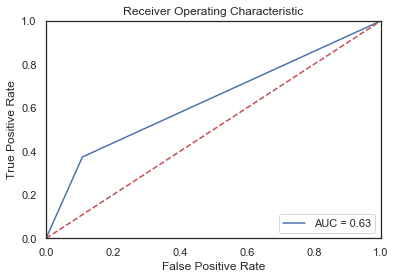

In [985]:
target_names = ['0','1']
print(classification_report(y_test, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [986]:
cm = confusion_matrix(y_test, Y_pred)
cm

array([[6749,  821],
       [ 241,  144]], dtype=int64)

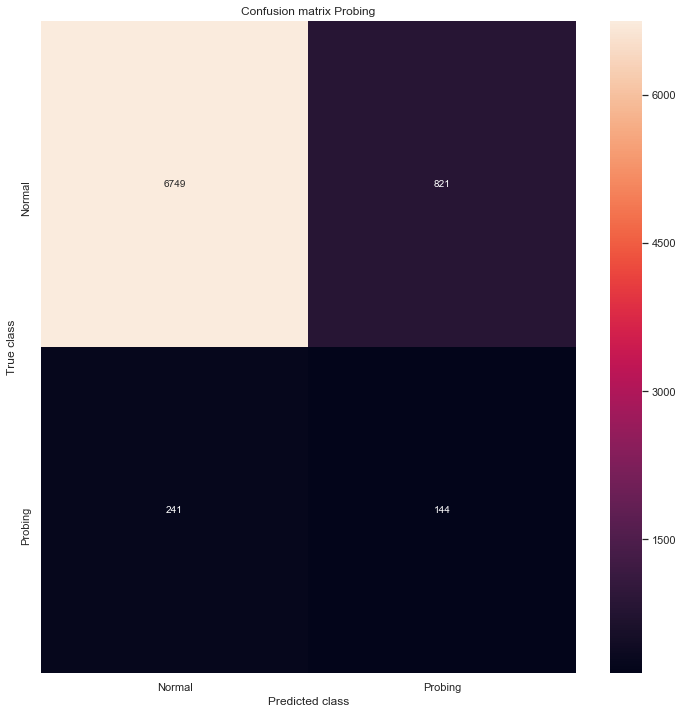

In [987]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [898]:
from scipy.misc import derivative

In [1049]:
## Focal Loss

def focal_loss_lgb(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	def fl(x,t):
		p = 1/(1+np.exp(-x))
		return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
	partial_fl = lambda x: fl(x, y_true)
	grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
	hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
	return grad, hess

def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	p = 1/(1+np.exp(-y_pred))
	loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
	return 'focal_loss', np.mean(loss), False

focal_loss = lambda x,y: focal_loss_lgb(x, y, 0.1, 5.)
eval_error = lambda x,y: focal_loss_lgb_eval_error(x, y, 0.1, 5.)

def lgbm_bay_focal(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'false',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    'scale_pos_weight':25 # because training data is extremely unbalanced 

    }
     evals_results = {}
     model_focal = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       fobj= focal_loss,
                       feval=eval_error,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       verbose_eval=False,
                       early_stopping_rounds=100)
     return model_focal.best_score['valid_0']['auc']

In [989]:
## bayesian focal
 
bo_focal = BayesianOptimization(lgbm_bay_focal, params)
bo_focal.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7581   |  0.8033   |  23.8     |  0.7891   |  0.05574  |  357.1    |  7.871    |  63.37    |  56.1     |
|  2        |  0.7614   |  0.7429   |  21.75    |  0.777    |  0.05217  |  399.7    |  7.285    |  63.28    |  56.96    |
|  3        |  0.764    |  0.8153   |  22.32    |  0.7724   |  0.05831  |  373.3    |  7.98     |  69.77    |  54.09    |
|  4        |  0.757    |  0.7159   |  23.53    |  0.7452   |  0.05058  |  375.0    |  7.728    |  62.83    |  56.27    |
|  5        |  0.7578   |  0.8755   |  20.42    |  0.7954   |  0.06963  |  357.7    |  7.414    |  66.53    |  57.27    |
|  6        |  0.762    |  0.8219   |  20.73    |  0.7276   |  0.04274  |  399.0    |  7.317    |  69.95    |  50.01    |
|  7        |  0.7662   

In [990]:
bo_focal.max['params']

{'bagging_fraction': 0.7775040240459824,
 'bagging_freq': 24.312036731933507,
 'feature_fraction': 0.7398179453160283,
 'learning_rate': 0.0487818260637736,
 'max_bin': 399.5960634492624,
 'max_depth': 7.743748586988417,
 'min_child_samples': 69.83783001775407,
 'num_leaves': 59.82664976576788}

In [1050]:
#'''
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 70,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.7398179453160283,
    'bagging_fraction': 0.7775040240459824,
    'bagging_freq': 24,
    'learning_rate': 0.048,
    'verbose': 0,
    'max_depth': 8,
    'max bin' : 400,
    'scale_pos_weight':25 # because training data is extremely unbalanced 


    
}
#'''
#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model_focal = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       fobj=focal_loss,
                       feval=eval_error,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.674221	valid_0's focal_loss: 0.0176672
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.703986	valid_0's focal_loss: 0.0167352
[3]	valid_0's auc: 0.707987	valid_0's focal_loss: 0.0158565
[4]	valid_0's auc: 0.721655	valid_0's focal_loss: 0.0150278
[5]	valid_0's auc: 0.729503	valid_0's focal_loss: 0.0142464
[6]	valid_0's auc: 0.728974	valid_0's focal_loss: 0.0135094
[7]	valid_0's auc: 0.730088	valid_0's focal_loss: 0.0128146
[8]	valid_0's auc: 0.728663	valid_0's focal_loss: 0.0121591
[9]	valid_0's auc: 0.731721	valid_0's focal_loss: 0.0115406
[10]	valid_0's auc: 0.733725	valid_0's focal_loss: 0.010957
[11]	valid_0's auc: 0.731736	valid_0's focal_loss: 0.0104068
[12]	valid_0's auc: 0.73185	valid_0's focal_loss: 0.00988803
[13]	valid_0's auc: 0.73355	valid_0's focal_loss: 0.0093983
[14]	valid_0's auc: 0.733447	valid_0's focal_loss: 0.00893652
[15]	valid_0's auc: 0.732928	valid_0's focal_loss: 0.00850064
[16]	valid_0's auc: 0.736892	va

[133]	valid_0's auc: 0.756899	valid_0's focal_loss: 0.00149327
[134]	valid_0's auc: 0.757031	valid_0's focal_loss: 0.00149348
[135]	valid_0's auc: 0.756806	valid_0's focal_loss: 0.00149448
[136]	valid_0's auc: 0.757267	valid_0's focal_loss: 0.00149419
[137]	valid_0's auc: 0.757522	valid_0's focal_loss: 0.00149409
[138]	valid_0's auc: 0.757778	valid_0's focal_loss: 0.00149398
[139]	valid_0's auc: 0.758011	valid_0's focal_loss: 0.0014939
[140]	valid_0's auc: 0.757997	valid_0's focal_loss: 0.00149421
[141]	valid_0's auc: 0.75851	valid_0's focal_loss: 0.00149394
[142]	valid_0's auc: 0.758544	valid_0's focal_loss: 0.00149458
[143]	valid_0's auc: 0.758795	valid_0's focal_loss: 0.00149459
[144]	valid_0's auc: 0.759177	valid_0's focal_loss: 0.00149406
[145]	valid_0's auc: 0.759117	valid_0's focal_loss: 0.00149452
[146]	valid_0's auc: 0.759378	valid_0's focal_loss: 0.00149459
[147]	valid_0's auc: 0.759494	valid_0's focal_loss: 0.001495
[148]	valid_0's auc: 0.759685	valid_0's focal_loss: 0.00149

In [1056]:
Y_pred_fc=model_focal.predict(X_test, num_iteration=model_focal.best_iteration)

for i in range(0,len(Y_pred_fc)):
    if Y_pred_fc[i] > -0.8:       # setting threshold to .5
       Y_pred_fc[i]=1
    else:  
       Y_pred_fc[i]=0

In [1055]:
Y_pred_fc=model_focal.predict(X_test, num_iteration=model_focal.best_iteration)
Y_pred_fc[:10]

array([-1.0869596 , -1.04368147, -0.87543108, -0.82650979, -1.29679928,
       -1.23721996, -1.28240757, -0.93057555, -1.0522604 , -1.30058152])

In [850]:
y_test

Description  Good_Bad_Flag
14926                    0
27133                    0
2635                     0
11843                    0
12509                    0
32502                    0
25965                    0
11311                    1
26741                    0
10337                    0
13202                    0
5341                     0
3610                     0
22902                    0
27989                    0
1483                     0
31903                    0
13169                    0
28020                    0
2240                     0
7094                     0
967                      0
11365                    0
12358                    0
27276                    0
33480                    0
20941                    0
18924                    0
30695                    0
32707                    0
...                    ...
8293                     0
10888                    0
16293                    0
12101                    0
32019                    0
8570                     0
9558                     1
2851                     0
20494                    0
15134                    0
22305                    0
30676                    0
16817                    0
219                      0
18989                    0
4167                     0
20042                    0
10311                    0
30317                    0
11766                    0
32750                    0
6635                     0
3483                     0
7578                     0
24312                    1
31200                    0
22892                    0
12947                    0
31475                    0
28455                    0

[7955 rows x 1 columns]

              precision    recall  f1-score   support

           0        1.0       0.9       0.9      7570
           1        0.2       0.4       0.2       385

    accuracy                            0.9      7955
   macro avg        0.6       0.6       0.6      7955
weighted avg        0.9       0.9       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.642362195268404
Log Loss Score is ..: 4.224615604822035


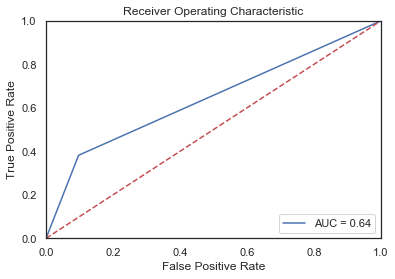

In [1057]:
target_names = ['0','1']
print(classification_report(y_test, Y_pred_fc, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, Y_pred_fc))
print("Log Loss Score is ..:",log_loss(y_test, Y_pred_fc, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, Y_pred_fc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1058]:
cm = confusion_matrix(y_test, Y_pred_fc)
cm

array([[6835,  735],
       [ 238,  147]], dtype=int64)

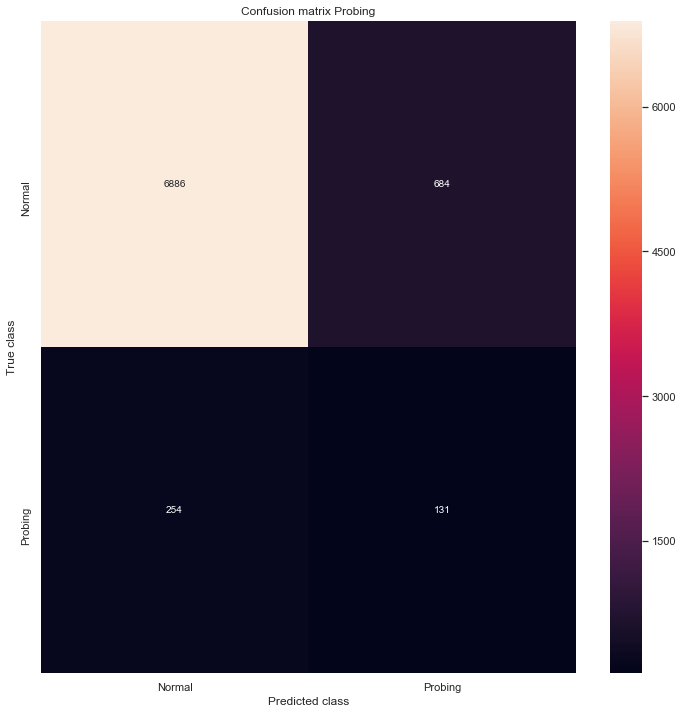

In [1053]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [480]:
Good_Bad_Flag = [0,1]

In [441]:
y0=np.ones(len(y_train),np.int8)
y0_test=np.ones(len(y_test),np.int8)

In [442]:
for index, value in enumerate(y_train['Good_Bad_Flag']):
    if value == 0:
        y0[index] = 0

In [443]:
for index, value in enumerate(y_test['Good_Bad_Flag']):
    if value == 0:
        y0_test[index] = 0

In [545]:
#Buildling and training the model

def getModel():
    inp = Input(shape=(X_train.shape[1],))
    d1=(inp)
    encoded = Dense(256, activation='relu', activity_regularizer=regularizers.l2(10e-5))(d1)
    decoded = Dense(X_train.shape[1], activation='relu')(encoded)
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

autoencoder=getModel()

history=autoencoder.fit(X_train[np.where(y0==0)],X_train[np.where(y0==0)],
               epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.1).history
#autoencoder.save("model.h5")

Train on 22828 samples, validate on 2537 samples
Epoch 1/100
22828/22828 [==============================] - 1s 38us/step - loss: 0.2579 - val_loss: 0.1638
Epoch 2/100
22828/22828 [==============================] - 1s 33us/step - loss: 0.1428 - val_loss: 0.1317
Epoch 3/100
22828/22828 [==============================] - 1s 32us/step - loss: 0.1235 - val_loss: 0.1197
Epoch 4/100
22828/22828 [==============================] - 1s 32us/step - loss: 0.1148 - val_loss: 0.1135
Epoch 5/100
22828/22828 [==============================] - 1s 32us/step - loss: 0.1102 - val_loss: 0.1098
Epoch 6/100
22828/22828 [==============================] - 1s 31us/step - loss: 0.1073 - val_loss: 0.1074
Epoch 7/100
22828/22828 [==============================] - 1s 33us/step - loss: 0.1053 - val_loss: 0.1055
Epoch 8/100
22828/22828 [==============================] - 1s 31us/step - loss: 0.1038 - val_loss: 0.1042
Epoch 9/100
22828/22828 [==============================] - 1s 33us/step - loss: 0.1026 - val_loss: 0.10

KeyboardInterrupt: 

In [546]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse})
error_df.describe()

reconstruction_error
count              7955.000
mean                  0.095
std                   0.024
min                   0.032
25%                   0.081
50%                   0.091
75%                   0.112
max                   0.173

In [547]:
autoencoder
autoencoder.layers
autoencoder.outputs
autoencoder.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x0000028C9B92E048>>

In [548]:
print(autoencoder.layers)

[<keras.engine.input_layer.InputLayer object at 0x0000028CAB53C278>, <keras.layers.core.Dense object at 0x0000028C9B942668>, <keras.layers.core.Dense object at 0x0000028CAB2ACE80>]


In [549]:
print(autoencoder.inputs)

[<tf.Tensor 'input_16:0' shape=(None, 99) dtype=float32>]


In [550]:
from keras import utils

In [551]:
print(utils.print_summary(autoencoder))

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 99)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               25600     
_________________________________________________________________
dense_36 (Dense)             (None, 99)                25443     
Total params: 51,043
Trainable params: 51,043
Non-trainable params: 0
_________________________________________________________________
None


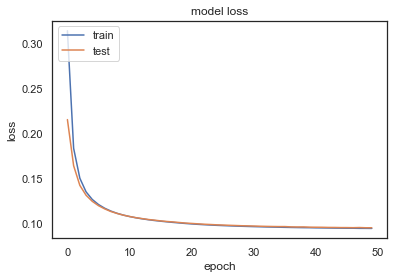

In [552]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [557]:
# Helper function that calculates the reconstruction loss of each data sample
def calculate_losses(x,preds):
    losses=np.zeros(len(x))
    for i in range(len(x)):
        losses[i]=((preds[i] - x[i]) ** 2).mean(axis=None)
        
    return losses

# We set the threshold equal to the training loss of the autoencoder
threshold=history["loss"][-1]

testing_set_predictions=autoencoder.predict(X_test)
test_losses=calculate_losses(X_test,testing_set_predictions)
testing_set_predictions=np.zeros(len(test_losses))
testing_set_predictions[np.where(test_losses>threshold)]=1

In [554]:
accuracy=accuracy_score(y0_test,testing_set_predictions)
recall=recall_score(y0_test,testing_set_predictions)
precision=precision_score(y0_test,testing_set_predictions)
f1=f1_score(y0_test,testing_set_predictions)
print("Performance over the testing data set \n")
print("Accuracy : {} , Recall : {} , Precision : {} , F1 : {}\n".format(accuracy,recall,precision,f1 ))

Performance over the testing data set 

Accuracy : 0.6144563167818982 , Recall : 0.5194805194805194 , Precision : 0.06489292667099286 , F1 : 0.11537352177675222



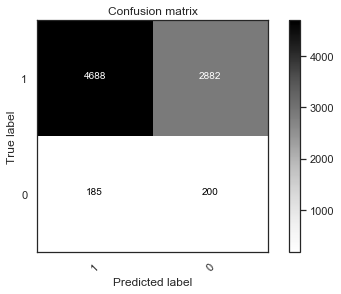

In [555]:
#Plotting confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
c = confusion_matrix(y0_test,testing_set_predictions)
plot_confusion_matrix(c,[1,0])


              precision    recall  f1-score   support

           0        1.0       0.6       0.8      7570
           1        0.1       0.5       0.1       385

    accuracy                            0.6      7955
   macro avg        0.5       0.6       0.4      7955
weighted avg        0.9       0.6       0.7      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5693835886702465
Log Loss Score is ..: 13.316496749589552


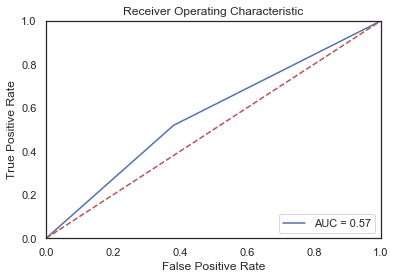

In [556]:
target_names = ['0','1']
print(classification_report(y_test, testing_set_predictions, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, testing_set_predictions))
print("Log Loss Score is ..:",log_loss(y_test, testing_set_predictions, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, testing_set_predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [541]:
test_losses

array([0.1115645 , 0.08104243, 0.131498  , ..., 0.08143863, 0.10148282,
       0.084279  ])

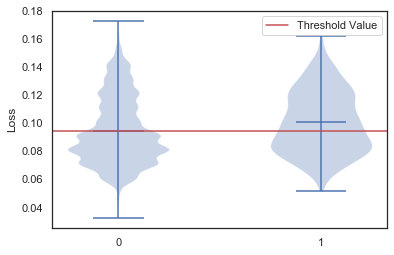

In [558]:
plt.ylabel('Loss')
plt.xticks(np.arange(0,5), Good_Bad_Flag)
plt.violinplot([test_losses[np.where(y0_test==class_)] for class_ in Good_Bad_Flag],np.arange(0,len(Good_Bad_Flag)),showmeans =True )
plt.axhline(y=threshold,c='r',label="Threshold Value")
plt.legend();

In [785]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight('balanced', y_train)
class_weights

array([ 0.52491622,  0.52491622,  0.52491622, ..., 10.53362342,
        0.52491622,  0.52491622])

In [786]:
input_dim = X_train.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder_long = Model(inputs=input_layer, outputs=decoder)

In [787]:
nb_epoch = 10
batch_size = 100
autoencoder_long.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

history = autoencoder_long.fit(X_train, X_train, #INPUT AND EXPECTED OUTPUT ARE THE SAME.
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    class_weight = class_weights).history

Train on 26629 samples, validate on 7955 samples
Epoch 1/10
26629/26629 [==============================] - 1s 31us/step - loss: 0.3435 - accuracy: 0.4933 - val_loss: 0.2216 - val_accuracy: 0.4957
Epoch 2/10
26629/26629 [==============================] - 1s 25us/step - loss: 0.1823 - accuracy: 0.6428 - val_loss: 0.1563 - val_accuracy: 0.7148
Epoch 3/10
26629/26629 [==============================] - 1s 24us/step - loss: 0.1457 - accuracy: 0.6286 - val_loss: 0.1366 - val_accuracy: 0.5828
Epoch 4/10
26629/26629 [==============================] - 1s 27us/step - loss: 0.1325 - accuracy: 0.5924 - val_loss: 0.1283 - val_accuracy: 0.5190
Epoch 5/10
26629/26629 [==============================] - 1s 26us/step - loss: 0.1258 - accuracy: 0.5842 - val_loss: 0.1228 - val_accuracy: 0.5672
Epoch 6/10
26629/26629 [==============================] - 1s 27us/step - loss: 0.1210 - accuracy: 0.5746 - val_loss: 0.1196 - val_accuracy: 0.4630
Epoch 7/10
26629/26629 [==============================] - 1s 29us/ste

In [788]:
predictions = autoencoder_long.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse})
error_df.describe()

reconstruction_error
count              7955.000
mean                  0.109
std                   0.023
min                   0.045
25%                   0.092
50%                   0.105
75%                   0.127
max                   0.189

In [789]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [790]:
autoencoder_long
autoencoder_long.layers
autoencoder_long.outputs
autoencoder_long.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x0000028CC4ADA828>>

In [791]:
print(autoencoder_long.layers)

[<keras.engine.input_layer.InputLayer object at 0x0000028CC385F2B0>, <keras.layers.core.Dense object at 0x0000028CC44087F0>, <keras.layers.core.Dense object at 0x0000028CC529B4A8>, <keras.layers.core.Dense object at 0x0000028CC3C747F0>, <keras.layers.core.Dense object at 0x0000028CC4DE9470>]


In [792]:
print(autoencoder_long.inputs)

[<tf.Tensor 'input_25:0' shape=(None, 99) dtype=float32>]


In [793]:
from keras import utils
print(utils.print_summary(autoencoder_long))

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 99)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 32)                3200      
_________________________________________________________________
dense_70 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_71 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_72 (Dense)             (None, 99)                1683      
Total params: 5,683
Trainable params: 5,683
Non-trainable params: 0
_________________________________________________________________
None


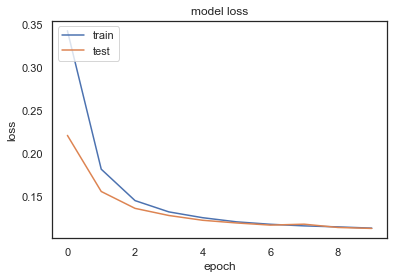

In [794]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [801]:
# Helper function that calculates the reconstruction loss of each data sample
def calculate_losses(x,preds):
    losses=np.zeros(len(x))
    for i in range(len(x)):
        losses[i]=((preds[i] - x[i]) ** 2).mean(axis=None)
        
    return losses

# We set the threshold equal to the training loss of the autoencoder
threshold=history["loss"][-1]

testing_set_predictions=autoencoder_long.predict(X_test)
test_losses=calculate_losses(X_test,testing_set_predictions)
testing_set_predictions=np.zeros(len(test_losses))
testing_set_predictions[np.where(test_losses>threshold)]=1

In [796]:
accuracy=accuracy_score(y0_test,testing_set_predictions)
recall=recall_score(y0_test,testing_set_predictions)
precision=precision_score(y0_test,testing_set_predictions)
f1=f1_score(y0_test,testing_set_predictions)
print("Performance over the testing data set \n")
print("Accuracy : {} , Recall : {} , Precision : {} , F1 : {}\n".format(accuracy,recall,precision,f1 ))

Performance over the testing data set 

Accuracy : 0.621370207416719 , Recall : 0.4909090909090909 , Precision : 0.06289517470881864 , F1 : 0.11150442477876109



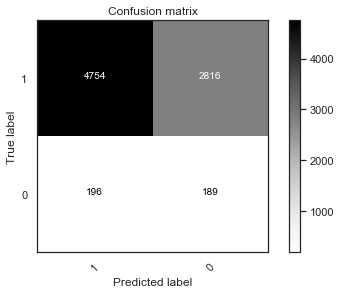

In [797]:
#Plotting confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
c = confusion_matrix(y0_test,testing_set_predictions)
plot_confusion_matrix(c,[1,0])


              precision    recall  f1-score   support

           0        1.0       0.6       0.8      7570
           1        0.1       0.5       0.1       385

    accuracy                            0.6      7955
   macro avg        0.5       0.6       0.4      7955
weighted avg        0.9       0.6       0.7      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5594571874624715
Log Loss Score is ..: 13.077692792939585


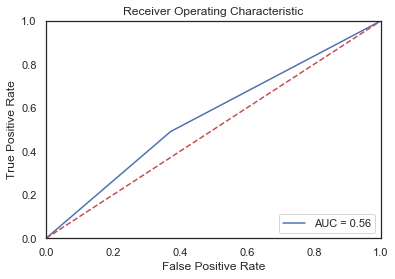

In [798]:
target_names = ['0','1']
print(classification_report(y_test, testing_set_predictions, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, testing_set_predictions))
print("Log Loss Score is ..:",log_loss(y_test, testing_set_predictions, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, testing_set_predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [799]:
test_losses

array([0.12691757, 0.09651208, 0.1470718 , ..., 0.09931085, 0.12483075,
       0.09625806])

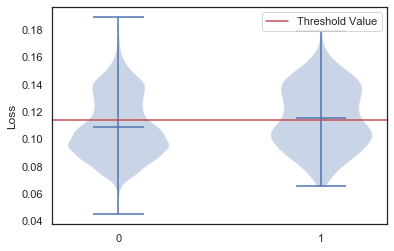

In [802]:
plt.ylabel('Loss')
plt.xticks(np.arange(0,5), Good_Bad_Flag)
plt.violinplot([test_losses[np.where(y0_test==class_)] for class_ in Good_Bad_Flag],np.arange(0,len(Good_Bad_Flag)),showmeans =True )
plt.axhline(y=threshold,c='r',label="Threshold Value")
plt.legend();

UNDER SAMPLING

In [1063]:
# Class count
count_class_0, count_class_1 = df.Good_Bad_Flag.value_counts()

# Divide by class
df_class_0 = df[df['Good_Bad_Flag'] == 0]
df_class_1 = df[df['Good_Bad_Flag'] == 1]

Random under-sampling:
1    1649
0    1649
Name: Good_Bad_Flag, dtype: int64


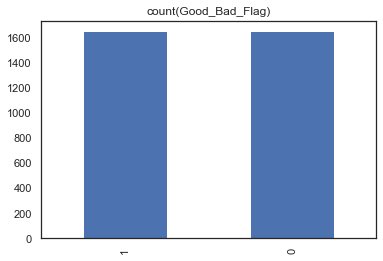

In [1066]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Good_Bad_Flag.value_counts())
df_test_under.Good_Bad_Flag.value_counts().plot(kind='bar',title = 'count(Good_Bad_Flag)')

In [1072]:
y = df_test_under['Good_Bad_Flag']
X = df_test_under.drop('Good_Bad_Flag', axis = 1)

In [1073]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
6779                                 0                                 0   
28311                                0                                11   
23075                                0                                 1   
33062                                2                                 1   
11429                                0                                 0   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
6779                           0                                0.000   
28311                          1                                0.000   
23075                          0                                0.000   
33062                          0                                0.000   
11429                          0                             7500.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
6779                                 7                   nan   
28311                                3                14.000   
23075                                0                   nan   
33062                                6                   nan   
11429                                5                   nan   

Description  TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
6779                                 90                                 2753   
28311                                 0                                    0   
23075                                 5                                  141   
33062                               114                                 3469   
11429                                87                                 2060   

Description Last Credit Decision  Total Assets_3  ...  LO TS First Open Date  \
6779                           R           0.000  ...                    nan   
28311                          A          76.000  ...                    nan   
23075                        NaN           6.000  ...                    nan   
33062                          R         331.000  ...                    nan   
11429                          R         181.000  ...                    nan   

Description  MO Number of months in 1 delay_L6M  \
6779                                        nan   
28311                                       nan   
23075                                       nan   
33062                                       nan   
11429                                       nan   

Description  MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
6779                                                nan                0   
28311                                               nan                0   
23075                                               nan                0   
33062                                               nan                1   
11429                                               nan                1   

Description  OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
6779                            0                                  nan   
28311                           0                                  nan   
23075                           0                                  nan   
33062                           0                                  nan   
11429                           0                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
6779                                  0             0   
28311                                 0             0   
23075                                 0             0   
33062                                 0             0   
11429                                 0             0   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
6779                                        0                             1  
28311                                       0    

In [1074]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                    1   
1                                           1                    0   
2                                           0                    0   
3                                          11                    1   
4                                           1                    0   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                          1                     0   
1                          1                     0   
2                          1                     0   
3                          0                     0   
4                          1                     0   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

Description  CC Existing Customers i

In [1075]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  \
6779                         0                        0   
28311                        1                        0   
23075                        0                        0   
33062                        0                        0   
11429                        0                        0   

       Last Credit Decision__R  Residential Status__1.0  \
6779                         1                        1   
28311                        0                        0   
23075                        0                        1   
33062                        1                        0   
11429                        1                        1   

       Residential Status__2.0  Residential Status__3.0  \
6779                         0                        0   
28311                        0                        0   
23075                        0                        0   
33062                        0                        0   
11429                        0                        0   

       Residential Status__4.0  Residential Status__5.0  \
6779                         0                        0   
28311                        0                        1   
23075                        0                        0   
33062                        0                        1   
11429                        0                        0   

       Employment Field__1.0  Employment Field__2.0  ...  \
6779                       0                      0  ...   
28311                      0                      0  ...   
23075                      0                      0  ...   
33062                      0                      0  ...   
11429                      0                      0  ...   

       Employment Field__51.0  Employment Field__53.0  Employment Field__55.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__56.0  Employment Field__60.0  Employment Field__61.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__65.0  Employment Field__66.0  Employment Field__67.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__68.0  
6779                        0  
28311                       0  
23075                       0  
33062                       0  
11429                       0  

[5 rows x 60 columns]

In [1076]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
6779                           0                                 0   
28311                          0                                11   
23075                          0                                 1   
33062                          2                                 1   
11429                          0                                 0   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
6779                     0                                0.000   
28311                    1                                0.000   
23075                    0                                0.000   
33062                    0                                0.000   
11429                    0                             7500.000   

       LO Num of application_L6M  TS Last Legal Action  \
6779                           7                   nan   
28311                          3                14.000   
23075                          0                   nan   
33062                          6                   nan   
11429                          5                   nan   

       TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
6779                           90                                 2753   
28311                           0                                    0   
23075                           5                                  141   
33062                         114                                 3469   
11429                          87                                 2060   

      Last Credit Decision  Total Assets_3  ...  Employment Field__51.0  \
6779                     R           0.000  ...                       0   
28311                    A          76.000  ...                       0   
23075                  NaN           6.000  ...                       0   
33062                    R         331.000  ...                       0   
11429                    R         181.000  ...                       0   

       Employment Field__53.0  Employment Field__55.0  Employment Field__56.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__60.0  Employment Field__61.0  Employment Field__65.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
6779                        0                       0                       0  
28311                       0                       0                       0  
23075                       0                       0                       0  
33062                       0                       0                       0  
11429                       0                       0                       0  

[5 rows x 109 columns]

In [1077]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
#numeric_columns.remove('Good_Bad_Flag')

scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
6779                       0.000                                 0   
28311                      0.000                                11   
23075                      0.000                                 1   
33062                      0.250                                 1   
11429                      0.000                                 0   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
6779                     0                                0.000   
28311                    1                                0.000   
23075                    0                                0.000   
33062                    0                                0.000   
11429                    0                                0.150   

       LO Num of application_L6M  TS Last Legal Action  \
6779                       0.049                   nan   
28311                      0.021                 0.124   
23075                      0.000                   nan   
33062                      0.042                   nan   
11429                      0.035                   nan   

       TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
6779                        0.271                                0.273   
28311                       0.000                                0.000   
23075                       0.015                                0.014   
33062                       0.343                                0.344   
11429                       0.262                                0.204   

      Last Credit Decision  Total Assets_3  ...  Employment Field__51.0  \
6779                     R           0.000  ...                       0   
28311                    A           0.000  ...                       0   
23075                  NaN           0.000  ...                       0   
33062                    R           0.000  ...                       0   
11429                    R           0.000  ...                       0   

       Employment Field__53.0  Employment Field__55.0  Employment Field__56.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__60.0  Employment Field__61.0  Employment Field__65.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
6779                        0                       0                       0  
28311                       0                       0                       0  
23075                       0                       0                       0  
33062                       0                       0                       0  
11429                       0                       0                       0  

[5 rows x 109 columns]

In [1078]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [1079]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(3298, 106)

In [1080]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
6779                       0.000                                 0   
28311                      0.000                                11   
23075                      0.000                                 1   
33062                      0.250                                 1   
11429                      0.000                                 0   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
6779                     0                                0.000   
28311                    1                                0.000   
23075                    0                                0.000   
33062                    0                                0.000   
11429                    0                                0.150   

       LO Num of application_L6M  TS Last Legal Action  \
6779                       0.049                -1.000   
28311                      0.021                 0.124   
23075                      0.000                -1.000   
33062                      0.042                -1.000   
11429                      0.035                -1.000   

       TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
6779                        0.271                                0.273   
28311                       0.000                                0.000   
23075                       0.015                                0.014   
33062                       0.343                                0.344   
11429                       0.262                                0.204   

       Total Assets_3  TS Last Closed good account  ...  \
6779            0.000                        0.117  ...   
28311           0.000                        0.550  ...   
23075           0.000                       -1.000  ...   
33062           0.000                        0.033  ...   
11429           0.000                        0.317  ...   

       Employment Field__51.0  Employment Field__53.0  Employment Field__55.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__56.0  Employment Field__60.0  Employment Field__61.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__65.0  Employment Field__66.0  Employment Field__67.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__68.0  
6779                        0  
28311                       0  
23075                       0  
33062                       0  
11429                       0  

[5 rows x 106 columns]

In [1081]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [1082]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1083]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2539, 106), (759, 106), (2539,), (759,))

In [1084]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

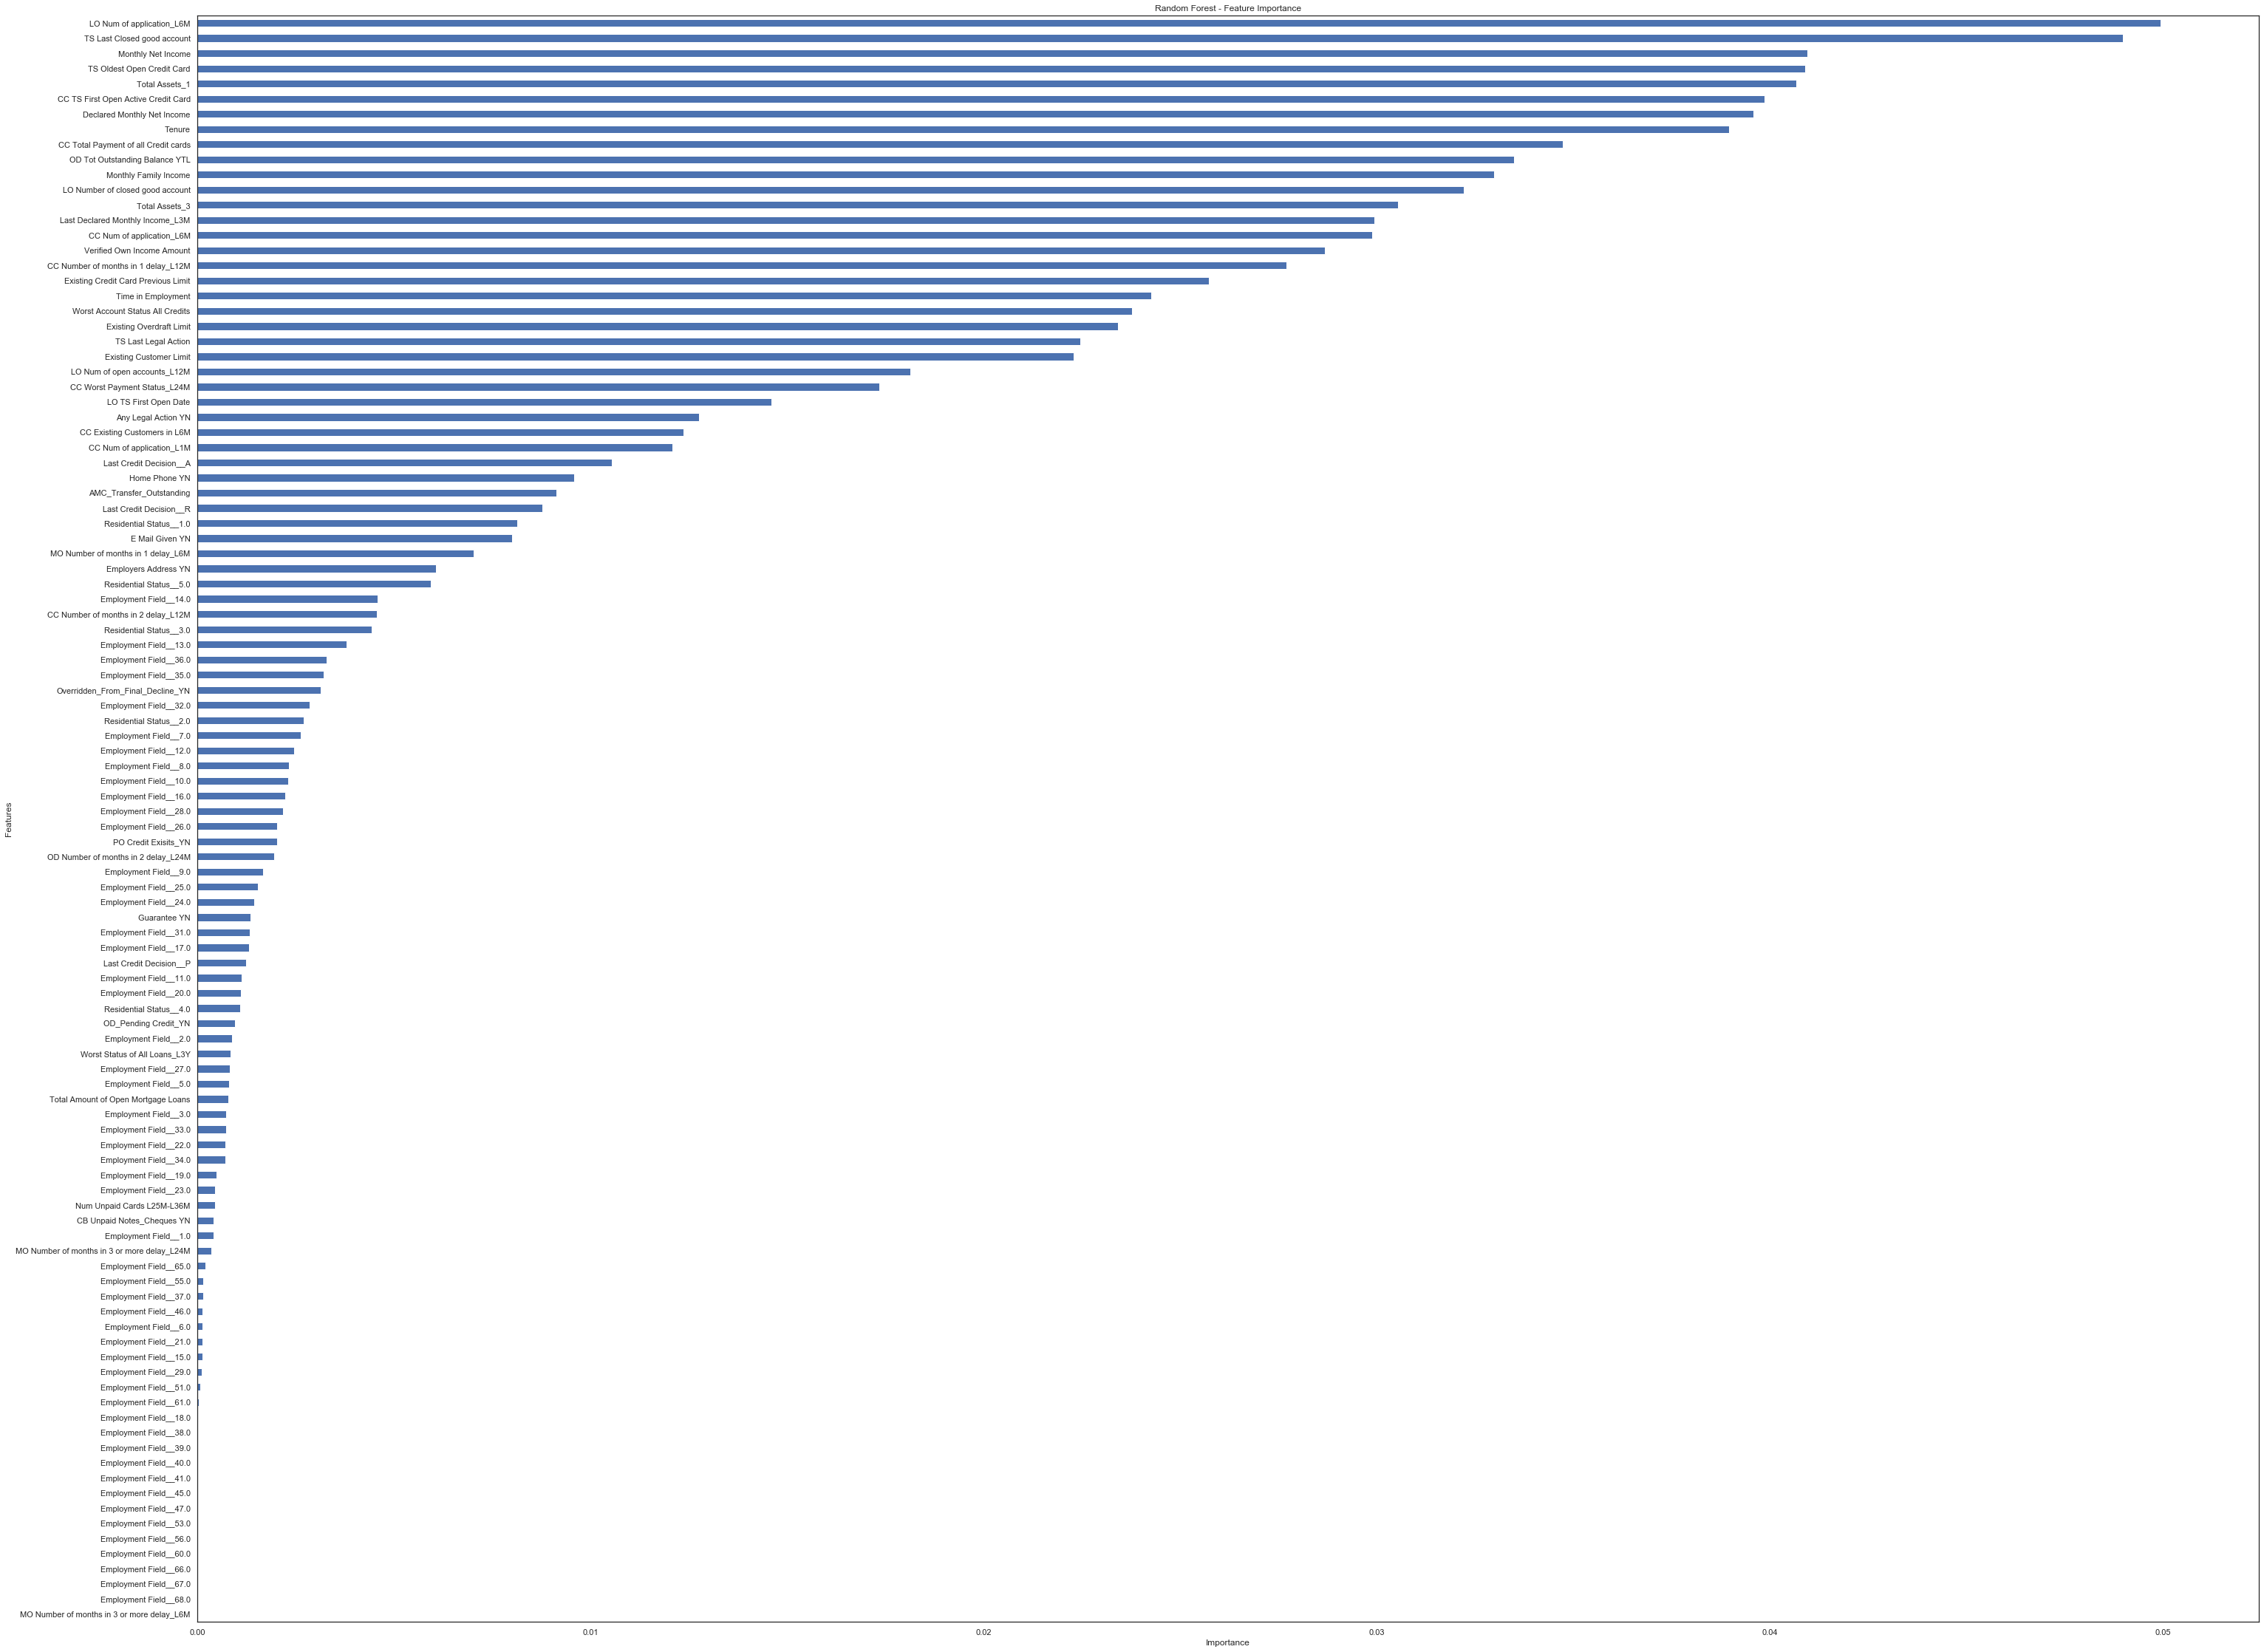

In [1085]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1086]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                                         col
38  0.000  MO Number of months in 3 or more delay_L6M
105 0.000                      Employment Field__68.0
104 0.000                      Employment Field__67.0
103 0.000                      Employment Field__66.0
100 0.000                      Employment Field__60.0
99  0.000                      Employment Field__56.0
97  0.000                      Employment Field__53.0
95  0.000                      Employment Field__47.0
93  0.000                      Employment Field__45.0
92  0.000                      Employment Field__41.0
91  0.000                      Employment Field__40.0
90  0.000                      Employment Field__39.0
89  0.000                      Employment Field__38.0
70  0.000                      Employment Field__18.0

In [1087]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
6779                       0.000                                 0   
28311                      0.000                                11   
23075                      0.000                                 1   
33062                      0.250                                 1   
11429                      0.000                                 0   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
6779                     0                                0.000   
28311                    1                                0.000   
23075                    0                                0.000   
33062                    0                                0.000   
11429                    0                                0.150   

       LO Num of application_L6M  TS Last Legal Action  \
6779                       0.049                -1.000   
28311                      0.021                 0.124   
23075                      0.000                -1.000   
33062                      0.042                -1.000   
11429                      0.035                -1.000   

       TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
6779                        0.271                                0.273   
28311                       0.000                                0.000   
23075                       0.015                                0.014   
33062                       0.343                                0.344   
11429                       0.262                                0.204   

       Total Assets_3  TS Last Closed good account  ...  \
6779            0.000                        0.117  ...   
28311           0.000                        0.550  ...   
23075           0.000                       -1.000  ...   
33062           0.000                        0.033  ...   
11429           0.000                        0.317  ...   

       Employment Field__33.0  Employment Field__34.0  Employment Field__35.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__36.0  Employment Field__37.0  Employment Field__46.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       1                       0                       0   
33062                       1                       0                       0   
11429                       0                       0                       0   

       Employment Field__51.0  Employment Field__55.0  Employment Field__61.0  \
6779                        0                       0                       0   
28311                       0                       0                       0   
23075                       0                       0                       0   
33062                       0                       0                       0   
11429                       0                       0                       0   

       Employment Field__65.0  
6779                        0  
28311                       0  
23075                       0  
33062                       0  
11429                       0  

[5 rows x 92 columns]

In [1088]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [1089]:
train_data = lgb.Dataset(X_train_under, label=y_train_under, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test_under, label=y_test_under)

In [1092]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.657251
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.69483
[3]	valid_0's auc: 0.701935
[4]	valid_0's auc: 0.700192
[5]	valid_0's auc: 0.705018
[6]	valid_0's auc: 0.707875
[7]	valid_0's auc: 0.704038
[8]	valid_0's auc: 0.708309
[9]	valid_0's auc: 0.715011
[10]	valid_0's auc: 0.718547
[11]	valid_0's auc: 0.720082
[12]	valid_0's auc: 0.727616
[13]	valid_0's auc: 0.729354
[14]	valid_0's auc: 0.729401
[15]	valid_0's auc: 0.732941
[16]	valid_0's auc: 0.732322
[17]	valid_0's auc: 0.734208
[18]	valid_0's auc: 0.733718
[19]	valid_0's auc: 0.734818
[20]	valid_0's auc: 0.736861
[21]	valid_0's auc: 0.736473
[22]	valid_0's auc: 0.735937
[23]	valid_0's auc: 0.735632
[24]	valid_0's auc: 0.738497
[25]	valid_0's auc: 0.73883
[26]	valid_0's auc: 0.740633
[27]	valid_0's auc: 0.741779
[28]	valid_0's auc: 0.74043
[29]	valid_0's auc: 0.741169
[30]	valid_0's auc: 0.742445
[31]	valid_0's auc: 0.744275
[32]	valid_0's auc: 0.743702
[33]	valid_0's auc: 0

[295]	valid_0's auc: 0.747428
[296]	valid_0's auc: 0.747742
[297]	valid_0's auc: 0.747834
[298]	valid_0's auc: 0.747659
[299]	valid_0's auc: 0.747529
[300]	valid_0's auc: 0.747252
[301]	valid_0's auc: 0.746984
[302]	valid_0's auc: 0.746337
[303]	valid_0's auc: 0.74605
[304]	valid_0's auc: 0.745727
[305]	valid_0's auc: 0.745468
[306]	valid_0's auc: 0.745283
[307]	valid_0's auc: 0.745431
[308]	valid_0's auc: 0.745052
[309]	valid_0's auc: 0.744848
[310]	valid_0's auc: 0.744848
[311]	valid_0's auc: 0.745227
[312]	valid_0's auc: 0.744922
[313]	valid_0's auc: 0.74495
[314]	valid_0's auc: 0.74495
[315]	valid_0's auc: 0.745052
[316]	valid_0's auc: 0.74508
[317]	valid_0's auc: 0.74557
Early stopping, best iteration is:
[117]	valid_0's auc: 0.756996


In [1093]:
model.best_iteration

117

In [1094]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [1095]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [1096]:
from scipy.misc import derivative

In [1097]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7509   |  0.8722   |  20.37    |  0.7385   |  0.0517   |  370.5    |  7.822    |  61.96    |  50.21    |
|  2        |  0.7604   |  0.8042   |  20.77    |  0.7931   |  0.04196  |  348.9    |  7.081    |  68.71    |  58.32    |
|  3        |  0.7589   |  0.7894   |  22.48    |  0.7187   |  0.06721  |  378.2    |  7.941    |  61.66    |  54.37    |
|  4        |  0.7526   |  0.7111   |  20.68    |  0.7193   |  0.05479  |  327.1    |  7.586    |  64.35    |  59.65    |
|  5        |  0.7562   |  0.8815   |  22.96    |  0.7345   |  0.04646  |  335.6    |  7.023    |  69.68    |  57.69    |
|  6        |  0.7582   |  0.8014   |  20.75    |  0.7476   |  0.06554  |  399.2    |  7.663    |  69.99    |  59.97    |
|  7        |  0.7673   

In [1098]:
bo.max['params']

{'bagging_fraction': 0.810484870051303,
 'bagging_freq': 24.889796262501118,
 'feature_fraction': 0.7459659439382372,
 'learning_rate': 0.05936559669191055,
 'max_bin': 363.2004699394512,
 'max_depth': 7.014437914457603,
 'min_child_samples': 61.07167295125967,
 'num_leaves': 59.93092689127362}

In [1099]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 61,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.81,
    'bagging_freq': 25,
    'learning_rate': 0.06,
    'verbose': 0,
    'max_depth': 7,
    'max_bin' : 363,
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.671677
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.691072
[3]	valid_0's auc: 0.703359
[4]	valid_0's auc: 0.708531
[5]	valid_0's auc: 0.712918
[6]	valid_0's auc: 0.709021
[7]	valid_0's auc: 0.708078
[8]	valid_0's auc: 0.709645
[9]	valid_0's auc: 0.717193
[10]	valid_0's auc: 0.72102
[11]	valid_0's auc: 0.720262
[12]	valid_0's auc: 0.72494
[13]	valid_0's auc: 0.727949
[14]	valid_0's auc: 0.728633
[15]	valid_0's auc: 0.730149
[16]	valid_0's auc: 0.729586
[17]	valid_0's auc: 0.730639
[18]	valid_0's auc: 0.732766
[19]	valid_0's auc: 0.734328
[20]	valid_0's auc: 0.736565
[21]	valid_0's auc: 0.737009
[22]	valid_0's auc: 0.736131
[23]	valid_0's auc: 0.738636
[24]	valid_0's auc: 0.737665
[25]	valid_0's auc: 0.741308
[26]	valid_0's auc: 0.741946
[27]	valid_0's auc: 0.742861
[28]	valid_0's auc: 0.743628
[29]	valid_0's auc: 0.743637
[30]	valid_0's auc: 0.743915
[31]	valid_0's auc: 0.743369
[32]	valid_0's auc: 0.743083
[33]	valid_0's auc: 

[325]	valid_0's auc: 0.744044
[326]	valid_0's auc: 0.743674
[327]	valid_0's auc: 0.743859
[328]	valid_0's auc: 0.743915
[329]	valid_0's auc: 0.743739
[330]	valid_0's auc: 0.743545
[331]	valid_0's auc: 0.743979
[332]	valid_0's auc: 0.743647
[333]	valid_0's auc: 0.743619
[334]	valid_0's auc: 0.743785
[335]	valid_0's auc: 0.743573
[336]	valid_0's auc: 0.743342
[337]	valid_0's auc: 0.743092
[338]	valid_0's auc: 0.743841
[339]	valid_0's auc: 0.743258
[340]	valid_0's auc: 0.743869
[341]	valid_0's auc: 0.74397
[342]	valid_0's auc: 0.744321
[343]	valid_0's auc: 0.744192
[344]	valid_0's auc: 0.74458
[345]	valid_0's auc: 0.744654
[346]	valid_0's auc: 0.743905
[347]	valid_0's auc: 0.744497
[348]	valid_0's auc: 0.744248
[349]	valid_0's auc: 0.743924
[350]	valid_0's auc: 0.744719
[351]	valid_0's auc: 0.745024
[352]	valid_0's auc: 0.745468
[353]	valid_0's auc: 0.746143
[354]	valid_0's auc: 0.745995
[355]	valid_0's auc: 0.745348
[356]	valid_0's auc: 0.745486
[357]	valid_0's auc: 0.745514
[358]	valid_

In [1119]:
Y_pred=model.predict(X_test_under, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i]>=.55:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

              precision    recall  f1-score   support

           0        0.7       0.7       0.7       357
           1        0.7       0.7       0.7       303

    accuracy                            0.7       660
   macro avg        0.7       0.7       0.7       660
weighted avg        0.7       0.7       0.7       660


 ------------------------------------

ROC-AUC Score is ..: 0.6924730288154866
Log Loss Score is ..: 10.623423581642712


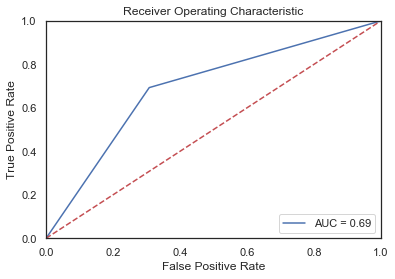

In [1120]:
target_names = ['0','1']
print(classification_report(y_test_under, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_under, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test_under, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_under, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1121]:
cm = confusion_matrix(y_test_under, Y_pred)
cm

array([[247, 110],
       [ 93, 210]], dtype=int64)

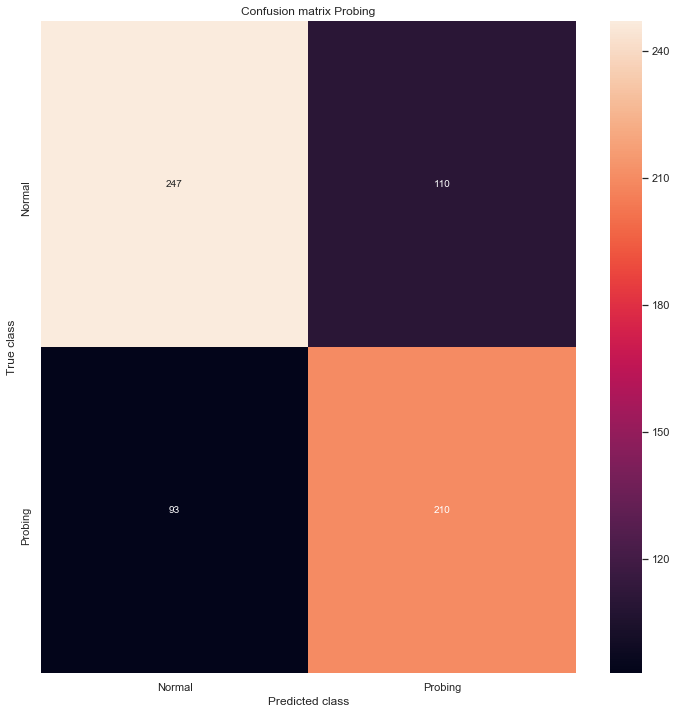

In [1122]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

              precision    recall  f1-score   support

           0        0.7       0.6       0.6       357
           1        0.6       0.7       0.6       303

    accuracy                            0.6       660
   macro avg        0.6       0.6       0.6       660
weighted avg        0.6       0.6       0.6       660


 ------------------------------------

ROC-AUC Score is ..: 0.6429542113875253
Log Loss Score is ..: 12.45506534003221


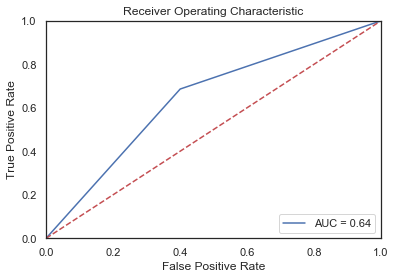

0.6393939393939394


array([[214,  95],
       [143, 208]], dtype=int64)

In [1127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_under,y_train_under)
ylr_under_pred = lr.predict(X_test_under)

target_names = ['0','1']
print(classification_report(y_test_under, ylr_under_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_under, ylr_under_pred))
print("Log Loss Score is ..:",log_loss(y_test_under, ylr_under_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_under, ylr_under_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acuuracy_score = accuracy_score(ylr_under_pred,y_test_under)
print(acuuracy_score) 
cm = confusion_matrix(ylr_under_pred,y_test_under)
cm

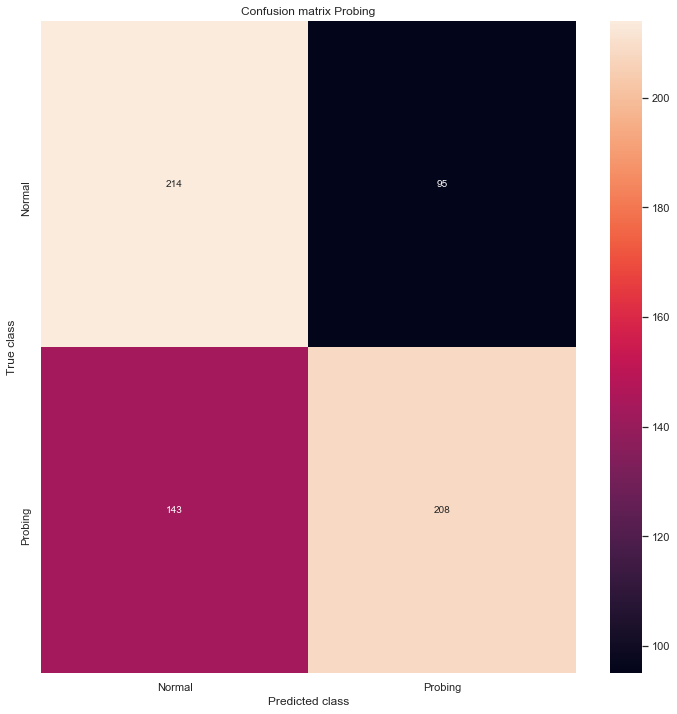

In [1128]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

OVER SAMPLING

Random over-sampling:
1    32935
0    32935
Name: Good_Bad_Flag, dtype: int64


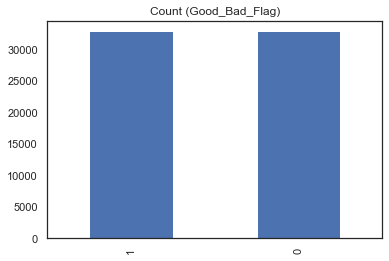

In [1130]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Good_Bad_Flag.value_counts())

df_test_over.Good_Bad_Flag.value_counts().plot(kind='bar', title='Count (Good_Bad_Flag)');

In [1131]:
y = df_test_over['Good_Bad_Flag']
X = df_test_over.drop('Good_Bad_Flag', axis = 1)

In [1133]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
0                                    0                                11   
1                                    0                                 1   
2                                    0                                 0   
4                                    0                                 1   
5                                    1                                 1   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
0                              1                             1750.000   
1                              0                             1300.000   
2                              0                                0.000   
4                              0                             6250.000   
5                              0                                0.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
0                                    1                36.000   
1                                   12                   nan   
2                                    0                   nan   
4                                    0                   nan   
5                                    3                   nan   

Description  TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                                    86                                 2606   
1                                    13                                  406   
2                                   274                                 8337   
4                                   126                                 3833   
5                                   139                                 4231   

Description Last Credit Decision  Total Assets_3  ...  LO TS First Open Date  \
0                              A         888.000  ...                  5.000   
1                              R          20.000  ...                 15.000   
2                              A         511.000  ...                    nan   
4                              A          32.000  ...                    nan   
5                              A          35.000  ...                  7.000   

Description  MO Number of months in 1 delay_L6M  \
0                                           nan   
1                                           nan   
2                                           nan   
4                                         0.000   
5                                           nan   

Description  MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
0                                                   nan                1   
1                                                   nan                1   
2                                                   nan                1   
4                                                   nan                1   
5                                                   nan                1   

Description  OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
0                               0                                  nan   
1                               0                                  nan   
2                               0                                  nan   
4                               0                                  nan   
5                               0                                  nan   

Description  Num Unpaid Cards L25M-L36M  Guarantee YN  \
0                                     0             0   
1                                     0             0   
2                                     0             0   
4                                     0             0   
5                                     0             0   

Description  Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
0                                           0                             1  
1                                           0    

In [1134]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                    1   
1                                           1                    0   
2                                           0                    0   
3                                          11                    1   
4                                           1                    0   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                          1                     0   
1                          1                     0   
2                          1                     0   
3                          0                     0   
4                          1                     0   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

Description  CC Existing Customers i

In [1135]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  Last Credit Decision__R  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
4                        1                        0                        0   
5                        1                        0                        0   

   Residential Status__1.0  Residential Status__2.0  Residential Status__3.0  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
4                        0                        0                        0   
5                        1                        0                        0   

   Residential Status__4.0  Residential Status__5.0  Employment Field__1.0  \
0                        0                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
4                        0                        0                      0   
5                        0                        0                      0   

   Employment Field__2.0  ...  Employment Field__56.0  Employment Field__58.0  \
0                      0  ...                       0                       0   
1                      0  ...                       0                       0   
2                      0  ...                       0                       0   
4                      0  ...                       0                       0   
5                      0  ...                       0                       0   

   Employment Field__59.0  Employment Field__60.0  Employment Field__61.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__62.0  Employment Field__65.0  Employment Field__66.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__67.0  Employment Field__68.0  
0                       0                       0  
1                       0                       0  
2                       0                       0  
4                       0                       0  
5                       0                       0  

[5 rows x 71 columns]

In [1136]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                          0                                11   
1                          0                                 1   
2                          0                                 0   
4                          0                                 1   
5                          1                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                             1750.000   
1                    0                             1300.000   
2                    0                                0.000   
4                    0                             6250.000   
5                    0                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                          1                36.000   
1                         12                   nan   
2                          0                   nan   
4                          0                   nan   
5                          3                   nan   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                          86                                 2606   
1                          13                                  406   
2                         274                                 8337   
4                         126                                 3833   
5                         139                                 4231   

  Last Credit Decision  Total Assets_3  ...  Employment Field__56.0  \
0                    A         888.000  ...                       0   
1                    R          20.000  ...                       0   
2                    A         511.000  ...                       0   
4                    A          32.000  ...                       0   
5                    A          35.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 120 columns]

In [1137]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
#numeric_columns.remove('Good_Bad_Flag')

scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
4                    0                                0.078   
5                    0                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                   nan   
2                      0.000                   nan   
4                      0.000                   nan   
5                      0.013                   nan   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                0.245   
1                       0.037                                0.038   
2                       0.783                                0.782   
4                       0.360                                0.360   
5                       0.397                                0.397   

  Last Credit Decision  Total Assets_3  ...  Employment Field__56.0  \
0                    A           0.000  ...                       0   
1                    R           0.000  ...                       0   
2                    A           0.000  ...                       0   
4                    A           0.000  ...                       0   
5                    A           0.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 120 columns]

In [1138]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [1139]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(65870, 117)

In [1140]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
4                    0                                0.078   
5                    0                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
4                      0.000                -1.000   
5                      0.013                -1.000   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                0.245   
1                       0.037                                0.038   
2                       0.783                                0.782   
4                       0.360                                0.360   
5                       0.397                                0.397   

   Total Assets_3  TS Last Closed good account  ...  Employment Field__56.0  \
0           0.000                        0.066  ...                       0   
1           0.000                        0.066  ...                       0   
2           0.000                        0.000  ...                       0   
4           0.000                        0.131  ...                       0   
5           0.000                        0.016  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 117 columns]

In [1141]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [1142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50719, 117), (15151, 117), (50719,), (15151,))

In [1144]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

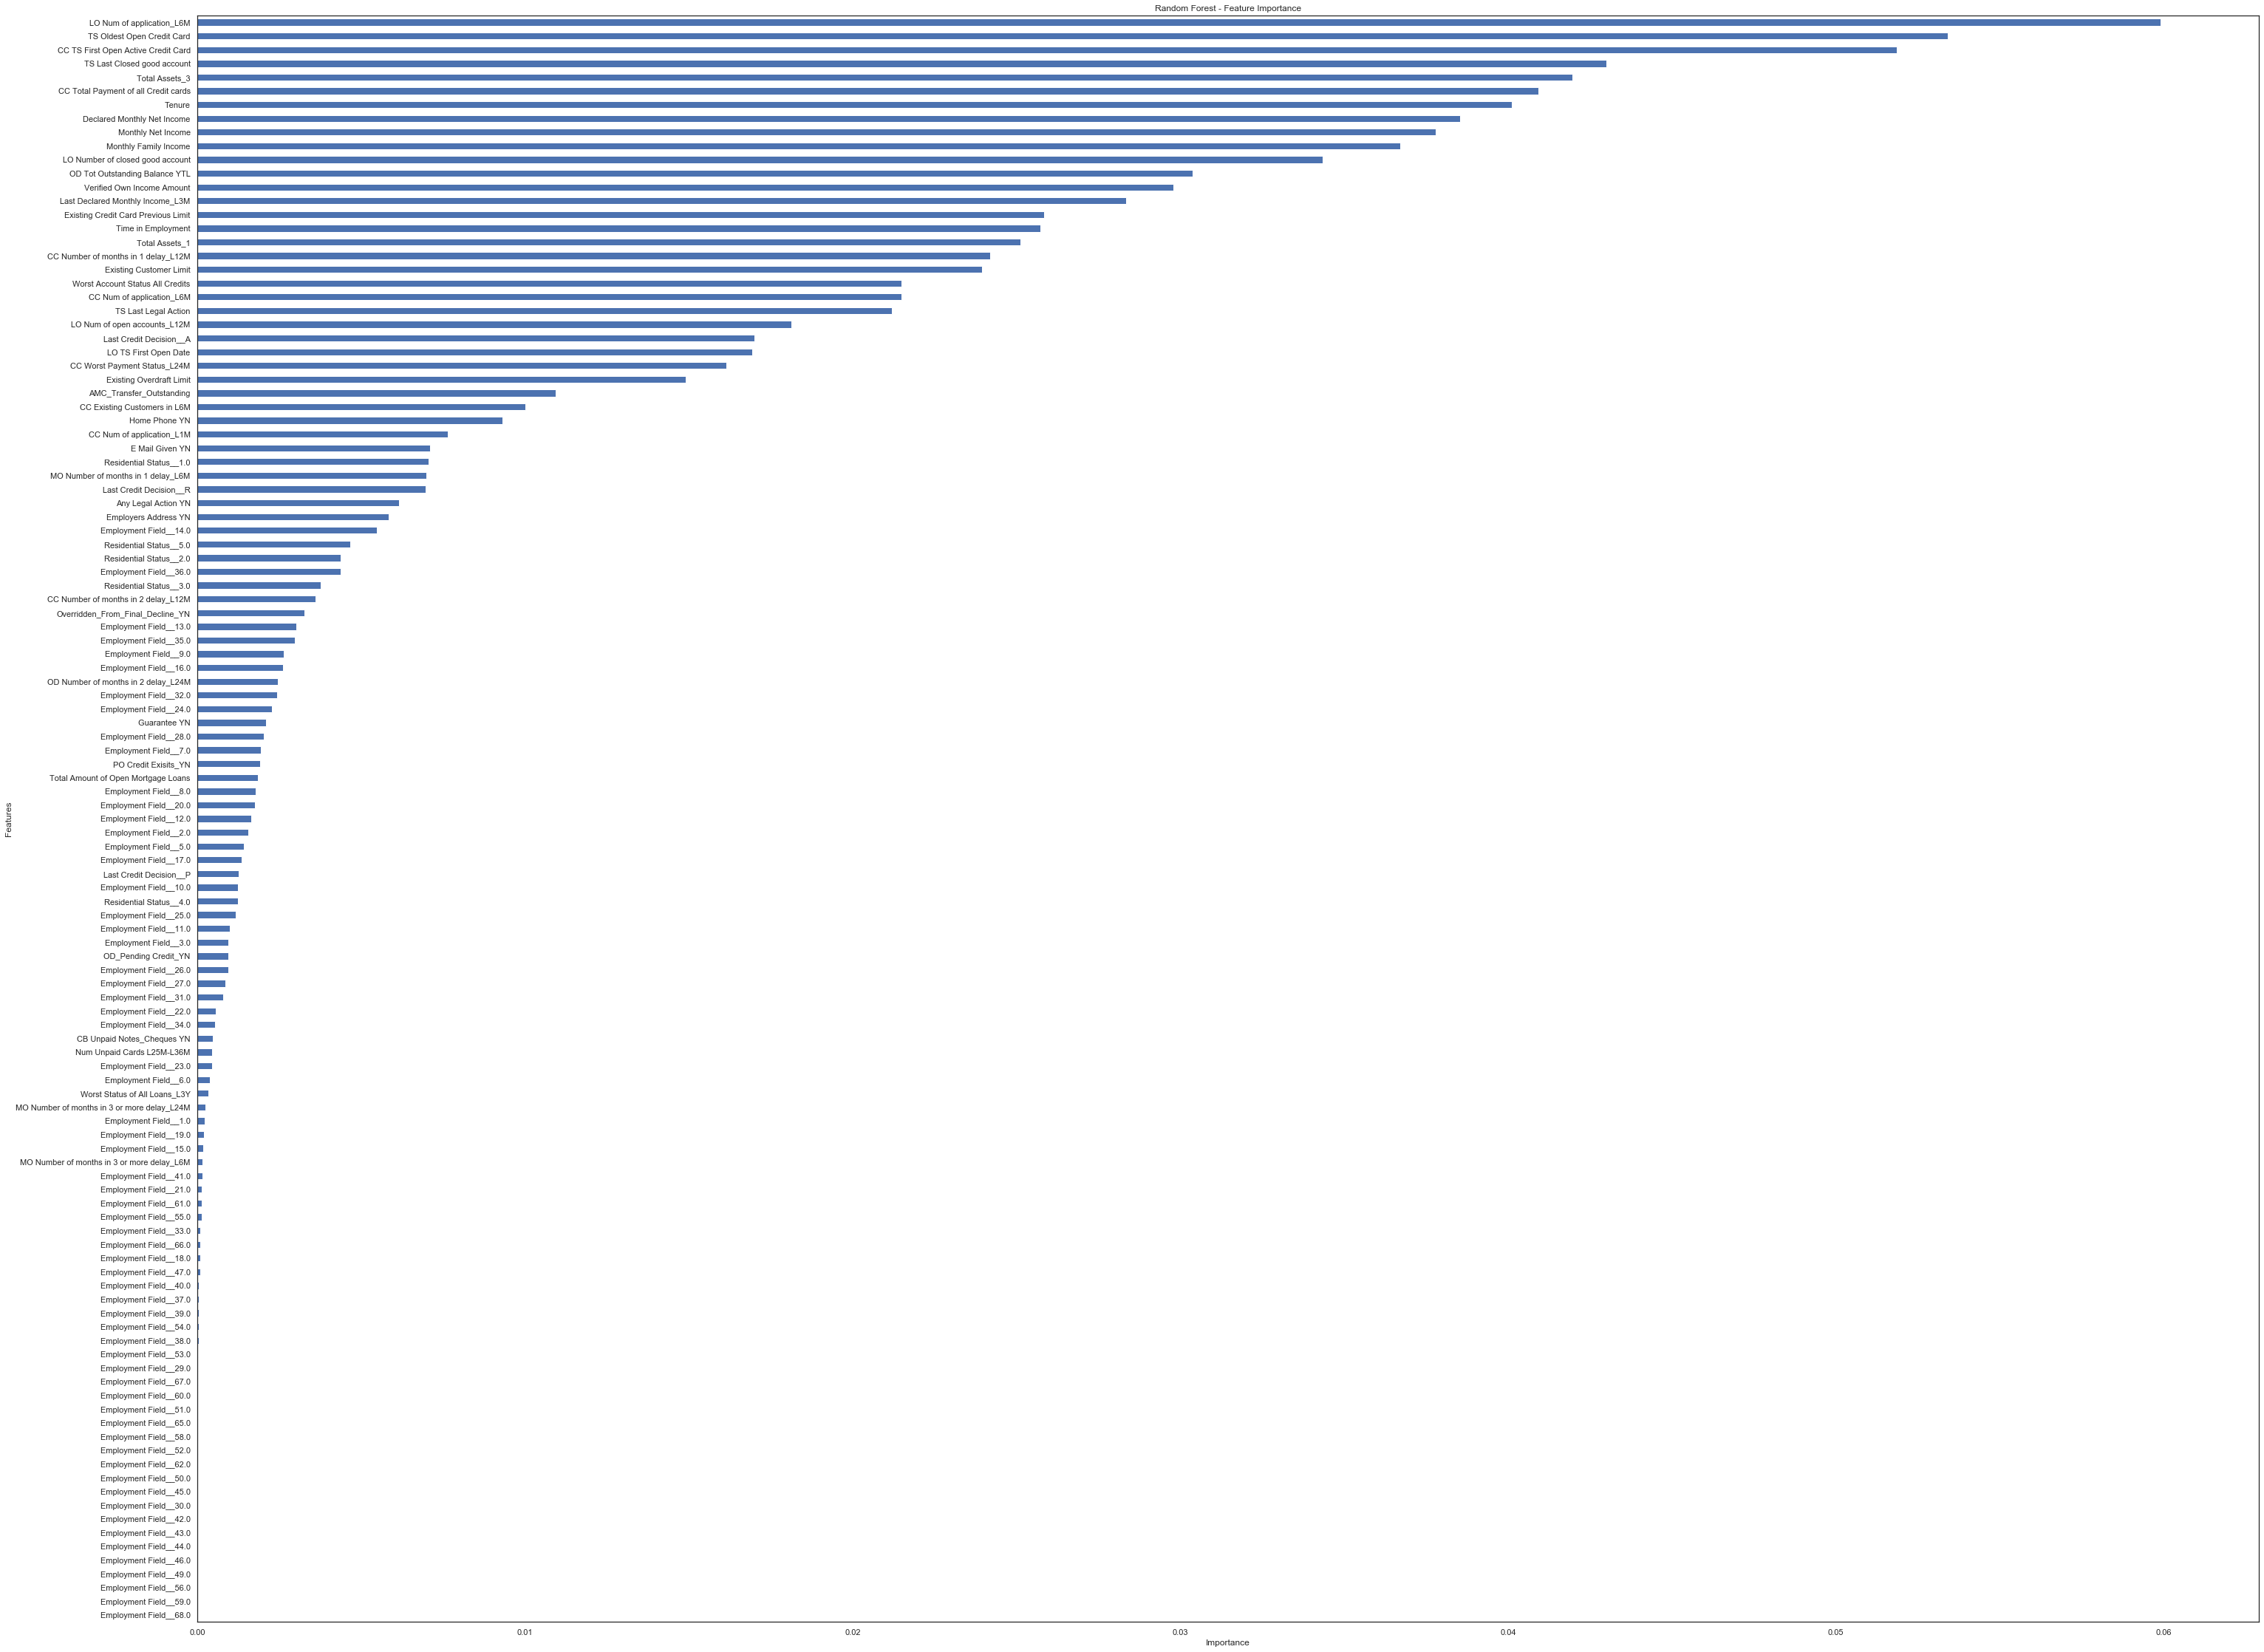

In [1145]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1146]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                     col
116 0.000  Employment Field__68.0
109 0.000  Employment Field__59.0
107 0.000  Employment Field__56.0
100 0.000  Employment Field__49.0
98  0.000  Employment Field__46.0
96  0.000  Employment Field__44.0
95  0.000  Employment Field__43.0
94  0.000  Employment Field__42.0
82  0.000  Employment Field__30.0
97  0.000  Employment Field__45.0
101 0.000  Employment Field__50.0
112 0.000  Employment Field__62.0
103 0.000  Employment Field__52.0
108 0.000  Employment Field__58.0
113 0.000  Employment Field__65.0

In [1147]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                    1                                0.022   
1                    0                                0.016   
2                    0                                0.000   
4                    0                                0.078   
5                    0                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
4                      0.000                -1.000   
5                      0.013                -1.000   

   TS Oldest Open Credit Card  CC TS First Open Active Credit Card  \
0                       0.246                                0.245   
1                       0.037                                0.038   
2                       0.783                                0.782   
4                       0.360                                0.360   
5                       0.397                                0.397   

   Total Assets_3  TS Last Closed good account  ...  Employment Field__41.0  \
0           0.000                        0.066  ...                       0   
1           0.000                        0.066  ...                       0   
2           0.000                        0.000  ...                       0   
4           0.000                        0.131  ...                       0   
5           0.000                        0.016  ...                       0   

   Employment Field__47.0  Employment Field__51.0  Employment Field__53.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__54.0  Employment Field__55.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__66.0  Employment Field__67.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 102 columns]

In [1148]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [1149]:
train_data = lgb.Dataset(X_train_over, label=y_train_over, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test_over, label=y_test_over)

In [1150]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.735608
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.78215
[3]	valid_0's auc: 0.796651
[4]	valid_0's auc: 0.800255
[5]	valid_0's auc: 0.807576
[6]	valid_0's auc: 0.814031
[7]	valid_0's auc: 0.819164
[8]	valid_0's auc: 0.82451
[9]	valid_0's auc: 0.829164
[10]	valid_0's auc: 0.833127
[11]	valid_0's auc: 0.834993
[12]	valid_0's auc: 0.834881
[13]	valid_0's auc: 0.837151
[14]	valid_0's auc: 0.838658
[15]	valid_0's auc: 0.841534
[16]	valid_0's auc: 0.841816
[17]	valid_0's auc: 0.842899
[18]	valid_0's auc: 0.843309
[19]	valid_0's auc: 0.844591
[20]	valid_0's auc: 0.845382
[21]	valid_0's auc: 0.847527
[22]	valid_0's auc: 0.848739
[23]	valid_0's auc: 0.850079
[24]	valid_0's auc: 0.85086
[25]	valid_0's auc: 0.851605
[26]	valid_0's auc: 0.852865
[27]	valid_0's auc: 0.853979
[28]	valid_0's auc: 0.855083
[29]	valid_0's auc: 0.855541
[30]	valid_0's auc: 0.857093
[31]	valid_0's auc: 0.857853
[32]	valid_0's auc: 0.858721
[33]	valid_0's auc: 0

[293]	valid_0's auc: 0.959201
[294]	valid_0's auc: 0.959531
[295]	valid_0's auc: 0.959577
[296]	valid_0's auc: 0.959777
[297]	valid_0's auc: 0.959796
[298]	valid_0's auc: 0.959999
[299]	valid_0's auc: 0.960095
[300]	valid_0's auc: 0.9602
[301]	valid_0's auc: 0.960313
[302]	valid_0's auc: 0.960406
[303]	valid_0's auc: 0.960583
[304]	valid_0's auc: 0.960702
[305]	valid_0's auc: 0.960797
[306]	valid_0's auc: 0.960882
[307]	valid_0's auc: 0.960986
[308]	valid_0's auc: 0.961104
[309]	valid_0's auc: 0.961148
[310]	valid_0's auc: 0.961277
[311]	valid_0's auc: 0.961478
[312]	valid_0's auc: 0.96156
[313]	valid_0's auc: 0.961776
[314]	valid_0's auc: 0.961812
[315]	valid_0's auc: 0.96193
[316]	valid_0's auc: 0.962079
[317]	valid_0's auc: 0.962114
[318]	valid_0's auc: 0.962436
[319]	valid_0's auc: 0.962627
[320]	valid_0's auc: 0.962737
[321]	valid_0's auc: 0.96298
[322]	valid_0's auc: 0.963081
[323]	valid_0's auc: 0.963074
[324]	valid_0's auc: 0.963141
[325]	valid_0's auc: 0.963191
[326]	valid_0's

[582]	valid_0's auc: 0.984265
[583]	valid_0's auc: 0.984435
[584]	valid_0's auc: 0.984483
[585]	valid_0's auc: 0.984532
[586]	valid_0's auc: 0.984671
[587]	valid_0's auc: 0.984723
[588]	valid_0's auc: 0.984771
[589]	valid_0's auc: 0.984783
[590]	valid_0's auc: 0.984784
[591]	valid_0's auc: 0.984842
[592]	valid_0's auc: 0.98495
[593]	valid_0's auc: 0.985022
[594]	valid_0's auc: 0.985067
[595]	valid_0's auc: 0.985137
[596]	valid_0's auc: 0.985233
[597]	valid_0's auc: 0.985252
[598]	valid_0's auc: 0.985291
[599]	valid_0's auc: 0.985318
[600]	valid_0's auc: 0.985376
[601]	valid_0's auc: 0.985449
[602]	valid_0's auc: 0.985501
[603]	valid_0's auc: 0.985511
[604]	valid_0's auc: 0.985541
[605]	valid_0's auc: 0.985632
[606]	valid_0's auc: 0.985641
[607]	valid_0's auc: 0.985649
[608]	valid_0's auc: 0.985733
[609]	valid_0's auc: 0.985786
[610]	valid_0's auc: 0.985852
[611]	valid_0's auc: 0.985875
[612]	valid_0's auc: 0.985928
[613]	valid_0's auc: 0.985975
[614]	valid_0's auc: 0.985978
[615]	valid

[866]	valid_0's auc: 0.993785
[867]	valid_0's auc: 0.993815
[868]	valid_0's auc: 0.993821
[869]	valid_0's auc: 0.993834
[870]	valid_0's auc: 0.993854
[871]	valid_0's auc: 0.993874
[872]	valid_0's auc: 0.993889
[873]	valid_0's auc: 0.99392
[874]	valid_0's auc: 0.993935
[875]	valid_0's auc: 0.993959
[876]	valid_0's auc: 0.993966
[877]	valid_0's auc: 0.994007
[878]	valid_0's auc: 0.994044
[879]	valid_0's auc: 0.994073
[880]	valid_0's auc: 0.994089
[881]	valid_0's auc: 0.994097
[882]	valid_0's auc: 0.994103
[883]	valid_0's auc: 0.994112
[884]	valid_0's auc: 0.994185
[885]	valid_0's auc: 0.994199
[886]	valid_0's auc: 0.99421
[887]	valid_0's auc: 0.994225
[888]	valid_0's auc: 0.994245
[889]	valid_0's auc: 0.994264
[890]	valid_0's auc: 0.994274
[891]	valid_0's auc: 0.994277
[892]	valid_0's auc: 0.994288
[893]	valid_0's auc: 0.99431
[894]	valid_0's auc: 0.99433
[895]	valid_0's auc: 0.994343
[896]	valid_0's auc: 0.994346
[897]	valid_0's auc: 0.99435
[898]	valid_0's auc: 0.994361
[899]	valid_0's

[1136]	valid_0's auc: 0.997041
[1137]	valid_0's auc: 0.997044
[1138]	valid_0's auc: 0.997041
[1139]	valid_0's auc: 0.997058
[1140]	valid_0's auc: 0.997086
[1141]	valid_0's auc: 0.997102
[1142]	valid_0's auc: 0.997102
[1143]	valid_0's auc: 0.997105
[1144]	valid_0's auc: 0.997107
[1145]	valid_0's auc: 0.997115
[1146]	valid_0's auc: 0.997129
[1147]	valid_0's auc: 0.997134
[1148]	valid_0's auc: 0.997151
[1149]	valid_0's auc: 0.997179
[1150]	valid_0's auc: 0.997188
[1151]	valid_0's auc: 0.997191
[1152]	valid_0's auc: 0.997192
[1153]	valid_0's auc: 0.997191
[1154]	valid_0's auc: 0.997199
[1155]	valid_0's auc: 0.997222
[1156]	valid_0's auc: 0.997221
[1157]	valid_0's auc: 0.997249
[1158]	valid_0's auc: 0.997254
[1159]	valid_0's auc: 0.997278
[1160]	valid_0's auc: 0.997278
[1161]	valid_0's auc: 0.997278
[1162]	valid_0's auc: 0.997281
[1163]	valid_0's auc: 0.99731
[1164]	valid_0's auc: 0.997312
[1165]	valid_0's auc: 0.997319
[1166]	valid_0's auc: 0.997318
[1167]	valid_0's auc: 0.99733
[1168]	val

[1411]	valid_0's auc: 0.998518
[1412]	valid_0's auc: 0.998525
[1413]	valid_0's auc: 0.998522
[1414]	valid_0's auc: 0.998526
[1415]	valid_0's auc: 0.998532
[1416]	valid_0's auc: 0.998536
[1417]	valid_0's auc: 0.998535
[1418]	valid_0's auc: 0.998538
[1419]	valid_0's auc: 0.99854
[1420]	valid_0's auc: 0.998547
[1421]	valid_0's auc: 0.998544
[1422]	valid_0's auc: 0.998552
[1423]	valid_0's auc: 0.99856
[1424]	valid_0's auc: 0.998559
[1425]	valid_0's auc: 0.998563
[1426]	valid_0's auc: 0.998561
[1427]	valid_0's auc: 0.998563
[1428]	valid_0's auc: 0.998562
[1429]	valid_0's auc: 0.998565
[1430]	valid_0's auc: 0.998569
[1431]	valid_0's auc: 0.99857
[1432]	valid_0's auc: 0.998572
[1433]	valid_0's auc: 0.998582
[1434]	valid_0's auc: 0.998584
[1435]	valid_0's auc: 0.998585
[1436]	valid_0's auc: 0.998588
[1437]	valid_0's auc: 0.998591
[1438]	valid_0's auc: 0.998597
[1439]	valid_0's auc: 0.998597
[1440]	valid_0's auc: 0.998595
[1441]	valid_0's auc: 0.998594
[1442]	valid_0's auc: 0.998598
[1443]	vali

[1685]	valid_0's auc: 0.999138
[1686]	valid_0's auc: 0.999142
[1687]	valid_0's auc: 0.999139
[1688]	valid_0's auc: 0.999138
[1689]	valid_0's auc: 0.999135
[1690]	valid_0's auc: 0.999135
[1691]	valid_0's auc: 0.999138
[1692]	valid_0's auc: 0.999137
[1693]	valid_0's auc: 0.999143
[1694]	valid_0's auc: 0.999144
[1695]	valid_0's auc: 0.999144
[1696]	valid_0's auc: 0.999142
[1697]	valid_0's auc: 0.999141
[1698]	valid_0's auc: 0.999147
[1699]	valid_0's auc: 0.999154
[1700]	valid_0's auc: 0.999153
[1701]	valid_0's auc: 0.999153
[1702]	valid_0's auc: 0.99916
[1703]	valid_0's auc: 0.999161
[1704]	valid_0's auc: 0.999171
[1705]	valid_0's auc: 0.999177
[1706]	valid_0's auc: 0.999184
[1707]	valid_0's auc: 0.999191
[1708]	valid_0's auc: 0.999191
[1709]	valid_0's auc: 0.999194
[1710]	valid_0's auc: 0.999196
[1711]	valid_0's auc: 0.999199
[1712]	valid_0's auc: 0.999203
[1713]	valid_0's auc: 0.99921
[1714]	valid_0's auc: 0.999211
[1715]	valid_0's auc: 0.999212
[1716]	valid_0's auc: 0.999218
[1717]	val

[1959]	valid_0's auc: 0.99945
[1960]	valid_0's auc: 0.999452
[1961]	valid_0's auc: 0.999453
[1962]	valid_0's auc: 0.99945
[1963]	valid_0's auc: 0.999452
[1964]	valid_0's auc: 0.999452
[1965]	valid_0's auc: 0.999457
[1966]	valid_0's auc: 0.999455
[1967]	valid_0's auc: 0.999453
[1968]	valid_0's auc: 0.999452
[1969]	valid_0's auc: 0.999453
[1970]	valid_0's auc: 0.999452
[1971]	valid_0's auc: 0.999454
[1972]	valid_0's auc: 0.999454
[1973]	valid_0's auc: 0.999456
[1974]	valid_0's auc: 0.999457
[1975]	valid_0's auc: 0.999458
[1976]	valid_0's auc: 0.999456
[1977]	valid_0's auc: 0.999456
[1978]	valid_0's auc: 0.999457
[1979]	valid_0's auc: 0.999458
[1980]	valid_0's auc: 0.999461
[1981]	valid_0's auc: 0.999462
[1982]	valid_0's auc: 0.999465
[1983]	valid_0's auc: 0.99947
[1984]	valid_0's auc: 0.999472
[1985]	valid_0's auc: 0.999473
[1986]	valid_0's auc: 0.999475
[1987]	valid_0's auc: 0.999476
[1988]	valid_0's auc: 0.999477
[1989]	valid_0's auc: 0.999477
[1990]	valid_0's auc: 0.99948
[1991]	valid

In [1151]:
model.best_iteration

1996

In [1152]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [1153]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [1154]:
from scipy.misc import derivative

In [1155]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9977   |  0.8656   |  20.18    |  0.7673   |  0.04016  |  343.3    |  7.165    |  63.73    |  53.86    |
|  2        |  0.9995   |  0.8696   |  22.16    |  0.7497   |  0.0612   |  394.9    |  7.879    |  60.74    |  56.97    |
|  3        |  0.9994   |  0.7247   |  21.23    |  0.7691   |  0.05764  |  351.4    |  7.58     |  60.37    |  55.53    |
|  4        |  0.9996   |  0.898    |  23.44    |  0.7642   |  0.06972  |  363.1    |  7.669    |  65.12    |  58.64    |
|  5        |  0.9984   |  0.8156   |  23.09    |  0.7131   |  0.04707  |  378.1    |  7.269    |  69.41    |  58.25    |
|  6        |  0.9988   |  0.7351   |  21.63    |  0.7455   |  0.04983  |  399.9    |  7.847    |  60.29    |  50.29    |
|  7        |  0.9994   

In [1156]:
bo.max['params']

{'bagging_fraction': 0.7151626064532185,
 'bagging_freq': 24.912542609018185,
 'feature_fraction': 0.7076788299696392,
 'learning_rate': 0.0664745896288513,
 'max_bin': 399.9085374019682,
 'max_depth': 7.321301407807818,
 'min_child_samples': 60.84289708739465,
 'num_leaves': 59.91199680147069}

In [1157]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 61,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.72,
    'bagging_freq': 25,
    'learning_rate': 0.06,
    'verbose': 0,
    'max_depth': 7,
    'max_bin' : 400,
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.763386
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.800076
[3]	valid_0's auc: 0.813206
[4]	valid_0's auc: 0.819992
[5]	valid_0's auc: 0.827789
[6]	valid_0's auc: 0.832185
[7]	valid_0's auc: 0.836016
[8]	valid_0's auc: 0.838575
[9]	valid_0's auc: 0.840774
[10]	valid_0's auc: 0.843459
[11]	valid_0's auc: 0.846304
[12]	valid_0's auc: 0.84639
[13]	valid_0's auc: 0.849796
[14]	valid_0's auc: 0.851727
[15]	valid_0's auc: 0.853356
[16]	valid_0's auc: 0.85456
[17]	valid_0's auc: 0.855526
[18]	valid_0's auc: 0.85823
[19]	valid_0's auc: 0.860471
[20]	valid_0's auc: 0.862499
[21]	valid_0's auc: 0.864358
[22]	valid_0's auc: 0.866044
[23]	valid_0's auc: 0.867267
[24]	valid_0's auc: 0.868868
[25]	valid_0's auc: 0.870351
[26]	valid_0's auc: 0.871981
[27]	valid_0's auc: 0.87327
[28]	valid_0's auc: 0.874247
[29]	valid_0's auc: 0.875093
[30]	valid_0's auc: 0.876203
[31]	valid_0's auc: 0.877166
[32]	valid_0's auc: 0.878189
[33]	valid_0's auc: 0.

[281]	valid_0's auc: 0.977513
[282]	valid_0's auc: 0.977561
[283]	valid_0's auc: 0.977593
[284]	valid_0's auc: 0.977651
[285]	valid_0's auc: 0.977682
[286]	valid_0's auc: 0.977787
[287]	valid_0's auc: 0.977796
[288]	valid_0's auc: 0.977816
[289]	valid_0's auc: 0.97789
[290]	valid_0's auc: 0.978041
[291]	valid_0's auc: 0.978169
[292]	valid_0's auc: 0.978201
[293]	valid_0's auc: 0.978264
[294]	valid_0's auc: 0.978408
[295]	valid_0's auc: 0.978475
[296]	valid_0's auc: 0.978529
[297]	valid_0's auc: 0.978559
[298]	valid_0's auc: 0.978555
[299]	valid_0's auc: 0.978573
[300]	valid_0's auc: 0.978678
[301]	valid_0's auc: 0.978877
[302]	valid_0's auc: 0.979189
[303]	valid_0's auc: 0.979256
[304]	valid_0's auc: 0.97935
[305]	valid_0's auc: 0.979425
[306]	valid_0's auc: 0.979623
[307]	valid_0's auc: 0.97981
[308]	valid_0's auc: 0.979893
[309]	valid_0's auc: 0.980027
[310]	valid_0's auc: 0.980142
[311]	valid_0's auc: 0.980128
[312]	valid_0's auc: 0.980219
[313]	valid_0's auc: 0.980258
[314]	valid_0

[568]	valid_0's auc: 0.995617
[569]	valid_0's auc: 0.995621
[570]	valid_0's auc: 0.995615
[571]	valid_0's auc: 0.995639
[572]	valid_0's auc: 0.995687
[573]	valid_0's auc: 0.995693
[574]	valid_0's auc: 0.995711
[575]	valid_0's auc: 0.995718
[576]	valid_0's auc: 0.995732
[577]	valid_0's auc: 0.995771
[578]	valid_0's auc: 0.995819
[579]	valid_0's auc: 0.995876
[580]	valid_0's auc: 0.995904
[581]	valid_0's auc: 0.99591
[582]	valid_0's auc: 0.995954
[583]	valid_0's auc: 0.996
[584]	valid_0's auc: 0.996016
[585]	valid_0's auc: 0.996046
[586]	valid_0's auc: 0.996061
[587]	valid_0's auc: 0.99606
[588]	valid_0's auc: 0.996078
[589]	valid_0's auc: 0.996137
[590]	valid_0's auc: 0.996154
[591]	valid_0's auc: 0.996171
[592]	valid_0's auc: 0.996187
[593]	valid_0's auc: 0.996206
[594]	valid_0's auc: 0.996247
[595]	valid_0's auc: 0.996256
[596]	valid_0's auc: 0.996279
[597]	valid_0's auc: 0.996308
[598]	valid_0's auc: 0.996338
[599]	valid_0's auc: 0.996378
[600]	valid_0's auc: 0.996405
[601]	valid_0's

[843]	valid_0's auc: 0.998882
[844]	valid_0's auc: 0.998887
[845]	valid_0's auc: 0.998892
[846]	valid_0's auc: 0.998893
[847]	valid_0's auc: 0.998896
[848]	valid_0's auc: 0.998898
[849]	valid_0's auc: 0.998899
[850]	valid_0's auc: 0.9989
[851]	valid_0's auc: 0.998903
[852]	valid_0's auc: 0.998907
[853]	valid_0's auc: 0.998905
[854]	valid_0's auc: 0.99891
[855]	valid_0's auc: 0.998911
[856]	valid_0's auc: 0.998913
[857]	valid_0's auc: 0.998912
[858]	valid_0's auc: 0.998914
[859]	valid_0's auc: 0.998918
[860]	valid_0's auc: 0.998918
[861]	valid_0's auc: 0.99892
[862]	valid_0's auc: 0.998922
[863]	valid_0's auc: 0.998926
[864]	valid_0's auc: 0.998931
[865]	valid_0's auc: 0.998925
[866]	valid_0's auc: 0.998926
[867]	valid_0's auc: 0.998932
[868]	valid_0's auc: 0.998942
[869]	valid_0's auc: 0.998943
[870]	valid_0's auc: 0.998946
[871]	valid_0's auc: 0.998945
[872]	valid_0's auc: 0.998952
[873]	valid_0's auc: 0.998954
[874]	valid_0's auc: 0.998953
[875]	valid_0's auc: 0.998961
[876]	valid_0'

[1117]	valid_0's auc: 0.999603
[1118]	valid_0's auc: 0.999606
[1119]	valid_0's auc: 0.999603
[1120]	valid_0's auc: 0.999606
[1121]	valid_0's auc: 0.999606
[1122]	valid_0's auc: 0.999608
[1123]	valid_0's auc: 0.99961
[1124]	valid_0's auc: 0.999611
[1125]	valid_0's auc: 0.999608
[1126]	valid_0's auc: 0.999614
[1127]	valid_0's auc: 0.999612
[1128]	valid_0's auc: 0.999615
[1129]	valid_0's auc: 0.999624
[1130]	valid_0's auc: 0.999626
[1131]	valid_0's auc: 0.999625
[1132]	valid_0's auc: 0.999622
[1133]	valid_0's auc: 0.99962
[1134]	valid_0's auc: 0.999617
[1135]	valid_0's auc: 0.999618
[1136]	valid_0's auc: 0.99962
[1137]	valid_0's auc: 0.999618
[1138]	valid_0's auc: 0.999619
[1139]	valid_0's auc: 0.999619
[1140]	valid_0's auc: 0.999624
[1141]	valid_0's auc: 0.999631
[1142]	valid_0's auc: 0.99963
[1143]	valid_0's auc: 0.999637
[1144]	valid_0's auc: 0.999636
[1145]	valid_0's auc: 0.999637
[1146]	valid_0's auc: 0.999642
[1147]	valid_0's auc: 0.999644
[1148]	valid_0's auc: 0.999646
[1149]	valid

[1383]	valid_0's auc: 0.999862
[1384]	valid_0's auc: 0.99986
[1385]	valid_0's auc: 0.999863
[1386]	valid_0's auc: 0.999864
[1387]	valid_0's auc: 0.999866
[1388]	valid_0's auc: 0.999866
[1389]	valid_0's auc: 0.999868
[1390]	valid_0's auc: 0.999868
[1391]	valid_0's auc: 0.999869
[1392]	valid_0's auc: 0.999869
[1393]	valid_0's auc: 0.999869
[1394]	valid_0's auc: 0.999869
[1395]	valid_0's auc: 0.999868
[1396]	valid_0's auc: 0.999868
[1397]	valid_0's auc: 0.999869
[1398]	valid_0's auc: 0.999871
[1399]	valid_0's auc: 0.999869
[1400]	valid_0's auc: 0.999874
[1401]	valid_0's auc: 0.999876
[1402]	valid_0's auc: 0.999875
[1403]	valid_0's auc: 0.999876
[1404]	valid_0's auc: 0.999877
[1405]	valid_0's auc: 0.999879
[1406]	valid_0's auc: 0.999878
[1407]	valid_0's auc: 0.999879
[1408]	valid_0's auc: 0.999879
[1409]	valid_0's auc: 0.999879
[1410]	valid_0's auc: 0.999879
[1411]	valid_0's auc: 0.999879
[1412]	valid_0's auc: 0.999881
[1413]	valid_0's auc: 0.999881
[1414]	valid_0's auc: 0.999881
[1415]	va

[1654]	valid_0's auc: 0.999932
[1655]	valid_0's auc: 0.999932
[1656]	valid_0's auc: 0.999932
[1657]	valid_0's auc: 0.999933
[1658]	valid_0's auc: 0.999933
[1659]	valid_0's auc: 0.999933
[1660]	valid_0's auc: 0.999934
[1661]	valid_0's auc: 0.999934
[1662]	valid_0's auc: 0.999935
[1663]	valid_0's auc: 0.999936
[1664]	valid_0's auc: 0.999936
[1665]	valid_0's auc: 0.999936
[1666]	valid_0's auc: 0.999937
[1667]	valid_0's auc: 0.999937
[1668]	valid_0's auc: 0.999936
[1669]	valid_0's auc: 0.999936
[1670]	valid_0's auc: 0.999936
[1671]	valid_0's auc: 0.999936
[1672]	valid_0's auc: 0.999936
[1673]	valid_0's auc: 0.999935
[1674]	valid_0's auc: 0.999934
[1675]	valid_0's auc: 0.999936
[1676]	valid_0's auc: 0.999937
[1677]	valid_0's auc: 0.999936
[1678]	valid_0's auc: 0.999937
[1679]	valid_0's auc: 0.999934
[1680]	valid_0's auc: 0.999934
[1681]	valid_0's auc: 0.999934
[1682]	valid_0's auc: 0.999933
[1683]	valid_0's auc: 0.999932
[1684]	valid_0's auc: 0.999932
[1685]	valid_0's auc: 0.999933
[1686]	v

[1926]	valid_0's auc: 0.99995
[1927]	valid_0's auc: 0.99995
[1928]	valid_0's auc: 0.99995
[1929]	valid_0's auc: 0.99995
[1930]	valid_0's auc: 0.999949
[1931]	valid_0's auc: 0.99995
[1932]	valid_0's auc: 0.999948
[1933]	valid_0's auc: 0.999948
[1934]	valid_0's auc: 0.999949
[1935]	valid_0's auc: 0.999949
[1936]	valid_0's auc: 0.999949
[1937]	valid_0's auc: 0.999949
[1938]	valid_0's auc: 0.999948
[1939]	valid_0's auc: 0.999948
[1940]	valid_0's auc: 0.999948
[1941]	valid_0's auc: 0.999949
[1942]	valid_0's auc: 0.99995
[1943]	valid_0's auc: 0.99995
[1944]	valid_0's auc: 0.999949
[1945]	valid_0's auc: 0.99995
[1946]	valid_0's auc: 0.99995
[1947]	valid_0's auc: 0.999949
[1948]	valid_0's auc: 0.99995
[1949]	valid_0's auc: 0.99995
[1950]	valid_0's auc: 0.999947
[1951]	valid_0's auc: 0.99995
[1952]	valid_0's auc: 0.999951
[1953]	valid_0's auc: 0.999952
[1954]	valid_0's auc: 0.999953
[1955]	valid_0's auc: 0.999953
[1956]	valid_0's auc: 0.999951
[1957]	valid_0's auc: 0.999952
[1958]	valid_0's auc

In [1203]:
Y_pred=model.predict(X_test_over, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i] >= 0.8:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      6544
           1        1.0       1.0       1.0      6630

    accuracy                            1.0     13174
   macro avg        1.0       1.0       1.0     13174
weighted avg        1.0       1.0       1.0     13174


 ------------------------------------

ROC-AUC Score is ..: 0.9985482885085575
Log Loss Score is ..: 0.049814175182517816


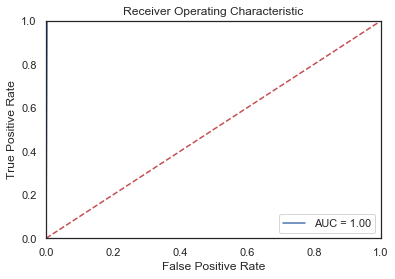

In [1204]:
target_names = ['0','1']
print(classification_report(y_test_over, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_over, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test_over, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_over, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1205]:
cm = confusion_matrix(y_test_over, Y_pred)
cm

array([[6525,   19],
       [   0, 6630]], dtype=int64)

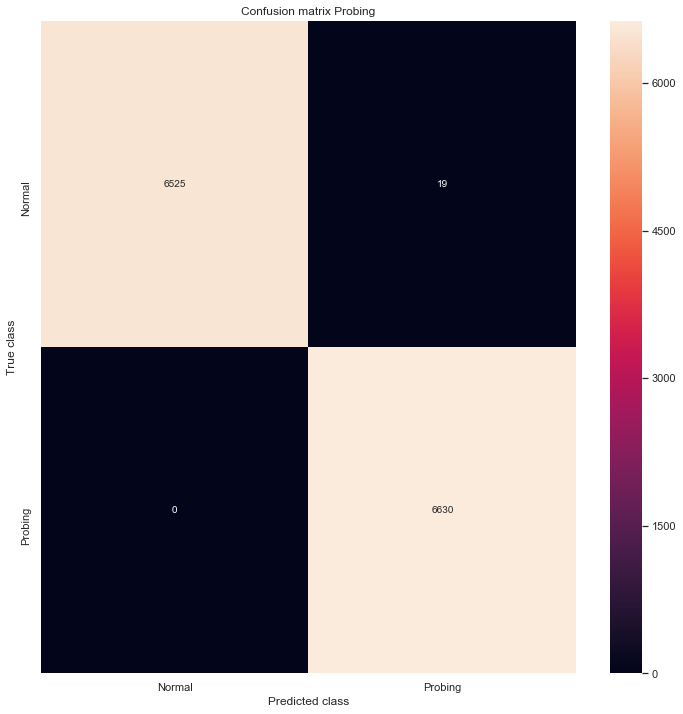

In [1206]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

              precision    recall  f1-score   support

           0        0.7       0.7       0.7      6544
           1        0.7       0.7       0.7      6630

    accuracy                            0.7     13174
   macro avg        0.7       0.7       0.7     13174
weighted avg        0.7       0.7       0.7     13174


 ------------------------------------

ROC-AUC Score is ..: 0.6928926869788727
Log Loss Score is ..: 10.60505602572389


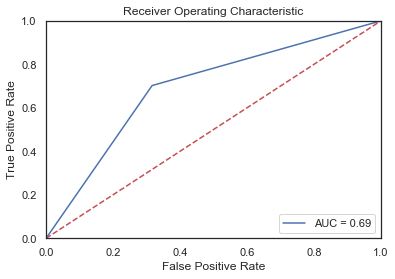

0.6929558220737817


array([[4471, 1972],
       [2073, 4658]], dtype=int64)

In [1208]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_over,y_train_over)
ylr_over_pred = lr.predict(X_test_over)

target_names = ['0','1']
print(classification_report(y_test_over, ylr_over_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_over, ylr_over_pred))
print("Log Loss Score is ..:",log_loss(y_test_over, ylr_over_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_over, ylr_over_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acuuracy_score = accuracy_score(ylr_over_pred,y_test_over)
print(acuuracy_score) 
cm = confusion_matrix(ylr_over_pred,y_test_over)
cm

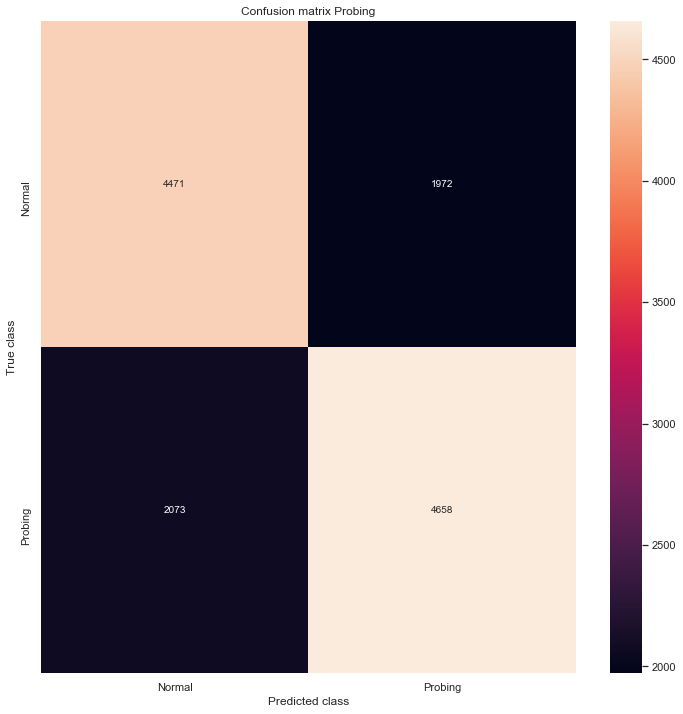

In [1209]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# NO CORRELATED DATA MODEL

In [1210]:
df_backup_no_corr = df_no_corr[df_no_corr.columns]
df_backup_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                    1   
1                                           1                    0   
2                                           0                    0   
3                                          11                    1   
4                                           1                    0   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                          1                     0   
1                          1                     0   
2                          1                     0   
3                          0                     0   
4                          1                     0   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

Description  CC Existing Customers i

In [1211]:
# DEFINE TARGET (OUTPUT) COLUMNS
tar_columns=['Good_Bad_Flag'] 
target = df_no_corr[tar_columns]

## Identifying columns as categorical or not
categorial_features = ['Worst Account Status All Credits',
                       'Any Legal Action YN',
                       'Last Credit Decision',
                       'Home Phone YN',
                       'Employers Address YN',
                       'Residential Status',
                       'Employment Field',
                       'PO Credit Exisits_YN',
                       'CC Worst Payment Status_L24M',
                       'CB Unpaid Notes_Cheques YN',
                       'Worst Status of All Loans_L3Y',
                       'E Mail Given YN',
                       'OD_Pending Credit_YN',
                       'Guarantee YN',
                       'Overridden_From_Final_Decline_YN',
                       'CC Existing Customers in L6M']

yes_no =  ['Any Legal Action YN',
           'Home Phone YN',
           'Employers Address YN',
           'PO Credit Exisits_YN',
           'CB Unpaid Notes_Cheques YN',
           'E Mail Given YN',
           'OD_Pending Credit_YN',
           'Guarantee YN',
           'Overridden_From_Final_Decline_YN',
           'CC Existing Customers in L6M']

one_hot = ['Last Credit Decision',
           'Residential Status',
           'Employment Field']

label =   ['Worst Account Status All Credits',
           'CC Worst Payment Status_L24M']

In [1212]:
## LABEL ENCODE OF THESE CATEGORICAL COLUMNS
def label_encode(label):
    if label == 'D':
        return 9
    if label == 'X':
        return 10
    if label == 'L':
        return 11
    if label == 'U':
        return -1
    else:
        return label
for index, value in enumerate(label):
    df_no_corr[value] = df_no_corr[value].apply(label_encode)
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                    1   
1                                           1                    0   
2                                           0                    0   
3                                          11                    1   
4                                           1                    0   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                          1                     0   
1                          1                     0   
2                          1                     0   
3                          0                     0   
4                          1                     0   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

Description  CC Existing Customers i

In [1213]:
## ENCODE YES/NO COLUMNS
def labels_yn(label):
    if label == 'Y':
        return 1
    if label == 'N':
        return 0
    else:
        return -1
    
for index, value in enumerate(yes_no):
    df_no_corr[value] = df_no_corr[value].apply(labels_yn)
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                   -1   
1                                           1                   -1   
2                                           0                   -1   
3                                          11                   -1   
4                                           1                   -1   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4                      -1                                -1   

Description  CC Existing Customers i

In [1214]:
#€ ENCODE VAR_38 COLUMN AS I --> 1, NaN --> 0
def labels_var38(label):
    if label == 'I':
        return 1
    else:
        return 0
df_no_corr['Worst Status of All Loans_L3Y'] = df_no_corr['Worst Status of All Loans_L3Y'].apply(labels_var38)
df_no_corr['Worst Status of All Loans_L3Y']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
34554    0
34555    0
34556    0
34557    0
34558    0
34559    0
34560    0
34561    0
34562    0
34563    0
34564    0
34565    0
34566    0
34567    0
34568    0
34569    0
34570    0
34571    0
34572    0
34573    0
34574    0
34575    0
34576    0
34577    0
34578    0
34579    0
34580    0
34581    0
34582    0
34583    0
Name: Worst Status of All Loans_L3Y, Length: 34584, dtype: int64

In [1215]:
## FILL THIS COLUMNS'S EMPTY VALUES --> 0
df_no_corr['AMC_Transfer_Outstanding'] = df_no_corr['AMC_Transfer_Outstanding'].fillna(0)
df_no_corr['AMC_Transfer_Outstanding']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
5           0.000
6           0.000
7           0.000
8           0.000
9           0.000
10          0.000
11          0.000
12          0.000
13      65482.000
14          0.000
15          0.000
16          0.000
17          0.000
18          0.000
19          0.000
20          0.000
21          0.000
22          0.000
23          0.000
24          0.000
25          0.000
26          0.000
27          0.000
28          0.000
29          0.000
           ...   
34554       0.000
34555       0.000
34556       0.000
34557       0.000
34558       0.000
34559       0.000
34560       0.000
34561       0.000
34562       0.000
34563       0.000
34564       0.000
34565       0.000
34566       0.000
34567       0.000
34568     179.000
34569       0.000
34570       0.000
34571       0.000
34572       0.000
34573       0.000
34574       0.000
34575       0.000
34576       0.000
34577       0.000
34578     

In [1216]:
(df_no_corr.isna().sum()*100)/df_no_corr.shape[0] #CHECK NaN COLUMNS

Description
Good_Bad_Flag                                  0.000
CC Num of application_L1M                      0.000
Worst Account Status All Credits               0.000
Any Legal Action YN                            0.000
Existing Credit Card Previous Limit           24.494
LO Num of application_L6M                      0.000
TS Last Legal Action                          83.952
TS Oldest Open Credit Card                     0.000
Last Credit Decision                          26.162
Total Assets_3                                 0.043
TS Last Closed good account                   11.659
CC Num of application_L6M                      0.000
Home Phone YN                                  0.000
Employers Address YN                           0.000
AMC_Transfer_Outstanding                       0.000
Existing Customer Limit                       23.786
CC Total Payment of all Credit cards           0.000
OD Tot Outstanding Balance YTL                 0.000
Residential Status                

AFTER THIS STEP OUR DATASET IS READY.  <br>
BUT APPLY THESE PROPERTIES TO DF_NO_CORR

In [1217]:
X = df_no_corr.drop('Good_Bad_Flag', axis=1)

In [1218]:
y = target

In [1219]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
0                                    0                                11   
1                                    0                                 1   
2                                    0                                 0   
3                                    0                                11   
4                                    0                                 1   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
0                             -1                             1750.000   
1                             -1                             1300.000   
2                             -1                                0.000   
3                             -1                              800.000   
4                             -1                             6250.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
0                                    1                36.000   
1                                   12                   nan   
2                                    0                   nan   
3                                    3                37.000   
4                                    0                   nan   

Description  TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                                    86                    A         888.000   
1                                    13                    R          20.000   
2                                   274                    A         511.000   
3                                     6                    A           0.000   
4                                   126                    A          32.000   

Description  TS Last Closed good account  ...  \
0                                  4.000  ...   
1                                  4.000  ...   
2                                  0.000  ...   
3                                 45.000  ...   
4                                  8.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4               

In [1220]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                   -1   
1                                           1                   -1   
2                                           0                   -1   
3                                          11                   -1   
4                                           1                   -1   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4                      -1                                -1   

Description  CC Existing Customers i

In [1221]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  Last Credit Decision__R  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   Residential Status__1.0  Residential Status__2.0  Residential Status__3.0  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   

   Residential Status__4.0  Residential Status__5.0  Employment Field__1.0  \
0                        0                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
3                        0                        0                      0   
4                        0                        0                      0   

   Employment Field__2.0  ...  Employment Field__56.0  Employment Field__58.0  \
0                      0  ...                       0                       0   
1                      0  ...                       0                       0   
2                      0  ...                       0                       0   
3                      0  ...                       0                       0   
4                      0  ...                       0                       0   

   Employment Field__59.0  Employment Field__60.0  Employment Field__61.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__62.0  Employment Field__65.0  Employment Field__66.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__67.0  Employment Field__68.0  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 71 columns]

In [1222]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                          0                                11   
1                          0                                 1   
2                          0                                 0   
3                          0                                11   
4                          0                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                             1750.000   
1                   -1                             1300.000   
2                   -1                                0.000   
3                   -1                              800.000   
4                   -1                             6250.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                          1                36.000   
1                         12                   nan   
2                          0                   nan   
3                          3                37.000   
4                          0                   nan   

   TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                          86                    A         888.000   
1                          13                    R          20.000   
2                         274                    A         511.000   
3                           6                    A           0.000   
4                         126                    A          32.000   

   TS Last Closed good account  ...  Employment Field__56.0  \
0                        4.000  ...                       0   
1                        4.000  ...                       0   
2                        0.000  ...                       0   
3                       45.000  ...                       0   
4                        8.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 114 columns]

In [1223]:
drop = ['MO Number of months in 3 or more delay_L6M', 'CC TS First Open Active Credit Card', 'Verified Own Income Amount', 'Declared Monthly Net Income', 'Monthly Family Income', 'Total Assets_1']

for value in drop:
    numeric_columns.remove(value)
numeric_columns

['MO Number of months in 3 or more delay_L24M',
 'CC Num of application_L1M',
 'TS Last Legal Action',
 'Monthly Net Income',
 'OD Tot Outstanding Balance YTL',
 'Existing Overdraft Limit',
 'CC Number of months in 2 delay_L12M',
 'Existing Credit Card Previous Limit',
 'CC Total Payment of all Credit cards',
 'Existing Customer Limit',
 'AMC_Transfer_Outstanding',
 'TS Last Closed good account',
 'LO Number of closed good account',
 'TS Oldest Open Credit Card',
 'OD Number of months in 2 delay_L24M',
 'CC Number of months in 1 delay_L12M',
 'MO Number of months in 1 delay_L6M',
 'LO Num of open accounts_L12M',
 'CC Num of application_L6M',
 'Num Unpaid Cards L25M-L36M',
 'Tenure',
 'LO TS First Open Date',
 'LO Num of application_L6M',
 'Total Assets_3',
 'Last Declared Monthly Income_L3M',
 'Total Amount of Open Mortgage Loans',
 'Time in Employment']

In [1224]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                                0.022   
1                   -1                                0.016   
2                   -1                                0.000   
3                   -1                                0.010   
4                   -1                                0.078   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                   nan   
2                      0.000                   nan   
3                      0.013                 0.169   
4                      0.000                   nan   

   TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                       0.246                    A           0.000   
1                       0.037                    R           0.000   
2                       0.783                    A           0.000   
3                       0.017                    A           0.000   
4                       0.360                    A           0.000   

   TS Last Closed good account  ...  Employment Field__56.0  \
0                        0.066  ...                       0   
1                        0.066  ...                       0   
2                        0.000  ...                       0   
3                        0.738  ...                       0   
4                        0.131  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 114 columns]

In [1225]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [1226]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(34584, 111)

In [1227]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                                0.022   
1                   -1                                0.016   
2                   -1                                0.000   
3                   -1                                0.010   
4                   -1                                0.078   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
3                      0.013                 0.169   
4                      0.000                -1.000   

   TS Oldest Open Credit Card  Total Assets_3  TS Last Closed good account  \
0                       0.246           0.000                        0.066   
1                       0.037           0.000                        0.066   
2                       0.783           0.000                        0.000   
3                       0.017           0.000                        0.738   
4                       0.360           0.000                        0.131   

   CC Num of application_L6M  ...  Employment Field__56.0  \
0                      0.000  ...                       0   
1                      0.000  ...                       0   
2                      0.000  ...                       0   
3                      0.000  ...                       0   
4                      0.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 111 columns]

In [1228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [1229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1230]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26629, 111), (7955, 111), (26629, 1), (7955, 1))

In [1231]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

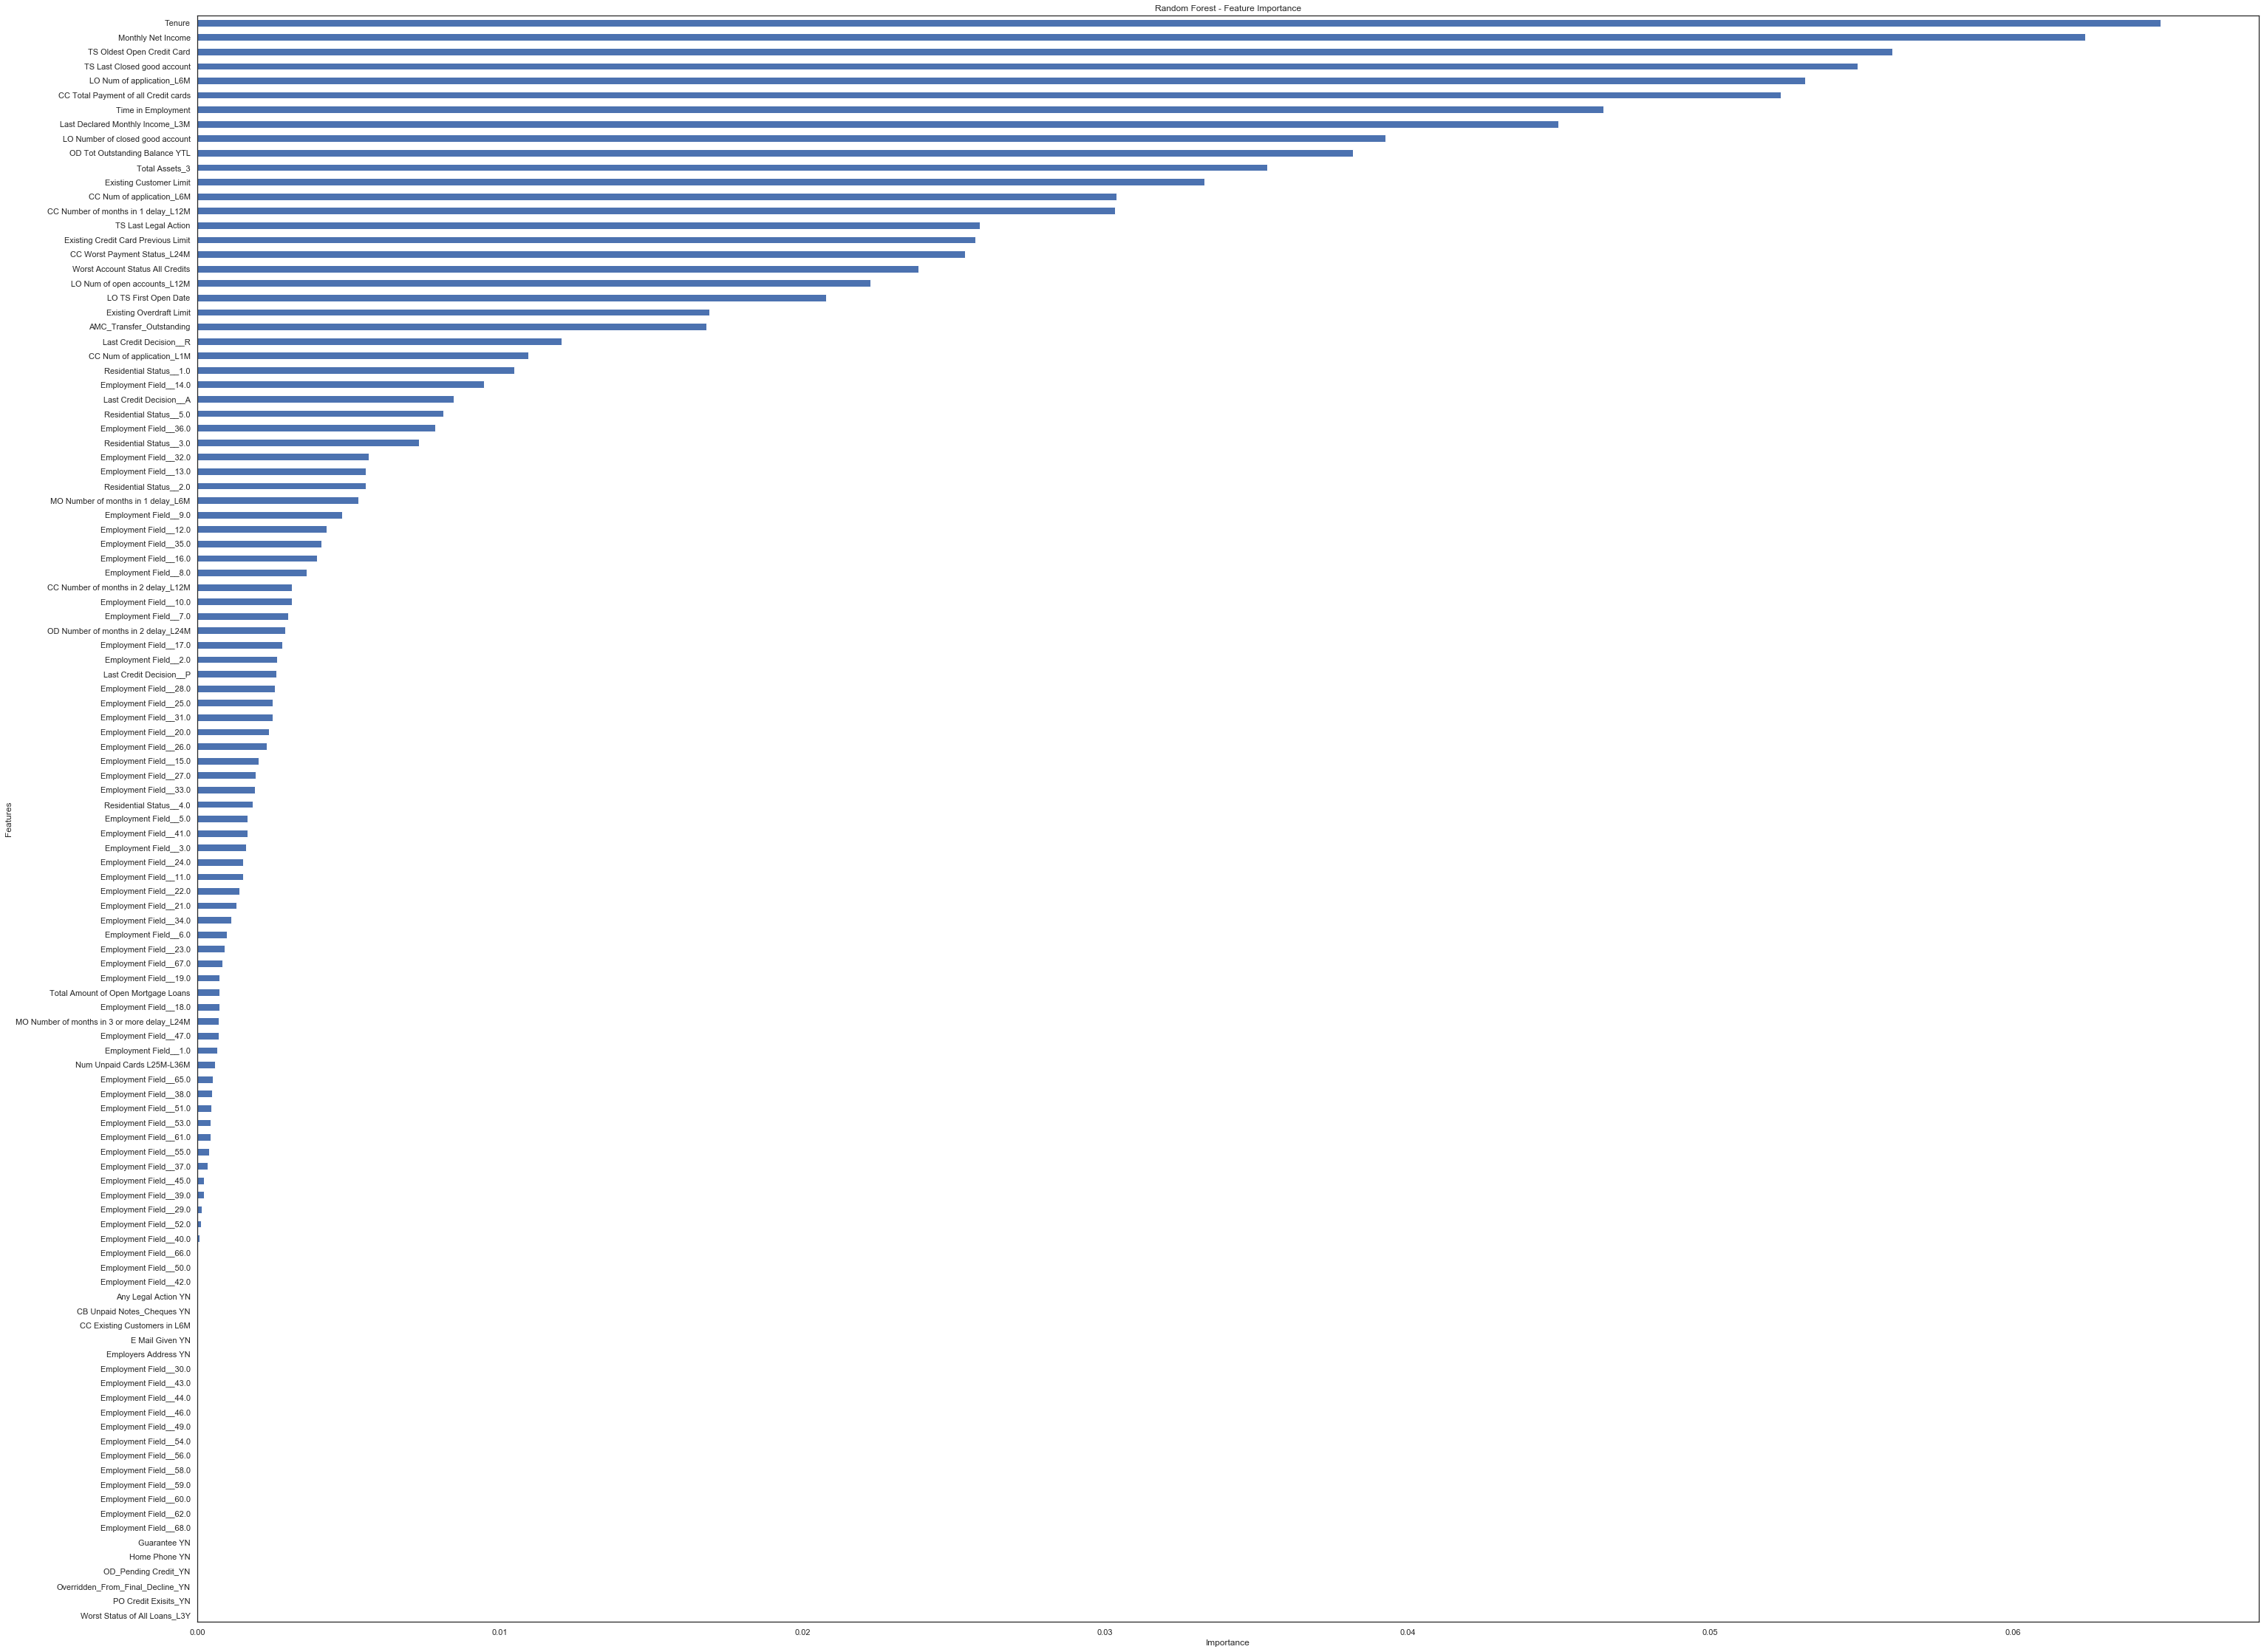

In [1237]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1238]:
fea_imp[fea_imp['imp'] < 0.0001]

imp                               col
29  0.000     Worst Status of All Loans_L3Y
26  0.000              PO Credit Exisits_YN
38  0.000  Overridden_From_Final_Decline_YN
34  0.000              OD_Pending Credit_YN
10  0.000                     Home Phone YN
37  0.000                      Guarantee YN
110 0.000            Employment Field__68.0
106 0.000            Employment Field__62.0
104 0.000            Employment Field__60.0
103 0.000            Employment Field__59.0
102 0.000            Employment Field__58.0
101 0.000            Employment Field__56.0
99  0.000            Employment Field__54.0
94  0.000            Employment Field__49.0
92  0.000            Employment Field__46.0
90  0.000            Employment Field__44.0
89  0.000            Employment Field__43.0
76  0.000            Employment Field__30.0
11  0.000              Employers Address YN
33  0.000                   E Mail Given YN
39  0.000      CC Existing Customers in L6M
28  0.000        CB Unpaid Notes_Cheques YN
2   0.000               Any Legal Action YN
88  0.000            Employment Field__42.0
95  0.000            Employment Field__50.0
108 0.000            Employment Field__66.0
86  0.000            Employment Field__40.0

In [1234]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

In [1235]:
from rfpimp import permutation_importances
from sklearn.metrics import r2_score

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp

Importance
Feature                                         
TS Oldest Open Credit Card                 0.385
TS Last Closed good account                0.381
LO Num of application_L6M                  0.350
Worst Account Status All Credits           0.323
CC Num of application_L6M                  0.306
CC Total Payment of all Credit cards       0.297
LO Number of closed good account           0.292
Time in Employment                         0.261
Tenure                                     0.252
Monthly Net Income                         0.244
Existing Customer Limit                    0.235
CC Worst Payment Status_L24M               0.221
TS Last Legal Action                       0.221
Total Assets_3                             0.213
OD Tot Outstanding Balance YTL             0.204
Existing Credit Card Previous Limit        0.204
Existing Overdraft Limit                   0.190
Last Credit Decision__A                    0.186
Last Credit Decision__R                    0.177
Last Declared Monthly Income_L3M           0.173
CC Number of months in 1 delay_L12M        0.159
AMC_Transfer_Outstanding                   0.142
LO TS First Open Date                      0.133
CC Num of application_L1M                  0.124
LO Num of open accounts_L12M               0.102
Employment Field__14.0                     0.093
Residential Status__1.0                    0.089
MO Number of months in 1 delay_L6M         0.058
Residential Status__5.0                    0.058
Residential Status__3.0                    0.053
...                                          ...
Employment Field__66.0                     0.000
Employment Field__67.0                     0.000
Employment Field__40.0                     0.000
Employment Field__29.0                     0.000
Employment Field__38.0                     0.000
Employment Field__37.0                     0.000
Guarantee YN                               0.000
Num Unpaid Cards L25M-L36M                 0.000
CC Number of months in 2 delay_L12M        0.000
OD_Pending Credit_YN                       0.000
E Mail Given YN                            0.000
Employment Field__1.0                      0.000
Employment Field__5.0                      0.000
Employment Field__6.0                      0.000
Employment Field__12.0                     0.000
Worst Status of All Loans_L3Y              0.000
CB Unpaid Notes_Cheques YN                 0.000
PO Credit Exisits_YN                       0.000
Employment Field__18.0                     0.000
Employment Field__19.0                     0.000
Employment Field__23.0                     0.000
Employment Field__24.0                     0.000
Total Amount of Open Mortgage Loans        0.000
Employers Address YN                       0.000
Overridden_From_Final_Decline_YN           0.000
Employment Field__30.0                     0.000
Home Phone YN                              0.000
Employment Field__33.0                     0.000
Any Legal Action YN                        0.000
Employment Field__68.0                     0.000

[111 rows x 1 columns]

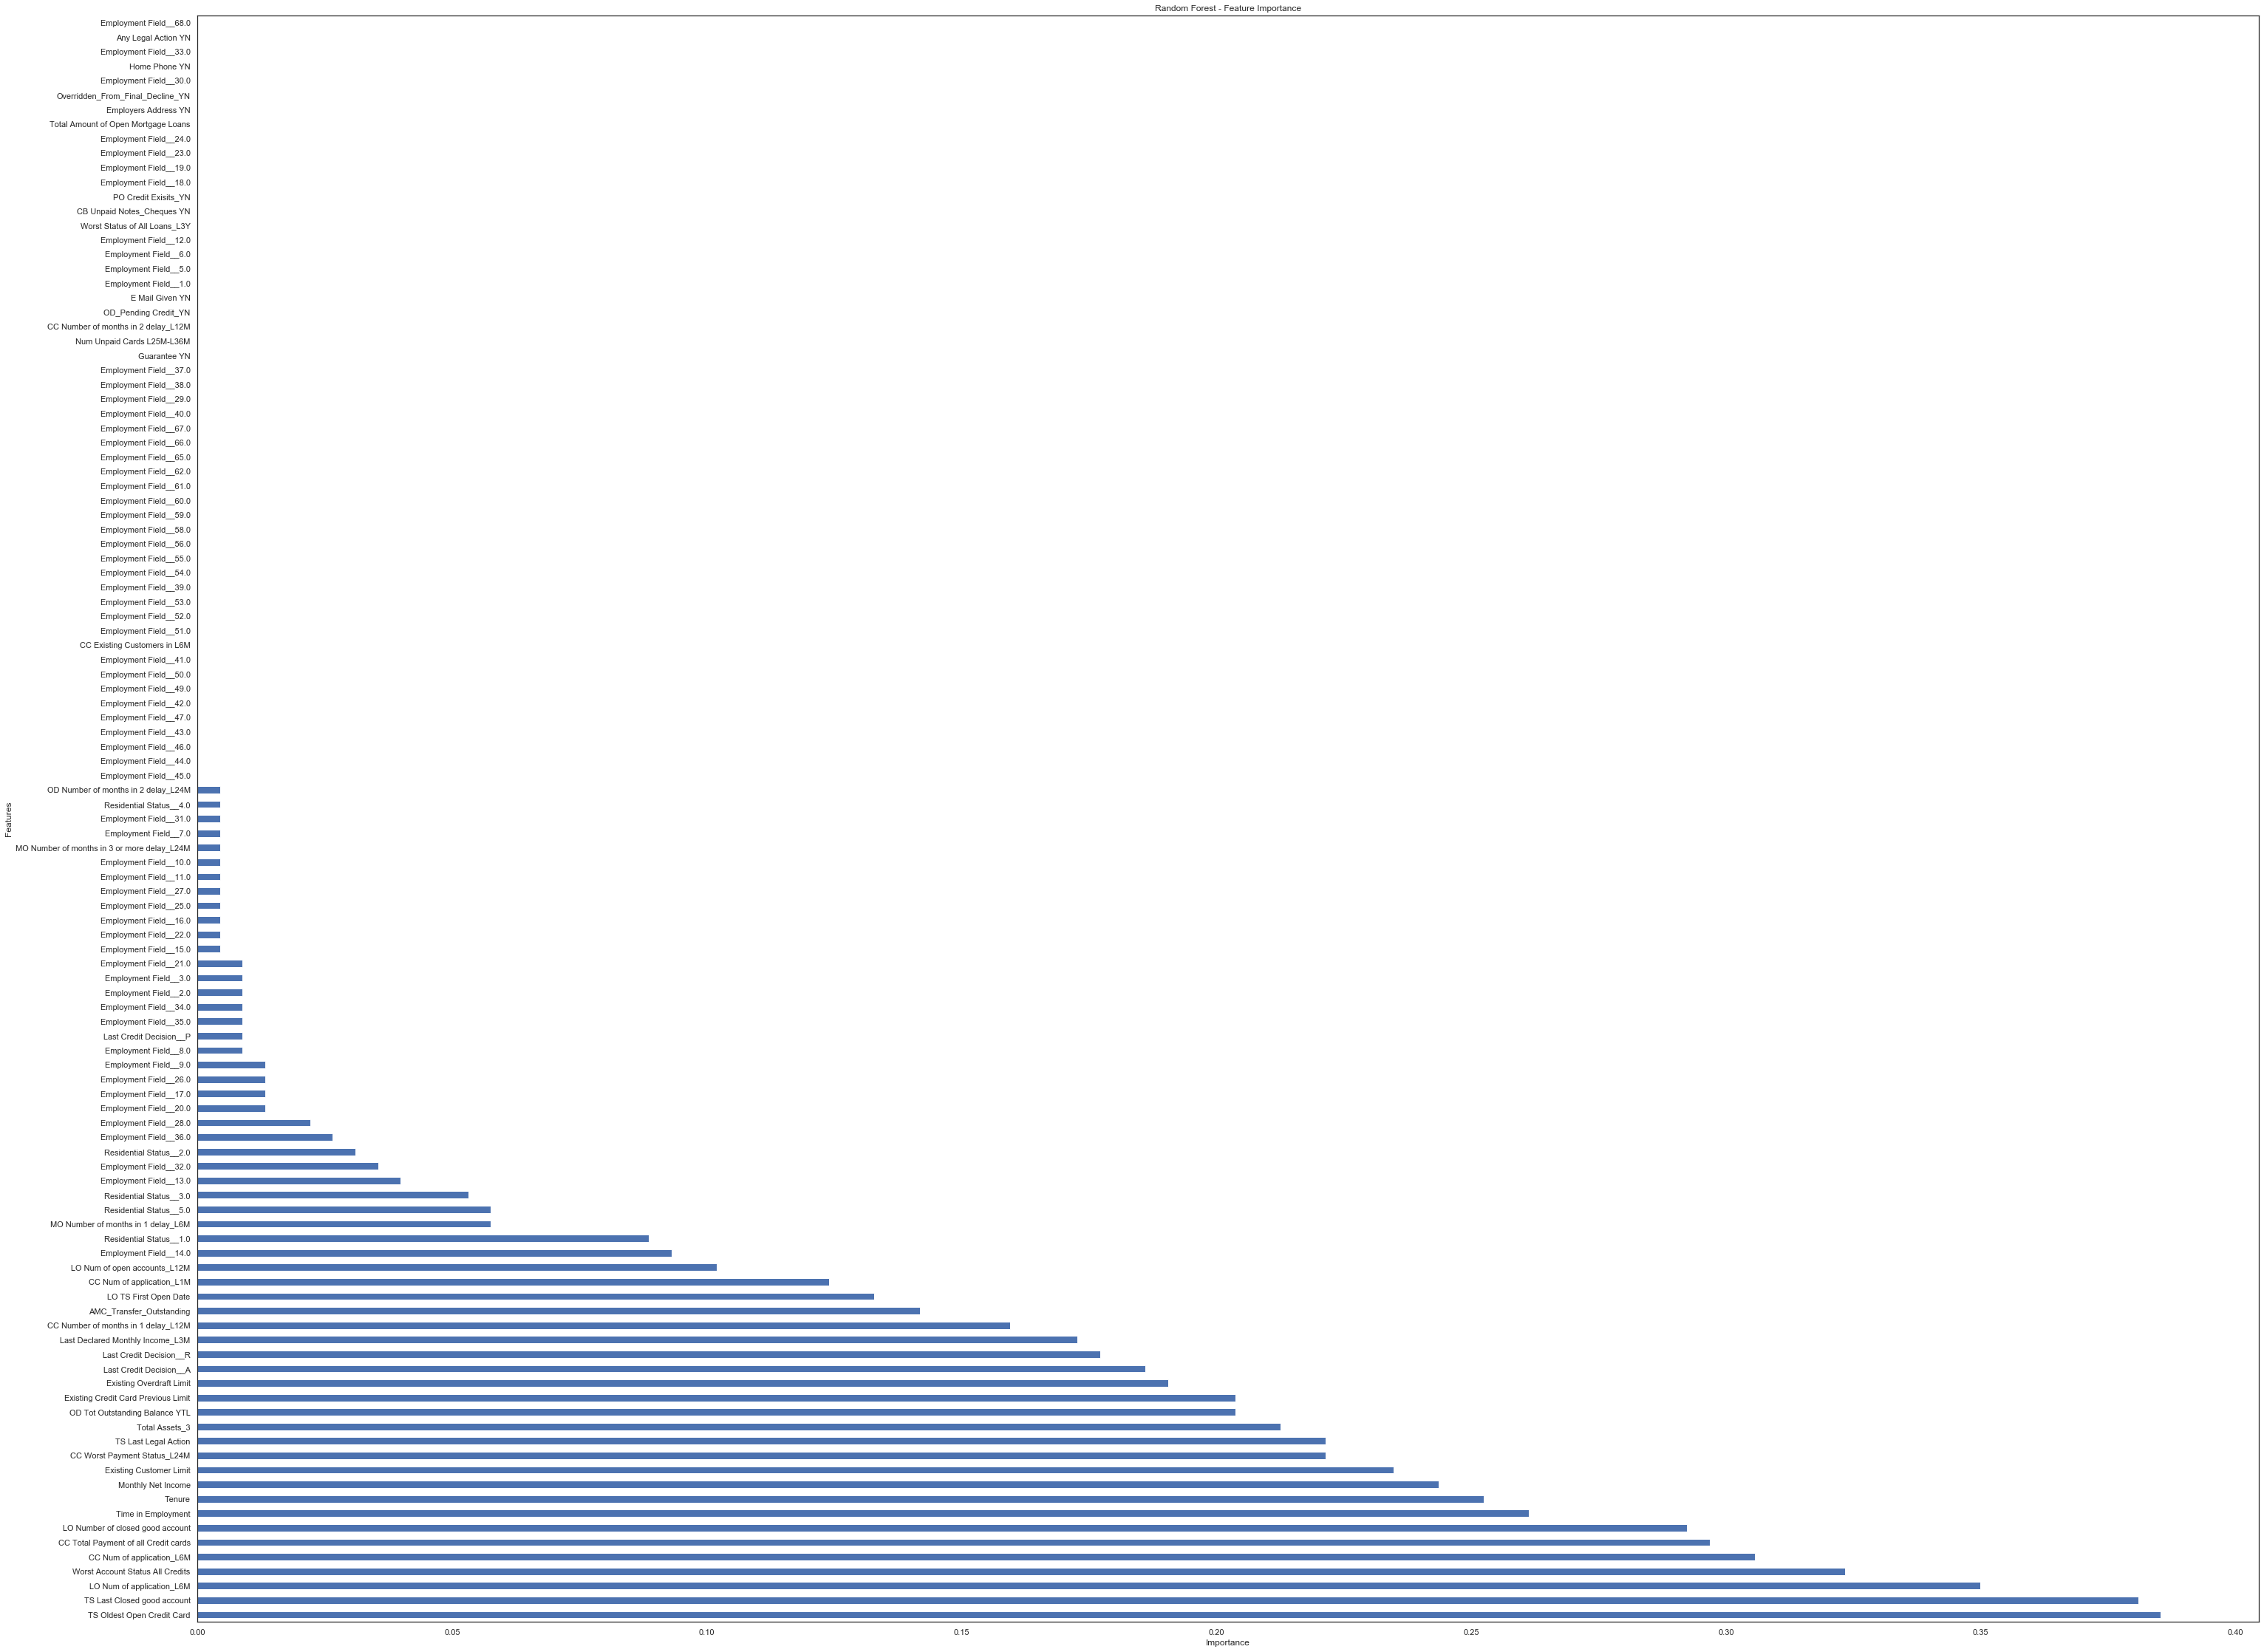

In [1236]:
fea_imp = perm_imp_rfpimp
fea_imp.plot(kind='barh', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1239]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                               col
29  0.000     Worst Status of All Loans_L3Y
26  0.000              PO Credit Exisits_YN
38  0.000  Overridden_From_Final_Decline_YN
34  0.000              OD_Pending Credit_YN
10  0.000                     Home Phone YN
37  0.000                      Guarantee YN
110 0.000            Employment Field__68.0
106 0.000            Employment Field__62.0
104 0.000            Employment Field__60.0
103 0.000            Employment Field__59.0
102 0.000            Employment Field__58.0
101 0.000            Employment Field__56.0
99  0.000            Employment Field__54.0
94  0.000            Employment Field__49.0
92  0.000            Employment Field__46.0
90  0.000            Employment Field__44.0
89  0.000            Employment Field__43.0
76  0.000            Employment Field__30.0
11  0.000              Employers Address YN
33  0.000                   E Mail Given YN
39  0.000      CC Existing Customers in L6M
28  0.000        CB Unpaid Notes_Cheques YN
2   0.000               Any Legal Action YN
88  0.000            Employment Field__42.0
95  0.000            Employment Field__50.0
108 0.000            Employment Field__66.0

In [1240]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
3                      0.000                                11   
4                      0.000                                 1   

   Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                0.022                      0.004   
1                                0.016                      0.052   
2                                0.000                      0.000   
3                                0.010                      0.013   
4                                0.078                      0.000   

   TS Last Legal Action  TS Oldest Open Credit Card  Total Assets_3  \
0                 0.164                       0.246           0.000   
1                -1.000                       0.037           0.000   
2                -1.000                       0.783           0.000   
3                 0.169                       0.017           0.000   
4                -1.000                       0.360           0.000   

   TS Last Closed good account  CC Num of application_L6M  \
0                        0.066                      0.000   
1                        0.066                      0.000   
2                        0.000                      0.000   
3                        0.738                      0.000   
4                        0.131                      0.000   

   AMC_Transfer_Outstanding  ...  Employment Field__41.0  \
0                     0.000  ...                       0   
1                     0.000  ...                       0   
2                     0.000  ...                       0   
3                     0.000  ...                       0   
4                     0.000  ...                       0   

   Employment Field__45.0  Employment Field__47.0  Employment Field__51.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__52.0  Employment Field__53.0  Employment Field__55.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Employment Field__61.0  Employment Field__65.0  Employment Field__67.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 85 columns]

In [1241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1242]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26629, 85), (7955, 85), (26629, 1), (7955, 1))

In [1243]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Model Accuracy for Binary is: 0.3220615964802011

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       0.3       0.5      7570
           1        0.1       0.9       0.1       385

    accuracy                            0.3      7955
   macro avg        0.5       0.6       0.3      7955
weighted avg        0.9       0.3       0.4      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5784607730446567
Log Loss Score is ..: 23.415699679199314


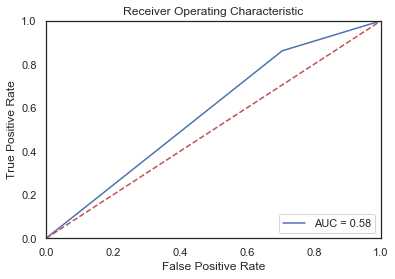

In [1244]:
# Gaussian NB used for binary classification.
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",gnb.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = gnb.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Accuracy for Binary is: 0.9513513513513514

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.4998678996036988
Log Loss Score is ..: 1.6802649986204024


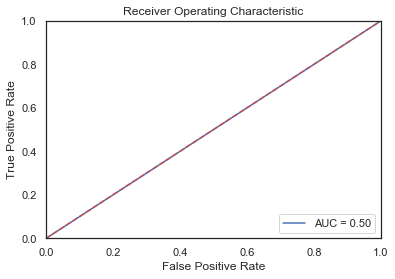

In [1246]:
clf_mlp = MLPClassifier(solver='adam', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_mlp.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_mlp.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1247]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators' : [50,100,200,300],
    'learning_rate' : [1,2,0.5,.1],
}

clf = GridSearchCV(AdaBoostClassifier(), params, n_jobs=2, verbose=2)
clf.fit(X_train, y_train)

print (clf.best_estimator_)
clf = clf.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:  4.2min finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=None)


In [1248]:
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


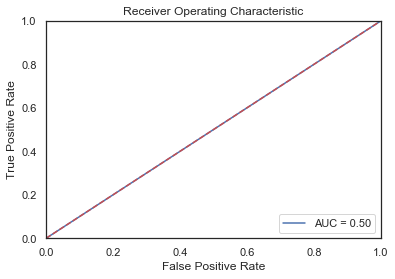

In [1249]:
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Accuracy for Binary is: 0.9510999371464488

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.2       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.6       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5009684503079483
Log Loss Score is ..: 1.688948839171265


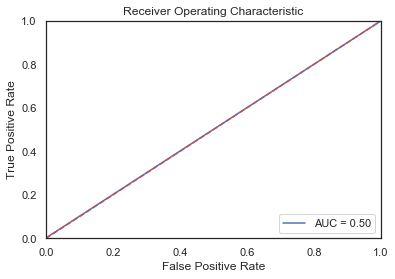

In [1250]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_gini.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_gini.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Accuracy for Binary is: 0.9508485229415462

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.1       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.500836349911647
Log Loss Score is ..: 1.6976325792070512


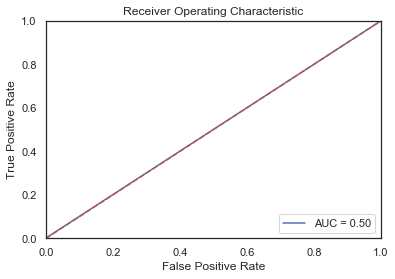

In [1251]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train,y_train)
print("Model Accuracy for {} is: {}".format("Binary",clf_gini.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf_gini.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   31.8s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   56.0s finished


Model Accuracy for Binary with no duplicates is: 0.9516027655562539

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.5
Log Loss Score is ..: 1.671581258584616


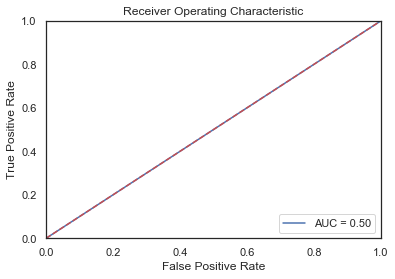

In [1252]:
params = {
    'n_estimators' : [10,25,50,100],
    'max_depth' : [10,25,50,100,None],
}

clf = GridSearchCV(RandomForestClassifier(), params, n_jobs=2, verbose=2)
clf.fit(X_train,y_train)
clf = clf.best_estimator_
print("Model Accuracy for {} is: {}".format("Binary with no duplicates",clf.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  4.8min finished


Model Accuracy for Binary with no duplicates is: 0.9514770584538026

 ------------------------------------

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      7570
           1        0.0       0.0       0.0       385

    accuracy                            1.0      7955
   macro avg        0.5       0.5       0.5      7955
weighted avg        0.9       1.0       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.4999339498018494
Log Loss Score is ..: 1.675923128602509


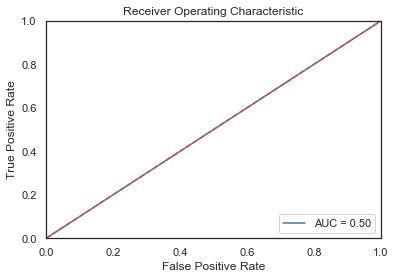

In [1253]:
params = {
    'max_depth' : [3,5,10],
    'learning_rate' : [0.01,.05,.1],
    'n_estimators' :[100,150,200],
    'gamma' : [0,0.1],
    'reg_lambda' : [1,2]
}

clf = GridSearchCV(lgb.LGBMClassifier(), params, verbose=1)
clf.fit(X_train,y_train)
clf = clf.best_estimator_
print("Model Accuracy for {} is: {}".format("Binary with no duplicates",clf.score(X_test,y_test)))
print("\n ------------------------------------\n")
y_pred = clf.predict(X_test)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, y_pred))
print("Log Loss Score is ..:",log_loss(y_test, y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## LIGHT GBM MODEL DEEP DIVE

In [1254]:
df.groupby('Good_Bad_Flag').count()

Description    CC Num of application_L1M  Worst Account Status All Credits  \
Good_Bad_Flag                                                                
0                                  32935                             32935   
1                                   1649                              1649   

Description    Any Legal Action YN  Existing Credit Card Previous Limit  \
Good_Bad_Flag                                                             
0                            32935                                24954   
1                             1649                                 1159   

Description    LO Num of application_L6M  TS Last Legal Action  \
Good_Bad_Flag                                                    
0                                  32935                  5067   
1                                   1649                   483   

Description    TS Oldest Open Credit Card  \
Good_Bad_Flag                               
0                                   32935   
1                                    1649   

Description    CC TS First Open Active Credit Card  Last Credit Decision  \
Good_Bad_Flag                                                              
0                                            32935                 24380   
1                                             1649                  1156   

Description    Total Assets_3  ...  LO TS First Open Date  \
Good_Bad_Flag                  ...                          
0                       32921  ...                   9551   
1                        1648  ...                    378   

Description    MO Number of months in 1 delay_L6M  \
Good_Bad_Flag                                       
0                                            2928   
1                                              40   

Description    MO Number of months in 3 or more delay_L6M  E Mail Given YN  \
Good_Bad_Flag                                                                
0                                                     178            32935   
1                                                       4             1649   

Description    OD_Pending Credit_YN  CC Number of months in 2 delay_L12M  \
Good_Bad_Flag                                                              
0                             32935                                 1356   
1                              1649                                   35   

Description    Num Unpaid Cards L25M-L36M  Guarantee YN  \
Good_Bad_Flag                                             
0                                   32935         32935   
1                                    1649          1649   

Description    Overridden_From_Final_Decline_YN  CC Existing Customers in L6M  
Good_Bad_Flag                                                                  
0                                         32935                         32935  
1                                          1649                          1649  

[2 rows x 49 columns]

In [1255]:
train_data = lgb.Dataset(X_train, label=y_train, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test, label=y_test)

In [1256]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,
    'scale_pos_weight':1 # because training data is extremely unbalanced 

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.660268
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.692641
[3]	valid_0's auc: 0.712924
[4]	valid_0's auc: 0.711341
[5]	valid_0's auc: 0.714588
[6]	valid_0's auc: 0.724522
[7]	valid_0's auc: 0.728517
[8]	valid_0's auc: 0.732703
[9]	valid_0's auc: 0.736982
[10]	valid_0's auc: 0.740177
[11]	valid_0's auc: 0.741185
[12]	valid_0's auc: 0.741955
[13]	valid_0's auc: 0.741755
[14]	valid_0's auc: 0.743936
[15]	valid_0's auc: 0.744128
[16]	valid_0's auc: 0.745524
[17]	valid_0's auc: 0.744439
[18]	valid_0's auc: 0.744219
[19]	valid_0's auc: 0.744963
[20]	valid_0's auc: 0.744669
[21]	valid_0's auc: 0.745514
[22]	valid_0's auc: 0.746188
[23]	valid_0's auc: 0.746418
[24]	valid_0's auc: 0.746994
[25]	valid_0's auc: 0.747112
[26]	valid_0's auc: 0.747753
[27]	valid_0's auc: 0.748538
[28]	valid_0's auc: 0.749476
[29]	valid_0's auc: 0.749978
[30]	valid_0's auc: 0.750125
[31]	valid_0's auc: 0.750568
[32]	valid_0's auc: 0.749633
[33]	valid_0's auc

[306]	valid_0's auc: 0.76358
[307]	valid_0's auc: 0.763452
[308]	valid_0's auc: 0.763547
[309]	valid_0's auc: 0.763629
[310]	valid_0's auc: 0.76347
[311]	valid_0's auc: 0.763437
[312]	valid_0's auc: 0.763303
[313]	valid_0's auc: 0.763379
[314]	valid_0's auc: 0.763096
[315]	valid_0's auc: 0.762977
[316]	valid_0's auc: 0.763031
[317]	valid_0's auc: 0.76312
[318]	valid_0's auc: 0.762998
[319]	valid_0's auc: 0.763021
[320]	valid_0's auc: 0.762861
[321]	valid_0's auc: 0.762727
[322]	valid_0's auc: 0.762666
[323]	valid_0's auc: 0.762595
[324]	valid_0's auc: 0.762396
[325]	valid_0's auc: 0.762685
[326]	valid_0's auc: 0.762674
[327]	valid_0's auc: 0.762728
[328]	valid_0's auc: 0.762725
[329]	valid_0's auc: 0.762379
[330]	valid_0's auc: 0.762478
[331]	valid_0's auc: 0.762353
[332]	valid_0's auc: 0.762327
[333]	valid_0's auc: 0.762373
[334]	valid_0's auc: 0.762346
[335]	valid_0's auc: 0.762275
[336]	valid_0's auc: 0.762254
[337]	valid_0's auc: 0.762088
[338]	valid_0's auc: 0.761844
[339]	valid_0

In [1257]:
model.best_iteration

291

In [1258]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    'scale_pos_weight':1 # because training data is extremely unbalanced 
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [1259]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [1260]:
from scipy.misc import derivative

In [1261]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7532   |  0.7638   |  22.56    |  0.7885   |  0.0516   |  330.1    |  7.655    |  65.29    |  53.32    |
|  2        |  0.7558   |  0.8202   |  23.4     |  0.7318   |  0.06802  |  398.6    |  7.354    |  67.53    |  56.79    |
|  3        |  0.7562   |  0.7396   |  22.16    |  0.7959   |  0.06675  |  354.0    |  7.104    |  62.99    |  52.16    |
|  4        |  0.7552   |  0.709    |  20.83    |  0.7059   |  0.04468  |  342.3    |  7.116    |  67.85    |  58.31    |
|  5        |  0.7584   |  0.8119   |  22.2     |  0.757    |  0.06878  |  395.3    |  7.585    |  62.14    |  57.34    |
|  6        |  0.7551   |  0.717    |  20.14    |  0.7256   |  0.0423   |  399.8    |  7.274    |  60.04    |  50.75    |
|  7        |  0.7572   

In [1262]:
bo.max['params']

{'bagging_fraction': 0.7924953044769014,
 'bagging_freq': 20.399238110553,
 'feature_fraction': 0.785851782925563,
 'learning_rate': 0.04899743605090736,
 'max_bin': 399.63835820830775,
 'max_depth': 7.3253675600168044,
 'min_child_samples': 69.98944529794223,
 'num_leaves': 59.90638226285973}

In [1263]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 70,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.785,
    'bagging_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate': 0.048,
    'verbose': 0,
    'max_depth': 7,
    'max_bin' : 400,
    'scale_pos_weight':1 # because training data is extremely unbalanced 
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.689824
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.697252
[3]	valid_0's auc: 0.704422
[4]	valid_0's auc: 0.704873
[5]	valid_0's auc: 0.714446
[6]	valid_0's auc: 0.721134
[7]	valid_0's auc: 0.723823
[8]	valid_0's auc: 0.728314
[9]	valid_0's auc: 0.731701
[10]	valid_0's auc: 0.733255
[11]	valid_0's auc: 0.733862
[12]	valid_0's auc: 0.73334
[13]	valid_0's auc: 0.732194
[14]	valid_0's auc: 0.732996
[15]	valid_0's auc: 0.733541
[16]	valid_0's auc: 0.734691
[17]	valid_0's auc: 0.733833
[18]	valid_0's auc: 0.7339
[19]	valid_0's auc: 0.735236
[20]	valid_0's auc: 0.735108
[21]	valid_0's auc: 0.736251
[22]	valid_0's auc: 0.738701
[23]	valid_0's auc: 0.740551
[24]	valid_0's auc: 0.741206
[25]	valid_0's auc: 0.742797
[26]	valid_0's auc: 0.742711
[27]	valid_0's auc: 0.744185
[28]	valid_0's auc: 0.744095
[29]	valid_0's auc: 0.744364
[30]	valid_0's auc: 0.74449
[31]	valid_0's auc: 0.744681
[32]	valid_0's auc: 0.744972
[33]	valid_0's auc: 0.

[284]	valid_0's auc: 0.756746
[285]	valid_0's auc: 0.756744
[286]	valid_0's auc: 0.757211
[287]	valid_0's auc: 0.75735
[288]	valid_0's auc: 0.757452
[289]	valid_0's auc: 0.757472
[290]	valid_0's auc: 0.757306
[291]	valid_0's auc: 0.757264
[292]	valid_0's auc: 0.757357
[293]	valid_0's auc: 0.757273
[294]	valid_0's auc: 0.75715
[295]	valid_0's auc: 0.757272
[296]	valid_0's auc: 0.757286
[297]	valid_0's auc: 0.757344
[298]	valid_0's auc: 0.75705
[299]	valid_0's auc: 0.757383
[300]	valid_0's auc: 0.757157
[301]	valid_0's auc: 0.757293
[302]	valid_0's auc: 0.757359
[303]	valid_0's auc: 0.757221
[304]	valid_0's auc: 0.757432
[305]	valid_0's auc: 0.757658
[306]	valid_0's auc: 0.757647
[307]	valid_0's auc: 0.757557
[308]	valid_0's auc: 0.757459
[309]	valid_0's auc: 0.75739
[310]	valid_0's auc: 0.757347
[311]	valid_0's auc: 0.757292
[312]	valid_0's auc: 0.75725
[313]	valid_0's auc: 0.757046
[314]	valid_0's auc: 0.75694
[315]	valid_0's auc: 0.756975
[316]	valid_0's auc: 0.756603
[317]	valid_0's 

In [1273]:
Y_pred=model.predict(X_test, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i]>=.08:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

              precision    recall  f1-score   support

           0        1.0       0.8       0.9      7570
           1        0.1       0.5       0.2       385

    accuracy                            0.8      7955
   macro avg        0.6       0.7       0.6      7955
weighted avg        0.9       0.8       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.652987699222838
Log Loss Score is ..: 5.957024757413729


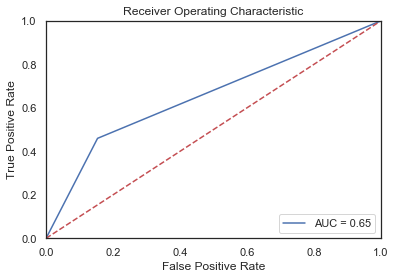

In [1274]:
target_names = ['0','1']
print(classification_report(y_test, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1275]:
cm = confusion_matrix(y_test, Y_pred)
cm

array([[6406, 1164],
       [ 208,  177]], dtype=int64)

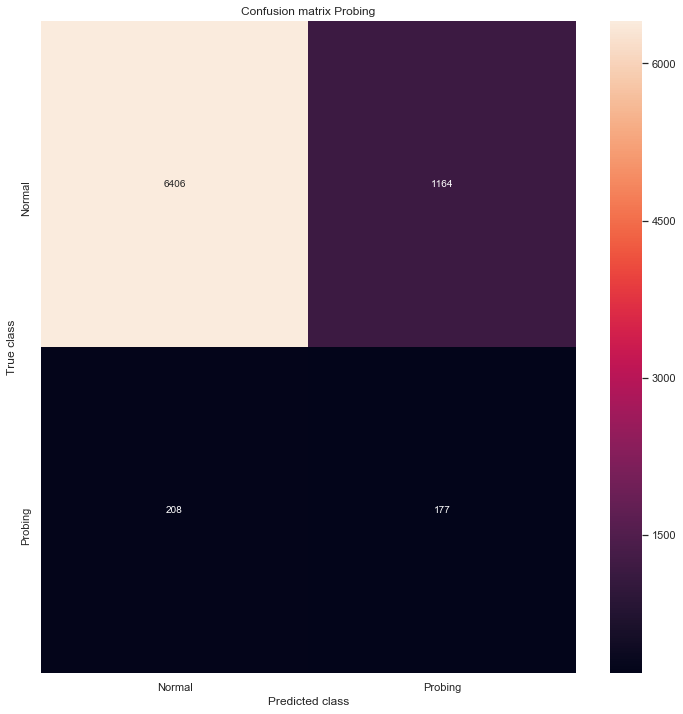

In [1276]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [1277]:
from scipy.misc import derivative

In [1278]:
## Focal Loss

def focal_loss_lgb(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	def fl(x,t):
		p = 1/(1+np.exp(-x))
		return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
	partial_fl = lambda x: fl(x, y_true)
	grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
	hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
	return grad, hess

def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	p = 1/(1+np.exp(-y_pred))
	loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
	return 'focal_loss', np.mean(loss), False

focal_loss = lambda x,y: focal_loss_lgb(x, y, 0.1, 5.)
eval_error = lambda x,y: focal_loss_lgb_eval_error(x, y, 0.1, 5.)

def lgbm_bay_focal(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'false',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    'scale_pos_weight':25 # because training data is extremely unbalanced 

    }
     evals_results = {}
     model_focal = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       fobj= focal_loss,
                       feval=eval_error,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       verbose_eval=False,
                       early_stopping_rounds=100)
     return model_focal.best_score['valid_0']['auc']

In [1279]:
## bayesian focal
 
bo_focal = BayesianOptimization(lgbm_bay_focal, params)
bo_focal.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7527   |  0.7701   |  21.56    |  0.7909   |  0.05062  |  360.5    |  7.85     |  62.83    |  53.78    |
|  2        |  0.7505   |  0.7714   |  23.41    |  0.7995   |  0.06672  |  390.3    |  7.13     |  60.8     |  58.72    |
|  3        |  0.7487   |  0.8751   |  23.1     |  0.7613   |  0.06342  |  349.7    |  7.761    |  66.01    |  53.66    |
|  4        |  0.7548   |  0.7967   |  24.93    |  0.7044   |  0.05518  |  331.3    |  7.46     |  61.48    |  56.36    |
|  5        |  0.7493   |  0.8326   |  24.18    |  0.7638   |  0.06365  |  366.4    |  7.856    |  69.09    |  53.4     |
|  6        |  0.752    |  0.7977   |  20.14    |  0.7862   |  0.04113  |  325.9    |  7.462    |  60.52    |  59.2     |
|  7        |  0.756    

In [1280]:
bo_focal.max['params']

{'bagging_fraction': 0.8951436866145446,
 'bagging_freq': 24.972166313746747,
 'feature_fraction': 0.7152727619415523,
 'learning_rate': 0.0532208233149019,
 'max_bin': 325.38008260401944,
 'max_depth': 7.954521975038804,
 'min_child_samples': 60.39438078541624,
 'num_leaves': 59.450148289561994}

In [1281]:
#'''
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    #'is_unbalance': 'true',
    'min_child_samples': 60,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.7152727619415523,
    'bagging_fraction': 0.8951436866145446,
    'bagging_freq': 25,
    'learning_rate': 0.053,
    'verbose': 0,
    'max_depth': 8,
    'max bin' : 325,
    'scale_pos_weight':25 # because training data is extremely unbalanced 


    
}
#'''
#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model_focal = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       fobj=focal_loss,
                       feval=eval_error,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.686948	valid_0's focal_loss: 0.0175667
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.692287	valid_0's focal_loss: 0.016547
[3]	valid_0's auc: 0.715691	valid_0's focal_loss: 0.0155908
[4]	valid_0's auc: 0.718092	valid_0's focal_loss: 0.0146949
[5]	valid_0's auc: 0.719705	valid_0's focal_loss: 0.0138554
[6]	valid_0's auc: 0.7261	valid_0's focal_loss: 0.0130678
[7]	valid_0's auc: 0.730961	valid_0's focal_loss: 0.01233
[8]	valid_0's auc: 0.731484	valid_0's focal_loss: 0.0116382
[9]	valid_0's auc: 0.732102	valid_0's focal_loss: 0.0109897
[10]	valid_0's auc: 0.735469	valid_0's focal_loss: 0.0103816
[11]	valid_0's auc: 0.735027	valid_0's focal_loss: 0.0098112
[12]	valid_0's auc: 0.733334	valid_0's focal_loss: 0.00927645
[13]	valid_0's auc: 0.731102	valid_0's focal_loss: 0.00877499
[14]	valid_0's auc: 0.733757	valid_0's focal_loss: 0.00830504
[15]	valid_0's auc: 0.735053	valid_0's focal_loss: 0.00786435
[16]	valid_0's auc: 0.733632	val

[139]	valid_0's auc: 0.754487	valid_0's focal_loss: 0.0015104
[140]	valid_0's auc: 0.754139	valid_0's focal_loss: 0.00151158
[141]	valid_0's auc: 0.754278	valid_0's focal_loss: 0.00151185
[142]	valid_0's auc: 0.754947	valid_0's focal_loss: 0.00151121
[143]	valid_0's auc: 0.755012	valid_0's focal_loss: 0.00151142
[144]	valid_0's auc: 0.754735	valid_0's focal_loss: 0.00151331
[145]	valid_0's auc: 0.755173	valid_0's focal_loss: 0.00151302
[146]	valid_0's auc: 0.754852	valid_0's focal_loss: 0.00151418
[147]	valid_0's auc: 0.754614	valid_0's focal_loss: 0.00151475
[148]	valid_0's auc: 0.754628	valid_0's focal_loss: 0.00151534
[149]	valid_0's auc: 0.754707	valid_0's focal_loss: 0.00151542
[150]	valid_0's auc: 0.755336	valid_0's focal_loss: 0.00151493
[151]	valid_0's auc: 0.755127	valid_0's focal_loss: 0.00151579
[152]	valid_0's auc: 0.755219	valid_0's focal_loss: 0.0015158
[153]	valid_0's auc: 0.754497	valid_0's focal_loss: 0.00151722
[154]	valid_0's auc: 0.754749	valid_0's focal_loss: 0.001

In [1283]:
Y_pred_fc=model_focal.predict(X_test, num_iteration=model_focal.best_iteration)

for i in range(0,len(Y_pred_fc)):
    if Y_pred_fc[i] > -0.8:       # setting threshold to .5
       Y_pred_fc[i]=1
    else:  
       Y_pred_fc[i]=0

              precision    recall  f1-score   support

           0        1.0       0.9       0.9      7570
           1        0.2       0.4       0.2       385

    accuracy                            0.9      7955
   macro avg        0.6       0.6       0.6      7955
weighted avg        0.9       0.9       0.9      7955


 ------------------------------------

ROC-AUC Score is ..: 0.6327643294618195
Log Loss Score is ..: 4.450392343177104


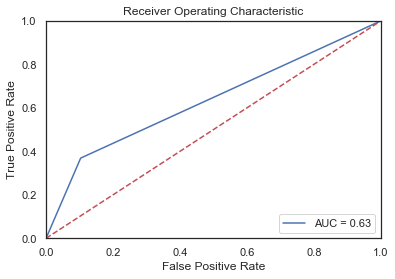

In [1284]:
target_names = ['0','1']
print(classification_report(y_test, Y_pred_fc, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test, Y_pred_fc))
print("Log Loss Score is ..:",log_loss(y_test, Y_pred_fc, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test, Y_pred_fc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1285]:
cm = confusion_matrix(y_test, Y_pred_fc)
cm

array([[6788,  782],
       [ 243,  142]], dtype=int64)

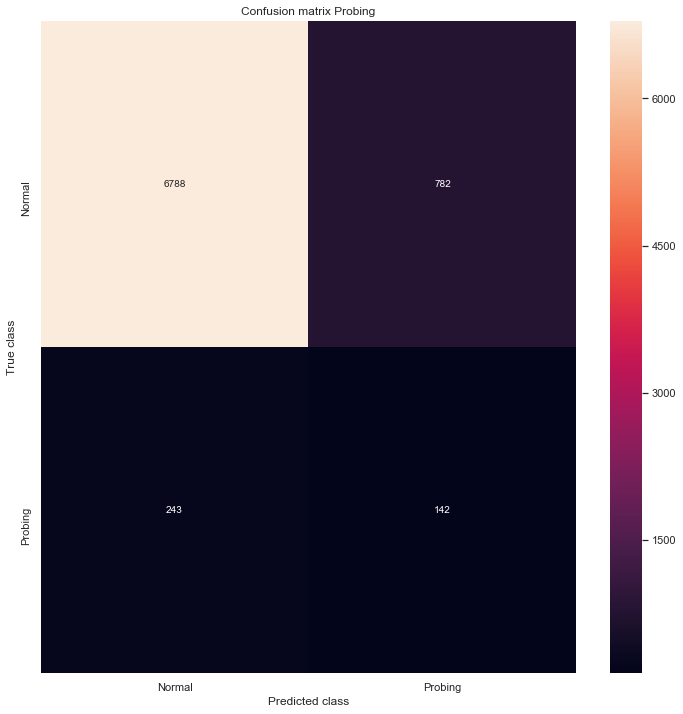

In [1286]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## UNDER SAMPLING

In [1318]:
# Class count
count_class_0, count_class_1 = df_no_corr.Good_Bad_Flag.value_counts()

# Divide by class
df_class_0 = df_no_corr[df_no_corr['Good_Bad_Flag'] == 0]
df_class_1 = df_no_corr[df_no_corr['Good_Bad_Flag'] == 1]

Random under-sampling:
1    1649
0    1649
Name: Good_Bad_Flag, dtype: int64


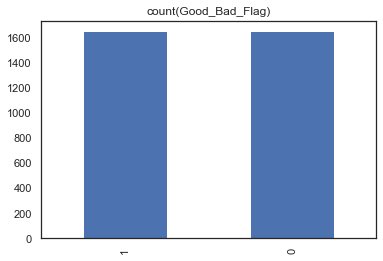

In [1319]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Good_Bad_Flag.value_counts())
df_test_under.Good_Bad_Flag.value_counts().plot(kind='bar',title = 'count(Good_Bad_Flag)')

In [1320]:
y = df_test_under['Good_Bad_Flag']
X = df_test_under.drop('Good_Bad_Flag', axis = 1)

In [1321]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
27570                                0                                 1   
16125                                0                                 1   
9107                                 0                                 1   
30386                                0                                11   
23712                                0                                11   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
27570                         -1                                0.000   
16125                         -1                              450.000   
9107                          -1                             1117.000   
30386                         -1                                  nan   
23712                         -1                                0.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
27570                                1                   nan   
16125                                7                   nan   
9107                                 5                   nan   
30386                                3                   nan   
23712                                1                27.000   

Description  TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
27570                               184                    A        1827.000   
16125                               154                    A         175.000   
9107                                104                    A           1.000   
30386                                 0                    A           2.000   
23712                                39                    A         955.000   

Description  TS Last Closed good account  ...  \
27570                             23.000  ...   
16125                              2.000  ...   
9107                               3.000  ...   
30386                             12.000  ...   
23712                              5.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
27570                                                nan   
16125                                                nan   
9107                                                 nan   
30386                                                nan   
23712                                                nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
27570                          nan                               2.000   
16125                        1.000                                 nan   
9107                           nan                                 nan   
30386                          nan                                 nan   
23712                          nan                                 nan   

Description  E Mail Given YN  OD_Pending Credit_YN  \
27570                     -1                    -1   
16125                     -1                    -1   
9107                      -1                    -1   
30386                     -1                    -1   
23712                     -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
27570                                        nan                           0   
16125                                        nan                           0   
9107                                         nan                           0   
30386                                        nan                           0   
23712                                        nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
27570                  -1                                -1   
16125                  -1                                -1   
9107                   -1                                -1   
30386                  -1                                -1   
23712           

In [1322]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                   -1   
1                                           1                   -1   
2                                           0                   -1   
3                                          11                   -1   
4                                           1                   -1   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4                      -1                                -1   

Description  CC Existing Customers i

In [1323]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  \
27570                        1                        0   
16125                        1                        0   
9107                         1                        0   
30386                        1                        0   
23712                        1                        0   

       Last Credit Decision__R  Residential Status__1.0  \
27570                        0                        1   
16125                        0                        1   
9107                         0                        1   
30386                        0                        0   
23712                        0                        1   

       Residential Status__2.0  Residential Status__3.0  \
27570                        0                        0   
16125                        0                        0   
9107                         0                        0   
30386                        0                        0   
23712                        0                        0   

       Residential Status__4.0  Residential Status__5.0  \
27570                        0                        0   
16125                        0                        0   
9107                         0                        0   
30386                        0                        0   
23712                        0                        0   

       Employment Field__1.0  Employment Field__2.0  ...  \
27570                      0                      0  ...   
16125                      0                      0  ...   
9107                       0                      0  ...   
30386                      0                      0  ...   
23712                      0                      0  ...   

       Employment Field__50.0  Employment Field__51.0  Employment Field__53.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__54.0  Employment Field__55.0  Employment Field__56.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__67.0  
27570                       0  
16125                       0  
9107                        0  
30386                       0  
23712                       0  

[5 rows x 62 columns]

In [1324]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
27570                          0                                 1   
16125                          0                                 1   
9107                           0                                 1   
30386                          0                                11   
23712                          0                                11   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
27570                   -1                                0.000   
16125                   -1                              450.000   
9107                    -1                             1117.000   
30386                   -1                                  nan   
23712                   -1                                0.000   

       LO Num of application_L6M  TS Last Legal Action  \
27570                          1                   nan   
16125                          7                   nan   
9107                           5                   nan   
30386                          3                   nan   
23712                          1                27.000   

       TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
27570                         184                    A        1827.000   
16125                         154                    A         175.000   
9107                          104                    A           1.000   
30386                           0                    A           2.000   
23712                          39                    A         955.000   

       TS Last Closed good account  ...  Employment Field__50.0  \
27570                       23.000  ...                       0   
16125                        2.000  ...                       0   
9107                         3.000  ...                       0   
30386                       12.000  ...                       0   
23712                        5.000  ...                       0   

       Employment Field__51.0  Employment Field__53.0  Employment Field__54.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__55.0  Employment Field__56.0  Employment Field__61.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__62.0  Employment Field__65.0  Employment Field__67.0  
27570                       0                       0                       0  
16125                       0                       0                       0  
9107                        0                       0                       0  
30386                       0                       0                       0  
23712                       0                       0                       0  

[5 rows x 105 columns]

In [1325]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
#numeric_columns.remove('Good_Bad_Flag')

scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
27570                      0.000                                 1   
16125                      0.000                                 1   
9107                       0.000                                 1   
30386                      0.000                                11   
23712                      0.000                                11   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
27570                   -1                                0.000   
16125                   -1                                0.009   
9107                    -1                                0.022   
30386                   -1                                  nan   
23712                   -1                                0.000   

       LO Num of application_L6M  TS Last Legal Action  \
27570                      0.007                   nan   
16125                      0.049                   nan   
9107                       0.035                   nan   
30386                      0.021                   nan   
23712                      0.007                 0.250   

       TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
27570                       0.543                    A           0.001   
16125                       0.454                    A           0.000   
9107                        0.307                    A           0.000   
30386                       0.000                    A           0.000   
23712                       0.115                    A           0.001   

       TS Last Closed good account  ...  Employment Field__50.0  \
27570                        0.383  ...                       0   
16125                        0.033  ...                       0   
9107                         0.050  ...                       0   
30386                        0.200  ...                       0   
23712                        0.083  ...                       0   

       Employment Field__51.0  Employment Field__53.0  Employment Field__54.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__55.0  Employment Field__56.0  Employment Field__61.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__62.0  Employment Field__65.0  Employment Field__67.0  
27570                       0                       0                       0  
16125                       0                       0                       0  
9107                        0                       0                       0  
30386                       0                       0                       0  
23712                       0                       0                       0  

[5 rows x 105 columns]

In [1326]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [1327]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(3298, 102)

In [1328]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
27570                      0.000                                 1   
16125                      0.000                                 1   
9107                       0.000                                 1   
30386                      0.000                                11   
23712                      0.000                                11   

       Any Legal Action YN  Existing Credit Card Previous Limit  \
27570                   -1                                0.000   
16125                   -1                                0.009   
9107                    -1                                0.022   
30386                   -1                               -1.000   
23712                   -1                                0.000   

       LO Num of application_L6M  TS Last Legal Action  \
27570                      0.007                -1.000   
16125                      0.049                -1.000   
9107                       0.035                -1.000   
30386                      0.021                -1.000   
23712                      0.007                 0.250   

       TS Oldest Open Credit Card  Total Assets_3  \
27570                       0.543           0.001   
16125                       0.454           0.000   
9107                        0.307           0.000   
30386                       0.000           0.000   
23712                       0.115           0.001   

       TS Last Closed good account  CC Num of application_L6M  ...  \
27570                        0.383                      0.000  ...   
16125                        0.033                      0.000  ...   
9107                         0.050                      0.040  ...   
30386                        0.200                      0.000  ...   
23712                        0.083                      0.000  ...   

       Employment Field__50.0  Employment Field__51.0  Employment Field__53.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__54.0  Employment Field__55.0  Employment Field__56.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__67.0  
27570                       0  
16125                       0  
9107                        0  
30386                       0  
23712                       0  

[5 rows x 102 columns]

In [1329]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [1330]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1331]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2539, 102), (759, 102), (2539,), (759,))

In [1332]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

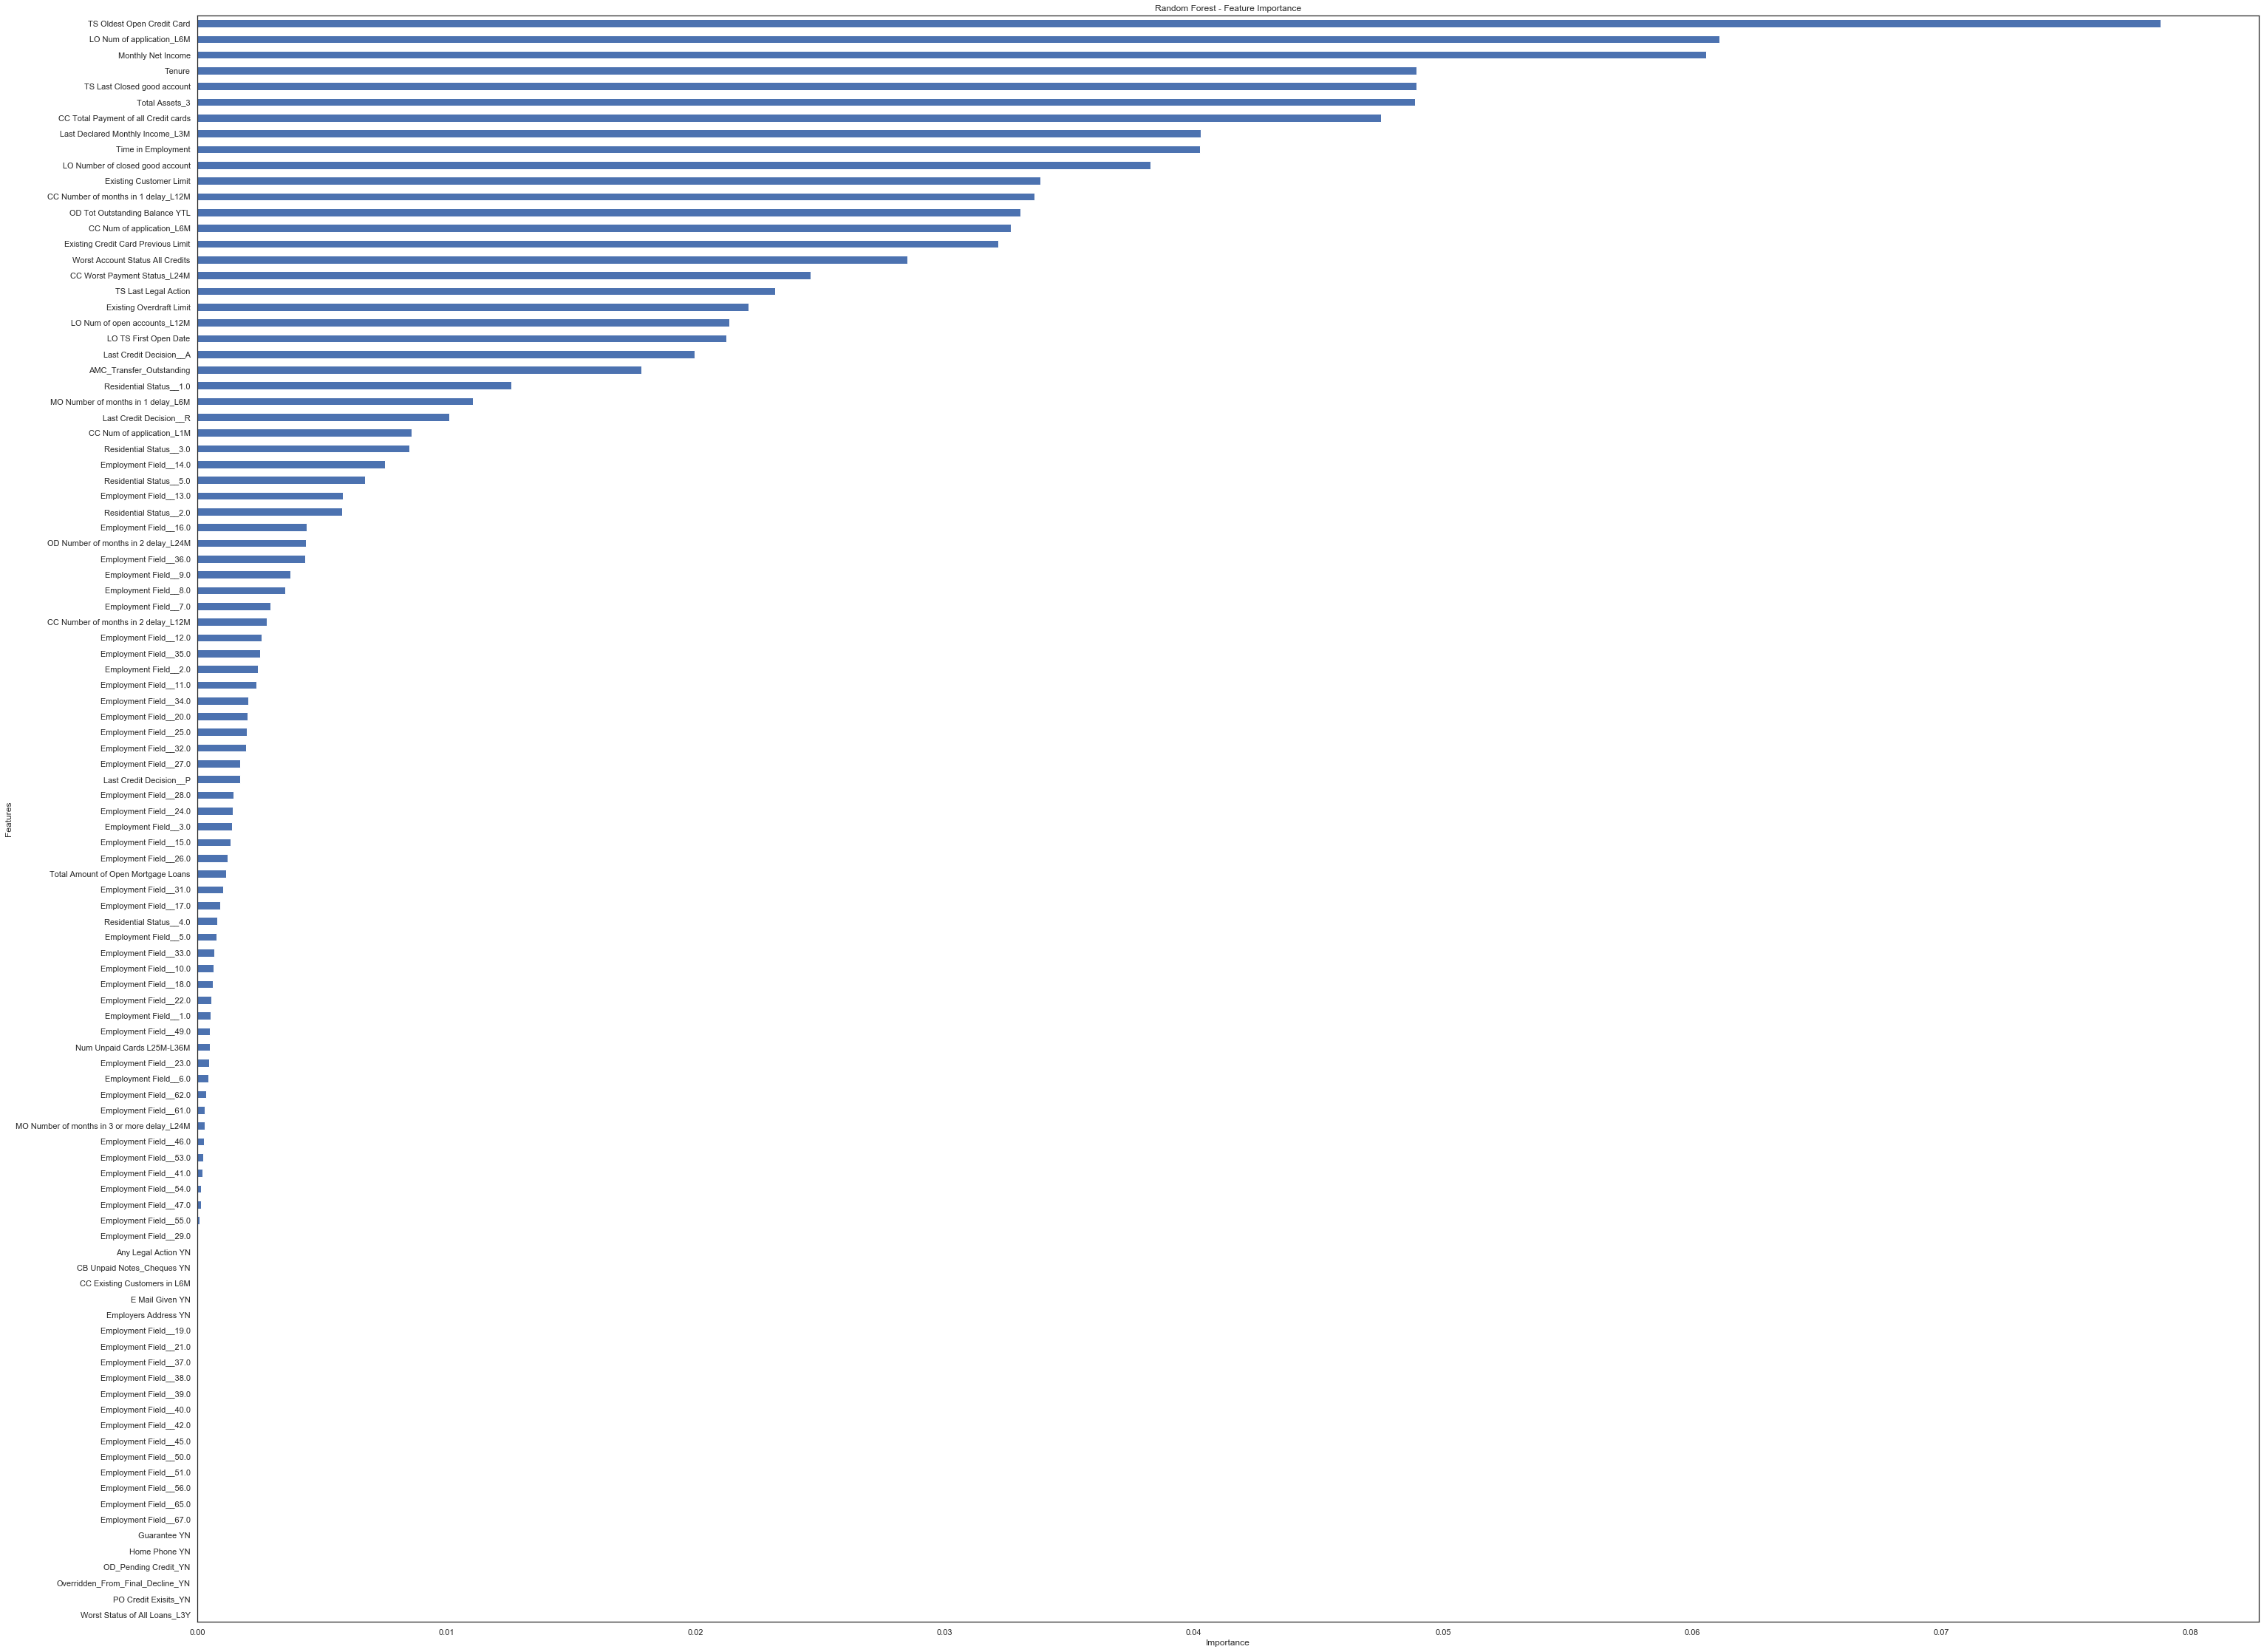

In [1333]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1334]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                               col
29  0.000     Worst Status of All Loans_L3Y
26  0.000              PO Credit Exisits_YN
38  0.000  Overridden_From_Final_Decline_YN
34  0.000              OD_Pending Credit_YN
10  0.000                     Home Phone YN
37  0.000                      Guarantee YN
101 0.000            Employment Field__67.0
100 0.000            Employment Field__65.0
97  0.000            Employment Field__56.0
93  0.000            Employment Field__51.0
92  0.000            Employment Field__50.0
88  0.000            Employment Field__45.0
87  0.000            Employment Field__42.0
85  0.000            Employment Field__40.0
84  0.000            Employment Field__39.0
83  0.000            Employment Field__38.0
82  0.000            Employment Field__37.0
67  0.000            Employment Field__21.0
65  0.000            Employment Field__19.0
11  0.000              Employers Address YN
33  0.000                   E Mail Given YN
39  0.000      CC Existing Customers in L6M
28  0.000        CB Unpaid Notes_Cheques YN
2   0.000               Any Legal Action YN
75  0.000            Employment Field__29.0

In [1335]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
27570                      0.000                                 1   
16125                      0.000                                 1   
9107                       0.000                                 1   
30386                      0.000                                11   
23712                      0.000                                11   

       Existing Credit Card Previous Limit  LO Num of application_L6M  \
27570                                0.000                      0.007   
16125                                0.009                      0.049   
9107                                 0.022                      0.035   
30386                               -1.000                      0.021   
23712                                0.000                      0.007   

       TS Last Legal Action  TS Oldest Open Credit Card  Total Assets_3  \
27570                -1.000                       0.543           0.001   
16125                -1.000                       0.454           0.000   
9107                 -1.000                       0.307           0.000   
30386                -1.000                       0.000           0.000   
23712                 0.250                       0.115           0.001   

       TS Last Closed good account  CC Num of application_L6M  \
27570                        0.383                      0.000   
16125                        0.033                      0.000   
9107                         0.050                      0.040   
30386                        0.200                      0.000   
23712                        0.083                      0.000   

       AMC_Transfer_Outstanding  ...  Employment Field__36.0  \
27570                     0.000  ...                       0   
16125                     0.000  ...                       0   
9107                      0.000  ...                       0   
30386                     0.000  ...                       0   
23712                     0.000  ...                       1   

       Employment Field__41.0  Employment Field__46.0  Employment Field__47.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__49.0  Employment Field__53.0  Employment Field__54.0  \
27570                       0                       0                       0   
16125                       0                       0                       0   
9107                        0                       0                       0   
30386                       0                       0                       0   
23712                       0                       0                       0   

       Employment Field__55.0  Employment Field__61.0  Employment Field__62.0  
27570                       0                       0                       0  
16125                       0                       0                       0  
9107                        0                       0                       0  
30386                       0                       0                       0  
23712                       0                       0                       0  

[5 rows x 77 columns]

In [1336]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [1337]:
train_data = lgb.Dataset(X_train_under, label=y_train_under, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test_under, label=y_test_under)

In [1338]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.652402
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.724774
[3]	valid_0's auc: 0.732156
[4]	valid_0's auc: 0.727575
[5]	valid_0's auc: 0.744132
[6]	valid_0's auc: 0.748029
[7]	valid_0's auc: 0.746475
[8]	valid_0's auc: 0.749036
[9]	valid_0's auc: 0.751186
[10]	valid_0's auc: 0.752327
[11]	valid_0's auc: 0.755332
[12]	valid_0's auc: 0.760185
[13]	valid_0's auc: 0.757061
[14]	valid_0's auc: 0.758789
[15]	valid_0's auc: 0.761766
[16]	valid_0's auc: 0.763199
[17]	valid_0's auc: 0.762256
[18]	valid_0's auc: 0.763264
[19]	valid_0's auc: 0.763624
[20]	valid_0's auc: 0.76514
[21]	valid_0's auc: 0.763319
[22]	valid_0's auc: 0.765593
[23]	valid_0's auc: 0.763254
[24]	valid_0's auc: 0.767183
[25]	valid_0's auc: 0.768496
[26]	valid_0's auc: 0.769106
[27]	valid_0's auc: 0.7687
[28]	valid_0's auc: 0.769883
[29]	valid_0's auc: 0.767942
[30]	valid_0's auc: 0.76808
[31]	valid_0's auc: 0.768524
[32]	valid_0's auc: 0.767812
[33]	valid_0's auc: 0.

In [1339]:
model.best_iteration

100

In [1340]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [1341]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [1342]:
from scipy.misc import derivative

In [1343]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.789    |  0.8513   |  21.55    |  0.7519   |  0.05376  |  325.5    |  7.081    |  61.34    |  52.29    |
|  2        |  0.7826   |  0.8765   |  24.99    |  0.7968   |  0.04616  |  341.0    |  7.77     |  61.27    |  55.72    |
|  3        |  0.7871   |  0.7914   |  23.15    |  0.717    |  0.06578  |  344.4    |  7.354    |  66.95    |  58.55    |
|  4        |  0.7922   |  0.7256   |  22.83    |  0.7075   |  0.06787  |  333.1    |  7.649    |  67.46    |  59.71    |
|  5        |  0.7883   |  0.8349   |  24.06    |  0.7771   |  0.05425  |  350.6    |  7.77     |  62.23    |  50.38    |
|  6        |  0.7886   |  0.7038   |  24.5     |  0.753    |  0.05843  |  326.3    |  7.387    |  69.83    |  50.28    |
|  7        |  0.7794   

In [1344]:
bo.max['params']

{'bagging_fraction': 0.7256427983110652,
 'bagging_freq': 22.826188452349932,
 'feature_fraction': 0.7074862648137876,
 'learning_rate': 0.06786681383145521,
 'max_bin': 333.11978642839824,
 'max_depth': 7.6494925074212325,
 'min_child_samples': 67.46178168912316,
 'num_leaves': 59.706568016173804}

In [1348]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 67,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 60,
    'feature_fraction': 0.7074862648137876,
    'bagging_fraction': 0.7256427983110652,
    'bagging_freq': 23,
    'learning_rate': 0.06786681383145521,
    'verbose': 0,
    'max_depth': 8,
    'max_bin' : 333,
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.716209
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.752799
[3]	valid_0's auc: 0.758327
[4]	valid_0's auc: 0.766624
[5]	valid_0's auc: 0.765413
[6]	valid_0's auc: 0.759825
[7]	valid_0's auc: 0.763278
[8]	valid_0's auc: 0.761461
[9]	valid_0's auc: 0.760255
[10]	valid_0's auc: 0.761077
[11]	valid_0's auc: 0.756658
[12]	valid_0's auc: 0.759963
[13]	valid_0's auc: 0.756695
[14]	valid_0's auc: 0.756695
[15]	valid_0's auc: 0.758077
[16]	valid_0's auc: 0.761267
[17]	valid_0's auc: 0.764077
[18]	valid_0's auc: 0.762385
[19]	valid_0's auc: 0.761766
[20]	valid_0's auc: 0.763181
[21]	valid_0's auc: 0.765834
[22]	valid_0's auc: 0.768043
[23]	valid_0's auc: 0.76723
[24]	valid_0's auc: 0.768385
[25]	valid_0's auc: 0.767368
[26]	valid_0's auc: 0.767415
[27]	valid_0's auc: 0.766416
[28]	valid_0's auc: 0.76661
[29]	valid_0's auc: 0.76722
[30]	valid_0's auc: 0.767729
[31]	valid_0's auc: 0.767294
[32]	valid_0's auc: 0.767516
[33]	valid_0's auc: 0

[286]	valid_0's auc: 0.777584
[287]	valid_0's auc: 0.777131
[288]	valid_0's auc: 0.776715
[289]	valid_0's auc: 0.776317
[290]	valid_0's auc: 0.776252
[291]	valid_0's auc: 0.776419
[292]	valid_0's auc: 0.776215
[293]	valid_0's auc: 0.775642
[294]	valid_0's auc: 0.775883
[295]	valid_0's auc: 0.775938
[296]	valid_0's auc: 0.77604
[297]	valid_0's auc: 0.776271
[298]	valid_0's auc: 0.776474
[299]	valid_0's auc: 0.776105
[300]	valid_0's auc: 0.776354
[301]	valid_0's auc: 0.77665
[302]	valid_0's auc: 0.777029
[303]	valid_0's auc: 0.777658
[304]	valid_0's auc: 0.778194
[305]	valid_0's auc: 0.778591
[306]	valid_0's auc: 0.77861
[307]	valid_0's auc: 0.778443
[308]	valid_0's auc: 0.778545
[309]	valid_0's auc: 0.778665
[310]	valid_0's auc: 0.778591
[311]	valid_0's auc: 0.778665
[312]	valid_0's auc: 0.778434
[313]	valid_0's auc: 0.778203
[314]	valid_0's auc: 0.778564
[315]	valid_0's auc: 0.778527
[316]	valid_0's auc: 0.779368
[317]	valid_0's auc: 0.779839
[318]	valid_0's auc: 0.779691
[319]	valid_0

In [1350]:
Y_pred=model.predict(X_test_under, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i]>=.55:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

              precision    recall  f1-score   support

           0        0.7       0.8       0.7       357
           1        0.7       0.7       0.7       303

    accuracy                            0.7       660
   macro avg        0.7       0.7       0.7       660
weighted avg        0.7       0.7       0.7       660


 ------------------------------------

ROC-AUC Score is ..: 0.7093352192362092
Log Loss Score is ..: 9.890752582454068


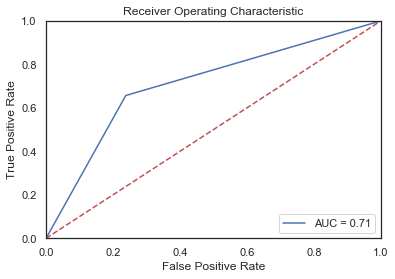

In [1351]:
target_names = ['0','1']
print(classification_report(y_test_under, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_under, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test_under, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_under, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1352]:
cm = confusion_matrix(y_test_under, Y_pred)
cm

array([[272,  85],
       [104, 199]], dtype=int64)

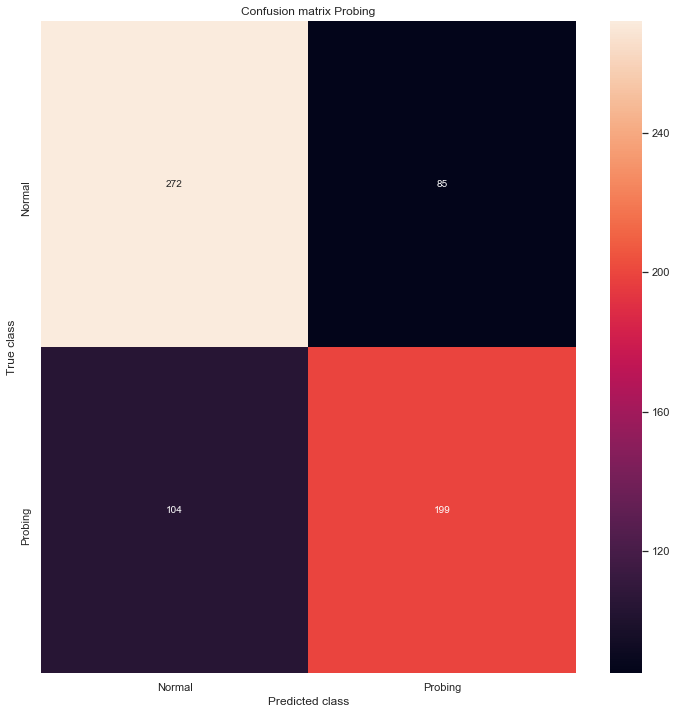

In [1353]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

              precision    recall  f1-score   support

           0        0.7       0.7       0.7       357
           1        0.6       0.7       0.7       303

    accuracy                            0.7       660
   macro avg        0.7       0.7       0.7       660
weighted avg        0.7       0.7       0.7       660


 ------------------------------------

ROC-AUC Score is ..: 0.6825165709848295
Log Loss Score is ..: 11.042091166378892


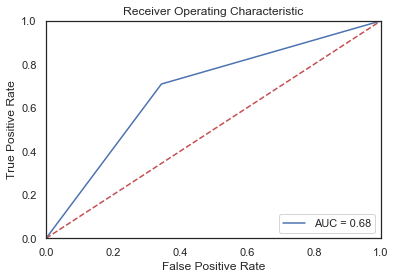

0.6803030303030303


array([[234,  88],
       [123, 215]], dtype=int64)

In [1354]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_under,y_train_under)
ylr_under_pred = lr.predict(X_test_under)

target_names = ['0','1']
print(classification_report(y_test_under, ylr_under_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_under, ylr_under_pred))
print("Log Loss Score is ..:",log_loss(y_test_under, ylr_under_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_under, ylr_under_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acuuracy_score = accuracy_score(ylr_under_pred,y_test_under)
print(acuuracy_score) 
cm = confusion_matrix(ylr_under_pred,y_test_under)
cm

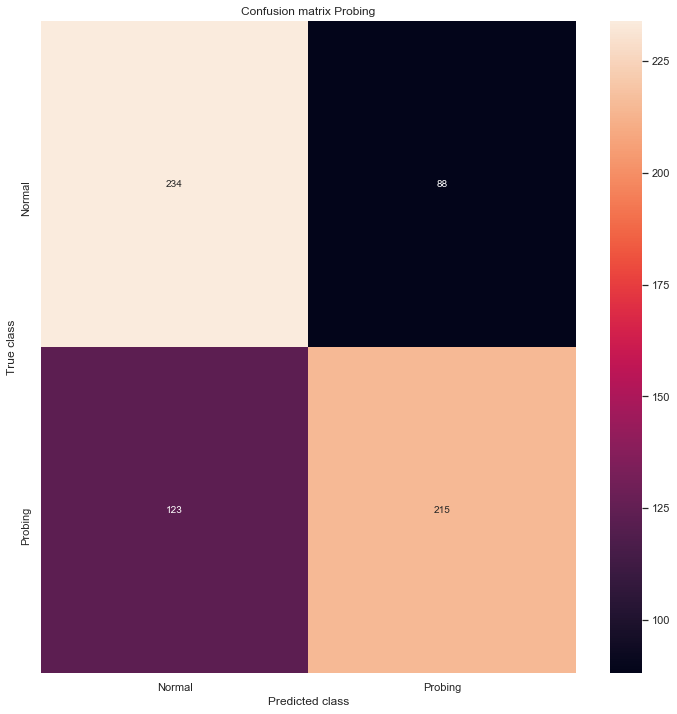

In [1355]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## OVER SAMPLING

Random over-sampling:
1    32935
0    32935
Name: Good_Bad_Flag, dtype: int64


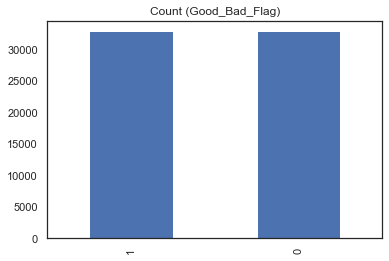

In [1356]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Good_Bad_Flag.value_counts())

df_test_over.Good_Bad_Flag.value_counts().plot(kind='bar', title='Count (Good_Bad_Flag)');

In [1357]:
y = df_test_over['Good_Bad_Flag']
X = df_test_over.drop('Good_Bad_Flag', axis = 1)

In [1358]:
X.head()

Description  CC Num of application_L1M  Worst Account Status All Credits  \
0                                    0                                11   
1                                    0                                 1   
2                                    0                                 0   
4                                    0                                 1   
5                                    1                                 1   

Description  Any Legal Action YN  Existing Credit Card Previous Limit  \
0                             -1                             1750.000   
1                             -1                             1300.000   
2                             -1                                0.000   
4                             -1                             6250.000   
5                             -1                                0.000   

Description  LO Num of application_L6M  TS Last Legal Action  \
0                                    1                36.000   
1                                   12                   nan   
2                                    0                   nan   
4                                    0                   nan   
5                                    3                   nan   

Description  TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                                    86                    A         888.000   
1                                    13                    R          20.000   
2                                   274                    A         511.000   
4                                   126                    A          32.000   
5                                   139                    A          35.000   

Description  TS Last Closed good account  ...  \
0                                  4.000  ...   
1                                  4.000  ...   
2                                  0.000  ...   
4                                  8.000  ...   
5                                  1.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
4                                                    nan   
5                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
4                              nan                               0.000   
5                            7.000                                 nan   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
4                         -1                    -1   
5                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
4                                            nan                           0   
5                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
4                      -1                                -1   
5               

In [1359]:
df_no_corr.head()

Description  Good_Bad_Flag  CC Num of application_L1M  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        1                          0   
4                        0                          0   

Description  Worst Account Status All Credits  Any Legal Action YN  \
0                                          11                   -1   
1                                           1                   -1   
2                                           0                   -1   
3                                          11                   -1   
4                                           1                   -1   

Description  Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                       1750.000                          1   
1                                       1300.000                         12   
2                                          0.000                          0   
3                                        800.000                          3   
4                                       6250.000                          0   

Description  TS Last Legal Action  TS Oldest Open Credit Card  \
0                          36.000                          86   
1                             nan                          13   
2                             nan                         274   
3                          37.000                           6   
4                             nan                         126   

Description Last Credit Decision  Total Assets_3  ...  \
0                              A         888.000  ...   
1                              R          20.000  ...   
2                              A         511.000  ...   
3                              A           0.000  ...   
4                              A          32.000  ...   

Description  MO Number of months in 3 or more delay_L24M  \
0                                                    nan   
1                                                    nan   
2                                                    nan   
3                                                    nan   
4                                                    nan   

Description  LO TS First Open Date  MO Number of months in 1 delay_L6M  \
0                            5.000                                 nan   
1                           15.000                                 nan   
2                              nan                                 nan   
3                              nan                                 nan   
4                              nan                               0.000   

Description  E Mail Given YN  OD_Pending Credit_YN  \
0                         -1                    -1   
1                         -1                    -1   
2                         -1                    -1   
3                         -1                    -1   
4                         -1                    -1   

Description  CC Number of months in 2 delay_L12M  Num Unpaid Cards L25M-L36M  \
0                                            nan                           0   
1                                            nan                           0   
2                                            nan                           0   
3                                            nan                           0   
4                                            nan                           0   

Description  Guarantee YN  Overridden_From_Final_Decline_YN  \
0                      -1                                -1   
1                      -1                                -1   
2                      -1                                -1   
3                      -1                                -1   
4                      -1                                -1   

Description  CC Existing Customers i

In [1360]:
#CREATE DUMMIFICATION
dummy = pd.get_dummies(X[one_hot], prefix_sep="__",
                              columns=one_hot)
dummy.head()

Last Credit Decision__A  Last Credit Decision__P  Last Credit Decision__R  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
4                        1                        0                        0   
5                        1                        0                        0   

   Residential Status__1.0  Residential Status__2.0  Residential Status__3.0  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
4                        0                        0                        0   
5                        1                        0                        0   

   Residential Status__4.0  Residential Status__5.0  Employment Field__1.0  \
0                        0                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
4                        0                        0                      0   
5                        0                        0                      0   

   Employment Field__2.0  ...  Employment Field__56.0  Employment Field__58.0  \
0                      0  ...                       0                       0   
1                      0  ...                       0                       0   
2                      0  ...                       0                       0   
4                      0  ...                       0                       0   
5                      0  ...                       0                       0   

   Employment Field__59.0  Employment Field__60.0  Employment Field__61.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__62.0  Employment Field__65.0  Employment Field__66.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__67.0  Employment Field__68.0  
0                       0                       0  
1                       0                       0  
2                       0                       0  
4                       0                       0  
5                       0                       0  

[5 rows x 71 columns]

In [1361]:
# ADD CATEGORRIC ENCODED COLUMNS AT THE END OF DATASET
X = pd.concat([X,dummy],axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                          0                                11   
1                          0                                 1   
2                          0                                 0   
4                          0                                 1   
5                          1                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                             1750.000   
1                   -1                             1300.000   
2                   -1                                0.000   
4                   -1                             6250.000   
5                   -1                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                          1                36.000   
1                         12                   nan   
2                          0                   nan   
4                          0                   nan   
5                          3                   nan   

   TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                          86                    A         888.000   
1                          13                    R          20.000   
2                         274                    A         511.000   
4                         126                    A          32.000   
5                         139                    A          35.000   

   TS Last Closed good account  ...  Employment Field__56.0  \
0                        4.000  ...                       0   
1                        4.000  ...                       0   
2                        0.000  ...                       0   
4                        8.000  ...                       0   
5                        1.000  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 114 columns]

In [1362]:
#DEATURE SCLING WITH STANDARD SCALER
from sklearn.preprocessing import MinMaxScaler
#numeric_columns.remove('Good_Bad_Flag')

scaler = MinMaxScaler()
X[numeric_columns]= scaler.fit_transform(X[numeric_columns]) #not cover categoric columns
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                                0.022   
1                   -1                                0.016   
2                   -1                                0.000   
4                   -1                                0.078   
5                   -1                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                   nan   
2                      0.000                   nan   
4                      0.000                   nan   
5                      0.013                   nan   

   TS Oldest Open Credit Card Last Credit Decision  Total Assets_3  \
0                       0.246                    A           0.000   
1                       0.037                    R           0.000   
2                       0.783                    A           0.000   
4                       0.360                    A           0.000   
5                       0.397                    A           0.000   

   TS Last Closed good account  ...  Employment Field__56.0  \
0                        0.066  ...                       0   
1                        0.066  ...                       0   
2                        0.000  ...                       0   
4                        0.131  ...                       0   
5                        0.016  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 114 columns]

In [1363]:
## FILL ALL OTHER EMPTY CELL AS --> -1 WHICH MEANS NOT APPLICABLE
X = X.fillna(-1)

In [1364]:
#remove initial categoric column and leave it only encoded columns
X = X.drop(X[one_hot],axis=1)
X.shape

(65870, 111)

In [1365]:
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Any Legal Action YN  Existing Credit Card Previous Limit  \
0                   -1                                0.022   
1                   -1                                0.016   
2                   -1                                0.000   
4                   -1                                0.078   
5                   -1                                0.000   

   LO Num of application_L6M  TS Last Legal Action  \
0                      0.004                 0.164   
1                      0.052                -1.000   
2                      0.000                -1.000   
4                      0.000                -1.000   
5                      0.013                -1.000   

   TS Oldest Open Credit Card  Total Assets_3  TS Last Closed good account  \
0                       0.246           0.000                        0.066   
1                       0.037           0.000                        0.066   
2                       0.783           0.000                        0.000   
4                       0.360           0.000                        0.131   
5                       0.397           0.000                        0.016   

   CC Num of application_L6M  ...  Employment Field__56.0  \
0                      0.000  ...                       0   
1                      0.000  ...                       0   
2                      0.000  ...                       0   
4                      0.000  ...                       0   
5                      0.022  ...                       0   

   Employment Field__58.0  Employment Field__59.0  Employment Field__60.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__61.0  Employment Field__62.0  Employment Field__65.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__66.0  Employment Field__67.0  Employment Field__68.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 111 columns]

In [1366]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [1367]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [1368]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50719, 111), (15151, 111), (50719,), (15151,))

In [1369]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

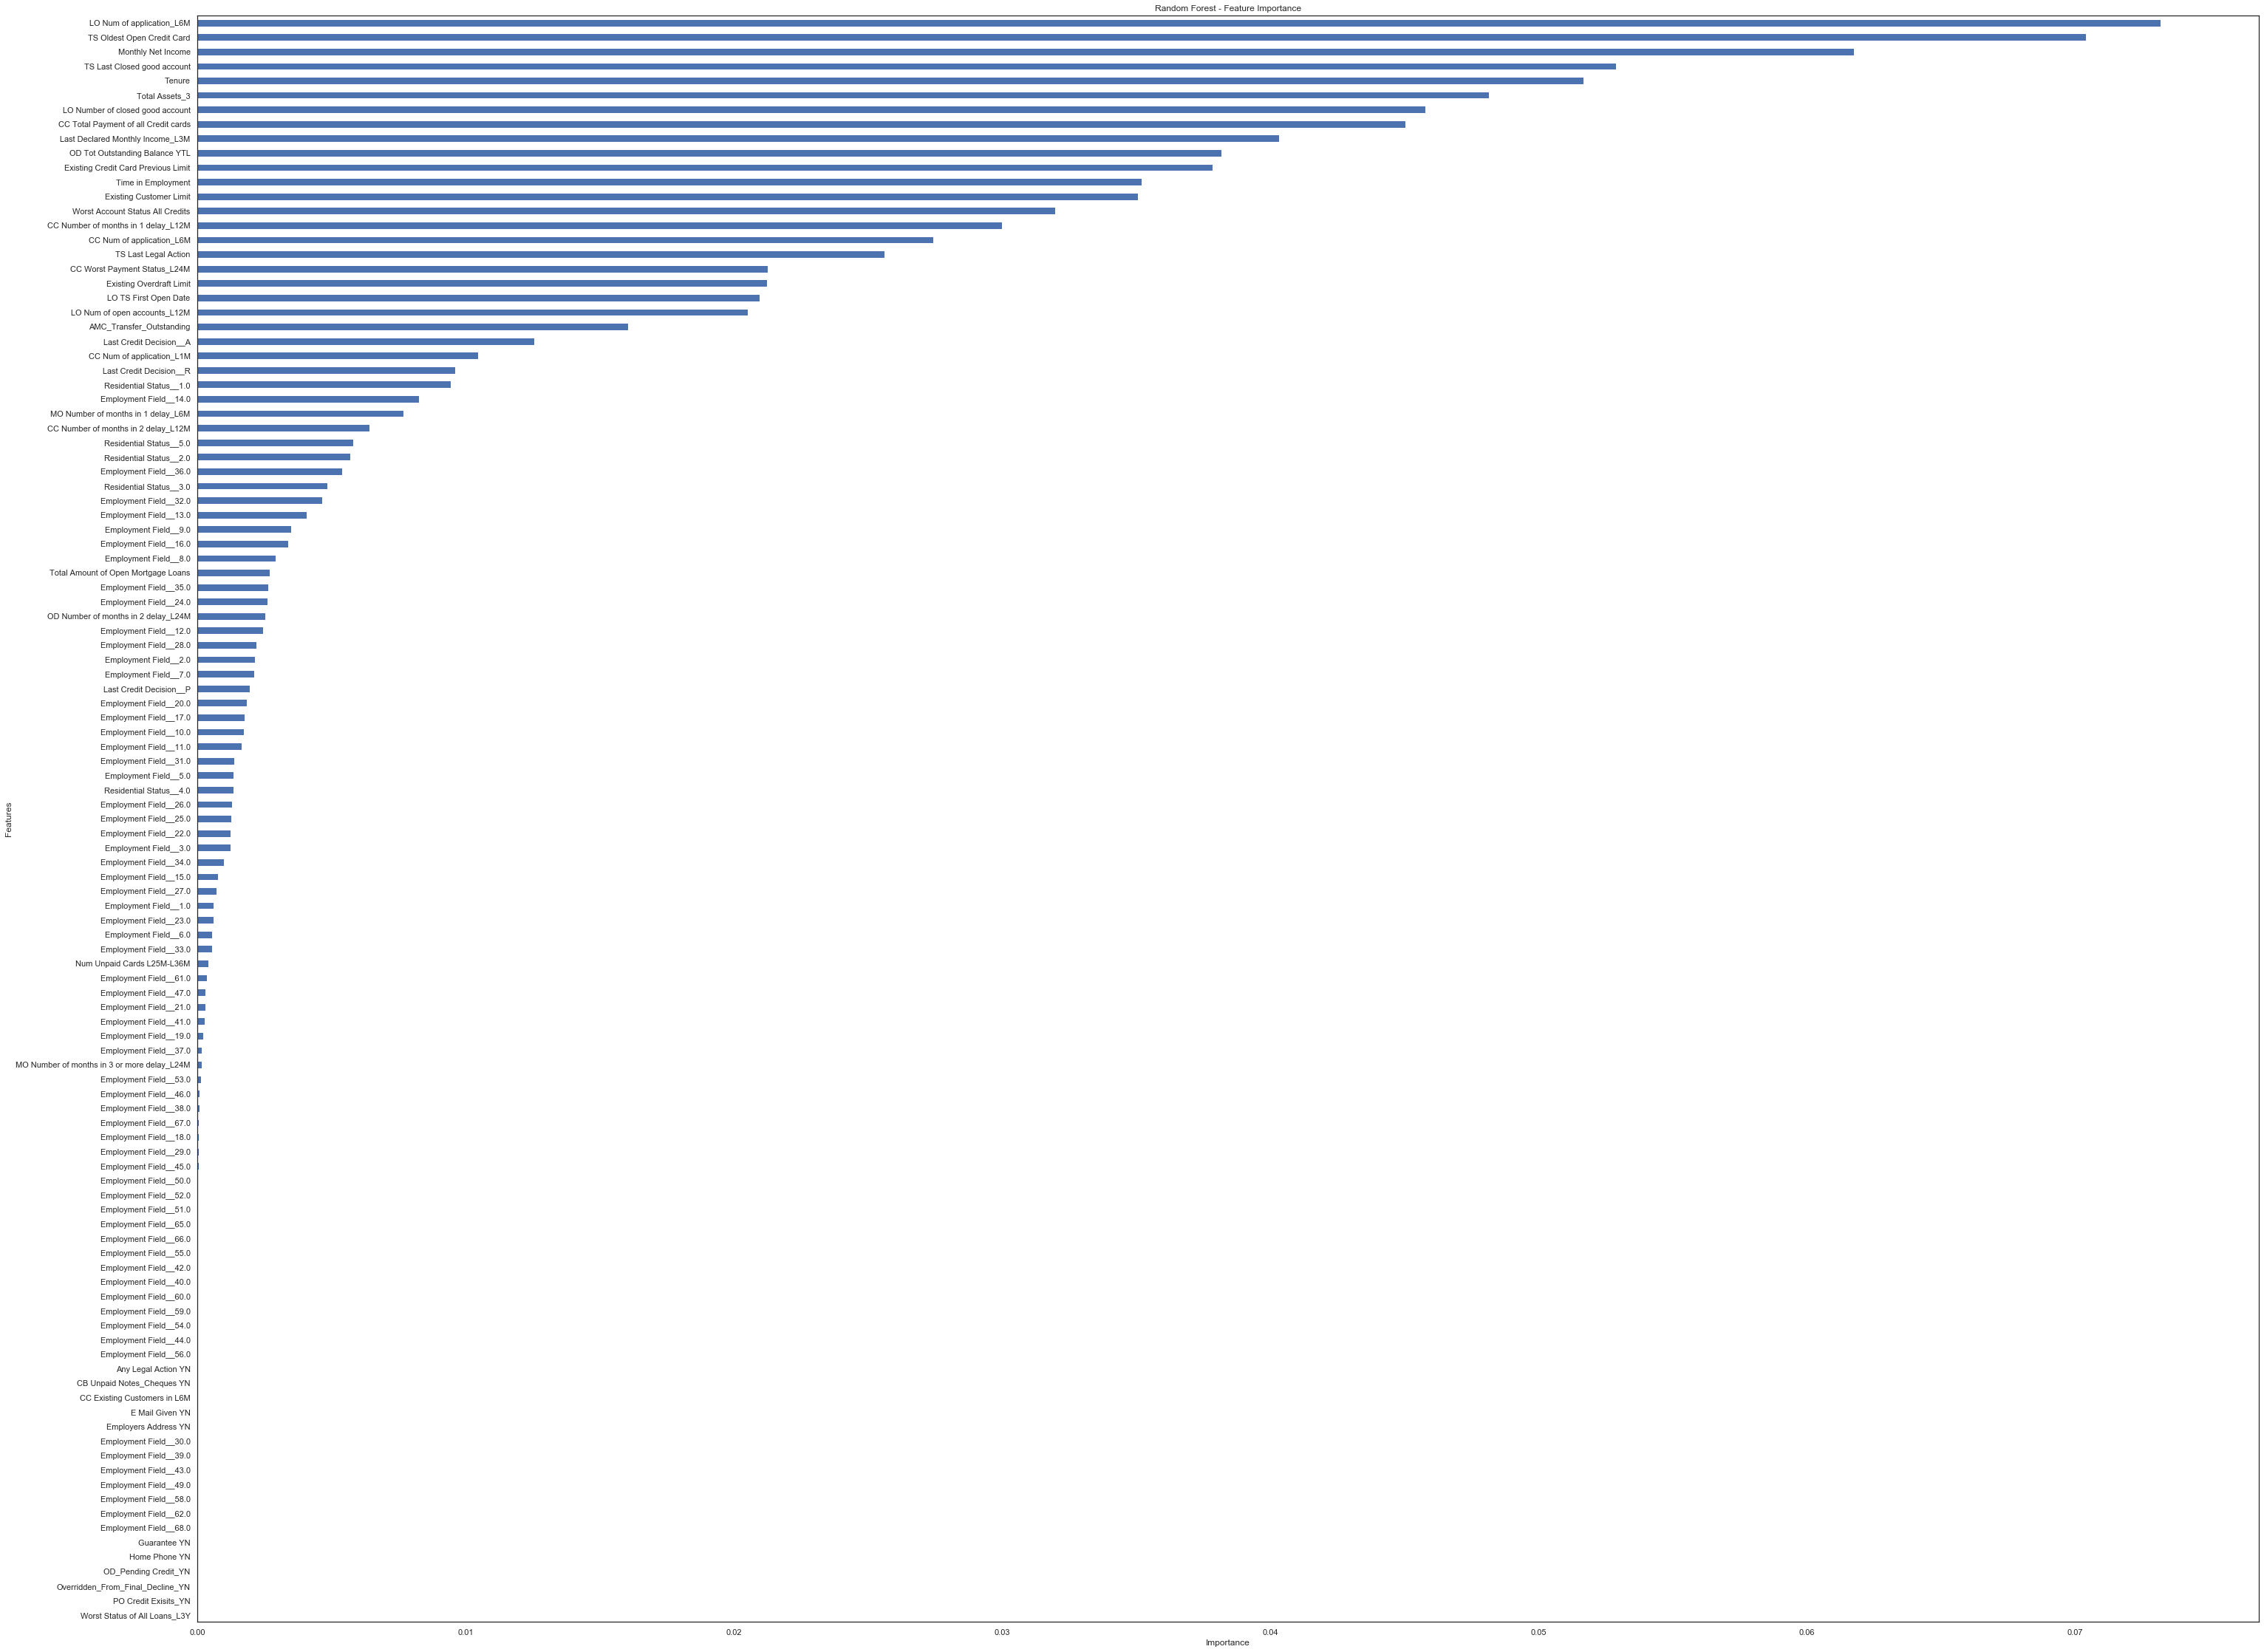

In [1370]:
fea_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(50, 40), legend=None)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [1371]:
drop = fea_imp[fea_imp['imp'] < 0.00001]
drop

imp                               col
29  0.000     Worst Status of All Loans_L3Y
26  0.000              PO Credit Exisits_YN
38  0.000  Overridden_From_Final_Decline_YN
34  0.000              OD_Pending Credit_YN
10  0.000                     Home Phone YN
37  0.000                      Guarantee YN
110 0.000            Employment Field__68.0
106 0.000            Employment Field__62.0
102 0.000            Employment Field__58.0
94  0.000            Employment Field__49.0
89  0.000            Employment Field__43.0
85  0.000            Employment Field__39.0
76  0.000            Employment Field__30.0
11  0.000              Employers Address YN
33  0.000                   E Mail Given YN
39  0.000      CC Existing Customers in L6M
28  0.000        CB Unpaid Notes_Cheques YN
2   0.000               Any Legal Action YN
101 0.000            Employment Field__56.0
90  0.000            Employment Field__44.0
99  0.000            Employment Field__54.0
103 0.000            Employment Field__59.0
104 0.000            Employment Field__60.0

In [1372]:
X = X.drop(drop.col, axis=1)
X.head()

CC Num of application_L1M  Worst Account Status All Credits  \
0                      0.000                                11   
1                      0.000                                 1   
2                      0.000                                 0   
4                      0.000                                 1   
5                      0.091                                 1   

   Existing Credit Card Previous Limit  LO Num of application_L6M  \
0                                0.022                      0.004   
1                                0.016                      0.052   
2                                0.000                      0.000   
4                                0.078                      0.000   
5                                0.000                      0.013   

   TS Last Legal Action  TS Oldest Open Credit Card  Total Assets_3  \
0                 0.164                       0.246           0.000   
1                -1.000                       0.037           0.000   
2                -1.000                       0.783           0.000   
4                -1.000                       0.360           0.000   
5                -1.000                       0.397           0.000   

   TS Last Closed good account  CC Num of application_L6M  \
0                        0.066                      0.000   
1                        0.066                      0.000   
2                        0.000                      0.000   
4                        0.131                      0.000   
5                        0.016                      0.022   

   AMC_Transfer_Outstanding  ...  Employment Field__47.0  \
0                     0.000  ...                       0   
1                     0.000  ...                       0   
2                     0.000  ...                       0   
4                     0.000  ...                       0   
5                     0.000  ...                       0   

   Employment Field__50.0  Employment Field__51.0  Employment Field__52.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__53.0  Employment Field__55.0  Employment Field__61.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
4                       0                       0                       0   
5                       0                       0                       0   

   Employment Field__65.0  Employment Field__66.0  Employment Field__67.0  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
4                       0                       0                       0  
5                       0                       0                       0  

[5 rows x 88 columns]

In [1373]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [1374]:
train_data = lgb.Dataset(X_train_over, label=y_train_over, feature_name=X.columns.to_list())
test_data = lgb.Dataset(X_test_over, label=y_test_over)

In [1375]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 50,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 70,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'learning_rate': 0.05,
    'verbose': 0,
    'max_depth': 6,
    'max bin' : 350,

    
}

#lgb.cv(param, train_data, num_round, nfold=5)

evals_results = {}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=200)

[1]	valid_0's auc: 0.700228
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.749195
[3]	valid_0's auc: 0.770589
[4]	valid_0's auc: 0.791053
[5]	valid_0's auc: 0.801223
[6]	valid_0's auc: 0.807112
[7]	valid_0's auc: 0.809641
[8]	valid_0's auc: 0.812135
[9]	valid_0's auc: 0.815619
[10]	valid_0's auc: 0.817614
[11]	valid_0's auc: 0.819123
[12]	valid_0's auc: 0.821155
[13]	valid_0's auc: 0.822395
[14]	valid_0's auc: 0.82286
[15]	valid_0's auc: 0.824953
[16]	valid_0's auc: 0.826923
[17]	valid_0's auc: 0.830031
[18]	valid_0's auc: 0.832439
[19]	valid_0's auc: 0.833468
[20]	valid_0's auc: 0.835033
[21]	valid_0's auc: 0.83694
[22]	valid_0's auc: 0.838358
[23]	valid_0's auc: 0.839432
[24]	valid_0's auc: 0.840089
[25]	valid_0's auc: 0.841518
[26]	valid_0's auc: 0.843247
[27]	valid_0's auc: 0.84503
[28]	valid_0's auc: 0.845696
[29]	valid_0's auc: 0.847193
[30]	valid_0's auc: 0.847642
[31]	valid_0's auc: 0.849151
[32]	valid_0's auc: 0.850415
[33]	valid_0's auc: 0

[292]	valid_0's auc: 0.947733
[293]	valid_0's auc: 0.947802
[294]	valid_0's auc: 0.94787
[295]	valid_0's auc: 0.948156
[296]	valid_0's auc: 0.948383
[297]	valid_0's auc: 0.948777
[298]	valid_0's auc: 0.948796
[299]	valid_0's auc: 0.948991
[300]	valid_0's auc: 0.949163
[301]	valid_0's auc: 0.949483
[302]	valid_0's auc: 0.949516
[303]	valid_0's auc: 0.949627
[304]	valid_0's auc: 0.950003
[305]	valid_0's auc: 0.950246
[306]	valid_0's auc: 0.950299
[307]	valid_0's auc: 0.950582
[308]	valid_0's auc: 0.951049
[309]	valid_0's auc: 0.951092
[310]	valid_0's auc: 0.951392
[311]	valid_0's auc: 0.951494
[312]	valid_0's auc: 0.95169
[313]	valid_0's auc: 0.952
[314]	valid_0's auc: 0.952052
[315]	valid_0's auc: 0.952383
[316]	valid_0's auc: 0.952403
[317]	valid_0's auc: 0.952662
[318]	valid_0's auc: 0.952831
[319]	valid_0's auc: 0.953175
[320]	valid_0's auc: 0.953372
[321]	valid_0's auc: 0.953533
[322]	valid_0's auc: 0.953606
[323]	valid_0's auc: 0.953973
[324]	valid_0's auc: 0.954253
[325]	valid_0's

[573]	valid_0's auc: 0.979676
[574]	valid_0's auc: 0.979863
[575]	valid_0's auc: 0.979884
[576]	valid_0's auc: 0.98
[577]	valid_0's auc: 0.980021
[578]	valid_0's auc: 0.980034
[579]	valid_0's auc: 0.98004
[580]	valid_0's auc: 0.980035
[581]	valid_0's auc: 0.980123
[582]	valid_0's auc: 0.980166
[583]	valid_0's auc: 0.980208
[584]	valid_0's auc: 0.980257
[585]	valid_0's auc: 0.980298
[586]	valid_0's auc: 0.980345
[587]	valid_0's auc: 0.980362
[588]	valid_0's auc: 0.980435
[589]	valid_0's auc: 0.980444
[590]	valid_0's auc: 0.980461
[591]	valid_0's auc: 0.980488
[592]	valid_0's auc: 0.980516
[593]	valid_0's auc: 0.980519
[594]	valid_0's auc: 0.98064
[595]	valid_0's auc: 0.980781
[596]	valid_0's auc: 0.980878
[597]	valid_0's auc: 0.980908
[598]	valid_0's auc: 0.980929
[599]	valid_0's auc: 0.981009
[600]	valid_0's auc: 0.981044
[601]	valid_0's auc: 0.981061
[602]	valid_0's auc: 0.981096
[603]	valid_0's auc: 0.981149
[604]	valid_0's auc: 0.981187
[605]	valid_0's auc: 0.981232
[606]	valid_0's 

[852]	valid_0's auc: 0.991547
[853]	valid_0's auc: 0.991602
[854]	valid_0's auc: 0.991614
[855]	valid_0's auc: 0.991626
[856]	valid_0's auc: 0.99164
[857]	valid_0's auc: 0.991647
[858]	valid_0's auc: 0.991664
[859]	valid_0's auc: 0.99168
[860]	valid_0's auc: 0.991685
[861]	valid_0's auc: 0.991738
[862]	valid_0's auc: 0.991769
[863]	valid_0's auc: 0.991809
[864]	valid_0's auc: 0.991833
[865]	valid_0's auc: 0.991878
[866]	valid_0's auc: 0.991896
[867]	valid_0's auc: 0.991937
[868]	valid_0's auc: 0.991956
[869]	valid_0's auc: 0.992025
[870]	valid_0's auc: 0.992047
[871]	valid_0's auc: 0.992064
[872]	valid_0's auc: 0.992065
[873]	valid_0's auc: 0.992126
[874]	valid_0's auc: 0.992184
[875]	valid_0's auc: 0.992266
[876]	valid_0's auc: 0.992296
[877]	valid_0's auc: 0.992325
[878]	valid_0's auc: 0.992354
[879]	valid_0's auc: 0.992373
[880]	valid_0's auc: 0.992391
[881]	valid_0's auc: 0.992398
[882]	valid_0's auc: 0.992421
[883]	valid_0's auc: 0.992444
[884]	valid_0's auc: 0.992459
[885]	valid_

[1128]	valid_0's auc: 0.996008
[1129]	valid_0's auc: 0.996012
[1130]	valid_0's auc: 0.996013
[1131]	valid_0's auc: 0.996029
[1132]	valid_0's auc: 0.996036
[1133]	valid_0's auc: 0.996064
[1134]	valid_0's auc: 0.996093
[1135]	valid_0's auc: 0.9961
[1136]	valid_0's auc: 0.996108
[1137]	valid_0's auc: 0.996113
[1138]	valid_0's auc: 0.996119
[1139]	valid_0's auc: 0.996129
[1140]	valid_0's auc: 0.996161
[1141]	valid_0's auc: 0.996169
[1142]	valid_0's auc: 0.996174
[1143]	valid_0's auc: 0.996191
[1144]	valid_0's auc: 0.996205
[1145]	valid_0's auc: 0.996213
[1146]	valid_0's auc: 0.99623
[1147]	valid_0's auc: 0.99625
[1148]	valid_0's auc: 0.996274
[1149]	valid_0's auc: 0.996288
[1150]	valid_0's auc: 0.996297
[1151]	valid_0's auc: 0.996304
[1152]	valid_0's auc: 0.996312
[1153]	valid_0's auc: 0.996331
[1154]	valid_0's auc: 0.996333
[1155]	valid_0's auc: 0.996342
[1156]	valid_0's auc: 0.996367
[1157]	valid_0's auc: 0.996365
[1158]	valid_0's auc: 0.996365
[1159]	valid_0's auc: 0.99637
[1160]	valid_

[1396]	valid_0's auc: 0.998089
[1397]	valid_0's auc: 0.998097
[1398]	valid_0's auc: 0.998095
[1399]	valid_0's auc: 0.998101
[1400]	valid_0's auc: 0.998106
[1401]	valid_0's auc: 0.998107
[1402]	valid_0's auc: 0.998113
[1403]	valid_0's auc: 0.998112
[1404]	valid_0's auc: 0.998116
[1405]	valid_0's auc: 0.998118
[1406]	valid_0's auc: 0.998123
[1407]	valid_0's auc: 0.998124
[1408]	valid_0's auc: 0.998122
[1409]	valid_0's auc: 0.998126
[1410]	valid_0's auc: 0.998126
[1411]	valid_0's auc: 0.998142
[1412]	valid_0's auc: 0.998147
[1413]	valid_0's auc: 0.998153
[1414]	valid_0's auc: 0.998156
[1415]	valid_0's auc: 0.998162
[1416]	valid_0's auc: 0.99816
[1417]	valid_0's auc: 0.99817
[1418]	valid_0's auc: 0.998166
[1419]	valid_0's auc: 0.998166
[1420]	valid_0's auc: 0.998163
[1421]	valid_0's auc: 0.998169
[1422]	valid_0's auc: 0.998174
[1423]	valid_0's auc: 0.998173
[1424]	valid_0's auc: 0.998171
[1425]	valid_0's auc: 0.998164
[1426]	valid_0's auc: 0.998167
[1427]	valid_0's auc: 0.998176
[1428]	val

[1670]	valid_0's auc: 0.998958
[1671]	valid_0's auc: 0.998961
[1672]	valid_0's auc: 0.998964
[1673]	valid_0's auc: 0.998966
[1674]	valid_0's auc: 0.99897
[1675]	valid_0's auc: 0.998971
[1676]	valid_0's auc: 0.99898
[1677]	valid_0's auc: 0.998983
[1678]	valid_0's auc: 0.998982
[1679]	valid_0's auc: 0.998985
[1680]	valid_0's auc: 0.998986
[1681]	valid_0's auc: 0.998989
[1682]	valid_0's auc: 0.998995
[1683]	valid_0's auc: 0.998996
[1684]	valid_0's auc: 0.998996
[1685]	valid_0's auc: 0.998993
[1686]	valid_0's auc: 0.998999
[1687]	valid_0's auc: 0.999008
[1688]	valid_0's auc: 0.999009
[1689]	valid_0's auc: 0.999015
[1690]	valid_0's auc: 0.999019
[1691]	valid_0's auc: 0.999019
[1692]	valid_0's auc: 0.999019
[1693]	valid_0's auc: 0.999016
[1694]	valid_0's auc: 0.999025
[1695]	valid_0's auc: 0.999027
[1696]	valid_0's auc: 0.999023
[1697]	valid_0's auc: 0.999023
[1698]	valid_0's auc: 0.999024
[1699]	valid_0's auc: 0.999025
[1700]	valid_0's auc: 0.999026
[1701]	valid_0's auc: 0.999032
[1702]	val

[1947]	valid_0's auc: 0.999391
[1948]	valid_0's auc: 0.999394
[1949]	valid_0's auc: 0.999399
[1950]	valid_0's auc: 0.999399
[1951]	valid_0's auc: 0.999401
[1952]	valid_0's auc: 0.999401
[1953]	valid_0's auc: 0.999407
[1954]	valid_0's auc: 0.99941
[1955]	valid_0's auc: 0.999412
[1956]	valid_0's auc: 0.99941
[1957]	valid_0's auc: 0.999413
[1958]	valid_0's auc: 0.999413
[1959]	valid_0's auc: 0.999417
[1960]	valid_0's auc: 0.999416
[1961]	valid_0's auc: 0.999422
[1962]	valid_0's auc: 0.99942
[1963]	valid_0's auc: 0.999419
[1964]	valid_0's auc: 0.999422
[1965]	valid_0's auc: 0.999423
[1966]	valid_0's auc: 0.999422
[1967]	valid_0's auc: 0.999425
[1968]	valid_0's auc: 0.999423
[1969]	valid_0's auc: 0.999423
[1970]	valid_0's auc: 0.999423
[1971]	valid_0's auc: 0.999422
[1972]	valid_0's auc: 0.999424
[1973]	valid_0's auc: 0.999422
[1974]	valid_0's auc: 0.999425
[1975]	valid_0's auc: 0.999424
[1976]	valid_0's auc: 0.999425
[1977]	valid_0's auc: 0.999426
[1978]	valid_0's auc: 0.999426
[1979]	vali

In [1376]:
model.best_iteration

1999

In [1377]:
def lgbm_bay(
     min_child_samples,
     num_leaves,
     feature_fraction,
     bagging_fraction,
     bagging_freq,
     learning_rate,
     max_depth,
     max_bin) :
     
     num_leaves = int(num_leaves)
     max_depth = int(max_depth)
     min_child_samples= int(min_child_samples)
     bagging_freq= int(bagging_freq)

     parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': min_child_samples,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': num_leaves,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
    'learning_rate': learning_rate,
    'verbose': 0,
    'max_depth': max_depth,
    'max_bin' : 350,
    }
     evals_results = {}
     model = lgb.train(parameters,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       verbose_eval=False,
                       #valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)
     return model.best_score['valid_0']['auc']

In [1378]:
from bayes_opt import BayesianOptimization
from scipy.misc import derivative

In [1379]:
from scipy.misc import derivative

In [1380]:
params = {
    'min_child_samples': (60,70),
    'num_leaves': (50,60),
    'feature_fraction': (0.7,0.8),
    'bagging_fraction': (0.7,0.9),
    'bagging_freq': (20,25),
    'learning_rate': (0.04,0.07),
    'max_depth': (7,8),
    'max_bin' : (325,400)
    }

  
bo = BayesianOptimization(lgbm_bay, params)
bo.maximize(init_points = 5, n_iter = 10)

|   iter    |  target   | baggin... | baggin... | featur... | learni... |  max_bin  | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9991   |  0.8958   |  20.53    |  0.7704   |  0.05839  |  393.0    |  7.026    |  65.0     |  57.06    |
|  2        |  0.9981   |  0.8999   |  21.92    |  0.7336   |  0.0488   |  349.1    |  7.881    |  62.65    |  53.15    |
|  3        |  0.999    |  0.8379   |  22.78    |  0.7467   |  0.05956  |  370.4    |  7.682    |  66.79    |  53.86    |
|  4        |  0.9985   |  0.8246   |  20.08    |  0.7093   |  0.05212  |  333.2    |  7.022    |  69.39    |  51.37    |
|  5        |  0.9974   |  0.886    |  22.38    |  0.7316   |  0.04135  |  377.8    |  7.723    |  64.4     |  56.17    |
|  6        |  0.9981   |  0.8056   |  20.09    |  0.7398   |  0.04954  |  399.8    |  7.791    |  69.27    |  50.04    |
|  7        |  0.9979   

In [1381]:
bo.max['params']

{'bagging_fraction': 0.8242563814021793,
 'bagging_freq': 21.18691548266625,
 'feature_fraction': 0.7329991813620452,
 'learning_rate': 0.06745192387235024,
 'max_bin': 325.14433580668737,
 'max_depth': 7.198591541162087,
 'min_child_samples': 69.64778111840899,
 'num_leaves': 59.15036694898173}

In [1382]:
     parameterb = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'min_child_samples': 70,
    'boosting': 'gbdt',#dart,gbdt
    'num_leaves': 59,
    'feature_fraction': 0.7329991813620452,
    'bagging_fraction': 0.8242563814021793,
    'bagging_freq': 21,
    'learning_rate': 0.06745192387235024,
    'verbose': 0,
    'max_depth': 7,
    'max_bin' : 325,
    }




evals_results = {}

model = lgb.train(parameterb,
                       train_data,
                       valid_sets=[test_data],
                       evals_result=evals_results,
                       #valid_sets=test_data,
                       num_boost_round=2000,
                       early_stopping_rounds=300)

[1]	valid_0's auc: 0.750064
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's auc: 0.787752
[3]	valid_0's auc: 0.800564
[4]	valid_0's auc: 0.80741
[5]	valid_0's auc: 0.813228
[6]	valid_0's auc: 0.81787
[7]	valid_0's auc: 0.820459
[8]	valid_0's auc: 0.824869
[9]	valid_0's auc: 0.826314
[10]	valid_0's auc: 0.830939
[11]	valid_0's auc: 0.832123
[12]	valid_0's auc: 0.83439
[13]	valid_0's auc: 0.837306
[14]	valid_0's auc: 0.838738
[15]	valid_0's auc: 0.842003
[16]	valid_0's auc: 0.844569
[17]	valid_0's auc: 0.848044
[18]	valid_0's auc: 0.850698
[19]	valid_0's auc: 0.852825
[20]	valid_0's auc: 0.855424
[21]	valid_0's auc: 0.857492
[22]	valid_0's auc: 0.859252
[23]	valid_0's auc: 0.860761
[24]	valid_0's auc: 0.861703
[25]	valid_0's auc: 0.863194
[26]	valid_0's auc: 0.864613
[27]	valid_0's auc: 0.866371
[28]	valid_0's auc: 0.86728
[29]	valid_0's auc: 0.868529
[30]	valid_0's auc: 0.870011
[31]	valid_0's auc: 0.870984
[32]	valid_0's auc: 0.872148
[33]	valid_0's auc: 0.

[279]	valid_0's auc: 0.979132
[280]	valid_0's auc: 0.979367
[281]	valid_0's auc: 0.97953
[282]	valid_0's auc: 0.979581
[283]	valid_0's auc: 0.979657
[284]	valid_0's auc: 0.979819
[285]	valid_0's auc: 0.979916
[286]	valid_0's auc: 0.980072
[287]	valid_0's auc: 0.980184
[288]	valid_0's auc: 0.980244
[289]	valid_0's auc: 0.980521
[290]	valid_0's auc: 0.980667
[291]	valid_0's auc: 0.980896
[292]	valid_0's auc: 0.98098
[293]	valid_0's auc: 0.981077
[294]	valid_0's auc: 0.981214
[295]	valid_0's auc: 0.981254
[296]	valid_0's auc: 0.981385
[297]	valid_0's auc: 0.981402
[298]	valid_0's auc: 0.981407
[299]	valid_0's auc: 0.981713
[300]	valid_0's auc: 0.981771
[301]	valid_0's auc: 0.981945
[302]	valid_0's auc: 0.981956
[303]	valid_0's auc: 0.982111
[304]	valid_0's auc: 0.98211
[305]	valid_0's auc: 0.982167
[306]	valid_0's auc: 0.982275
[307]	valid_0's auc: 0.982332
[308]	valid_0's auc: 0.982364
[309]	valid_0's auc: 0.982537
[310]	valid_0's auc: 0.982768
[311]	valid_0's auc: 0.982818
[312]	valid_0

[557]	valid_0's auc: 0.995655
[558]	valid_0's auc: 0.995659
[559]	valid_0's auc: 0.995659
[560]	valid_0's auc: 0.995693
[561]	valid_0's auc: 0.995746
[562]	valid_0's auc: 0.995776
[563]	valid_0's auc: 0.99579
[564]	valid_0's auc: 0.995784
[565]	valid_0's auc: 0.995798
[566]	valid_0's auc: 0.995802
[567]	valid_0's auc: 0.995817
[568]	valid_0's auc: 0.995919
[569]	valid_0's auc: 0.995921
[570]	valid_0's auc: 0.996
[571]	valid_0's auc: 0.996016
[572]	valid_0's auc: 0.996026
[573]	valid_0's auc: 0.99606
[574]	valid_0's auc: 0.996069
[575]	valid_0's auc: 0.996111
[576]	valid_0's auc: 0.99619
[577]	valid_0's auc: 0.996225
[578]	valid_0's auc: 0.996276
[579]	valid_0's auc: 0.996276
[580]	valid_0's auc: 0.996296
[581]	valid_0's auc: 0.996299
[582]	valid_0's auc: 0.996302
[583]	valid_0's auc: 0.996305
[584]	valid_0's auc: 0.996304
[585]	valid_0's auc: 0.996309
[586]	valid_0's auc: 0.996308
[587]	valid_0's auc: 0.99632
[588]	valid_0's auc: 0.996321
[589]	valid_0's auc: 0.99633
[590]	valid_0's au

[835]	valid_0's auc: 0.998977
[836]	valid_0's auc: 0.998987
[837]	valid_0's auc: 0.998995
[838]	valid_0's auc: 0.998995
[839]	valid_0's auc: 0.998998
[840]	valid_0's auc: 0.999
[841]	valid_0's auc: 0.999
[842]	valid_0's auc: 0.998998
[843]	valid_0's auc: 0.998998
[844]	valid_0's auc: 0.998997
[845]	valid_0's auc: 0.999004
[846]	valid_0's auc: 0.999017
[847]	valid_0's auc: 0.999024
[848]	valid_0's auc: 0.999024
[849]	valid_0's auc: 0.999027
[850]	valid_0's auc: 0.999032
[851]	valid_0's auc: 0.999032
[852]	valid_0's auc: 0.999034
[853]	valid_0's auc: 0.999038
[854]	valid_0's auc: 0.999045
[855]	valid_0's auc: 0.999051
[856]	valid_0's auc: 0.99906
[857]	valid_0's auc: 0.99907
[858]	valid_0's auc: 0.999075
[859]	valid_0's auc: 0.999075
[860]	valid_0's auc: 0.999074
[861]	valid_0's auc: 0.999082
[862]	valid_0's auc: 0.999085
[863]	valid_0's auc: 0.999088
[864]	valid_0's auc: 0.999087
[865]	valid_0's auc: 0.999089
[866]	valid_0's auc: 0.999093
[867]	valid_0's auc: 0.999097
[868]	valid_0's au

[1115]	valid_0's auc: 0.999691
[1116]	valid_0's auc: 0.999693
[1117]	valid_0's auc: 0.999692
[1118]	valid_0's auc: 0.999693
[1119]	valid_0's auc: 0.999692
[1120]	valid_0's auc: 0.999693
[1121]	valid_0's auc: 0.999692
[1122]	valid_0's auc: 0.999699
[1123]	valid_0's auc: 0.999702
[1124]	valid_0's auc: 0.9997
[1125]	valid_0's auc: 0.9997
[1126]	valid_0's auc: 0.999702
[1127]	valid_0's auc: 0.999704
[1128]	valid_0's auc: 0.999709
[1129]	valid_0's auc: 0.999711
[1130]	valid_0's auc: 0.999714
[1131]	valid_0's auc: 0.999715
[1132]	valid_0's auc: 0.999718
[1133]	valid_0's auc: 0.999719
[1134]	valid_0's auc: 0.999724
[1135]	valid_0's auc: 0.999725
[1136]	valid_0's auc: 0.999728
[1137]	valid_0's auc: 0.99973
[1138]	valid_0's auc: 0.999729
[1139]	valid_0's auc: 0.999731
[1140]	valid_0's auc: 0.999735
[1141]	valid_0's auc: 0.999736
[1142]	valid_0's auc: 0.999738
[1143]	valid_0's auc: 0.999739
[1144]	valid_0's auc: 0.999743
[1145]	valid_0's auc: 0.999747
[1146]	valid_0's auc: 0.999747
[1147]	valid_

[1381]	valid_0's auc: 0.999908
[1382]	valid_0's auc: 0.999907
[1383]	valid_0's auc: 0.999907
[1384]	valid_0's auc: 0.999906
[1385]	valid_0's auc: 0.999906
[1386]	valid_0's auc: 0.999906
[1387]	valid_0's auc: 0.999908
[1388]	valid_0's auc: 0.999908
[1389]	valid_0's auc: 0.999908
[1390]	valid_0's auc: 0.999909
[1391]	valid_0's auc: 0.999909
[1392]	valid_0's auc: 0.999907
[1393]	valid_0's auc: 0.999906
[1394]	valid_0's auc: 0.999906
[1395]	valid_0's auc: 0.999906
[1396]	valid_0's auc: 0.999904
[1397]	valid_0's auc: 0.999909
[1398]	valid_0's auc: 0.999909
[1399]	valid_0's auc: 0.99991
[1400]	valid_0's auc: 0.99991
[1401]	valid_0's auc: 0.999911
[1402]	valid_0's auc: 0.999912
[1403]	valid_0's auc: 0.999912
[1404]	valid_0's auc: 0.99991
[1405]	valid_0's auc: 0.99991
[1406]	valid_0's auc: 0.999914
[1407]	valid_0's auc: 0.999912
[1408]	valid_0's auc: 0.999912
[1409]	valid_0's auc: 0.999912
[1410]	valid_0's auc: 0.999913
[1411]	valid_0's auc: 0.999913
[1412]	valid_0's auc: 0.999912
[1413]	valid

[1651]	valid_0's auc: 0.999962
[1652]	valid_0's auc: 0.999962
[1653]	valid_0's auc: 0.999962
[1654]	valid_0's auc: 0.999962
[1655]	valid_0's auc: 0.999962
[1656]	valid_0's auc: 0.999962
[1657]	valid_0's auc: 0.999962
[1658]	valid_0's auc: 0.99996
[1659]	valid_0's auc: 0.99996
[1660]	valid_0's auc: 0.99996
[1661]	valid_0's auc: 0.99996
[1662]	valid_0's auc: 0.999961
[1663]	valid_0's auc: 0.999961
[1664]	valid_0's auc: 0.999962
[1665]	valid_0's auc: 0.999963
[1666]	valid_0's auc: 0.999961
[1667]	valid_0's auc: 0.99996
[1668]	valid_0's auc: 0.99996
[1669]	valid_0's auc: 0.99996
[1670]	valid_0's auc: 0.99996
[1671]	valid_0's auc: 0.99996
[1672]	valid_0's auc: 0.99996
[1673]	valid_0's auc: 0.999961
[1674]	valid_0's auc: 0.999962
[1675]	valid_0's auc: 0.999962
[1676]	valid_0's auc: 0.999962
[1677]	valid_0's auc: 0.999961
[1678]	valid_0's auc: 0.999961
[1679]	valid_0's auc: 0.999961
[1680]	valid_0's auc: 0.999961
[1681]	valid_0's auc: 0.999962
[1682]	valid_0's auc: 0.999962
[1683]	valid_0's a

[1921]	valid_0's auc: 0.99998
[1922]	valid_0's auc: 0.999981
[1923]	valid_0's auc: 0.999981
[1924]	valid_0's auc: 0.99998
[1925]	valid_0's auc: 0.999981
[1926]	valid_0's auc: 0.999981
[1927]	valid_0's auc: 0.999981
[1928]	valid_0's auc: 0.999981
[1929]	valid_0's auc: 0.999981
[1930]	valid_0's auc: 0.999981
[1931]	valid_0's auc: 0.999981
[1932]	valid_0's auc: 0.999981
[1933]	valid_0's auc: 0.999981
[1934]	valid_0's auc: 0.999982
[1935]	valid_0's auc: 0.999982
[1936]	valid_0's auc: 0.999982
[1937]	valid_0's auc: 0.999983
[1938]	valid_0's auc: 0.999983
[1939]	valid_0's auc: 0.999982
[1940]	valid_0's auc: 0.999982
[1941]	valid_0's auc: 0.999983
[1942]	valid_0's auc: 0.999983
[1943]	valid_0's auc: 0.999983
[1944]	valid_0's auc: 0.999983
[1945]	valid_0's auc: 0.999983
[1946]	valid_0's auc: 0.999983
[1947]	valid_0's auc: 0.999984
[1948]	valid_0's auc: 0.999984
[1949]	valid_0's auc: 0.999984
[1950]	valid_0's auc: 0.999984
[1951]	valid_0's auc: 0.999984
[1952]	valid_0's auc: 0.999984
[1953]	val

In [1383]:
Y_pred=model.predict(X_test_over, num_iteration=model.best_iteration)

for i in range(0,len(Y_pred)):
    if Y_pred[i] >= 0.8:       # setting threshold to .5
       Y_pred[i]=1
    else:  
       Y_pred[i]=0

              precision    recall  f1-score   support

           0        1.0       1.0       1.0      6544
           1        1.0       1.0       1.0      6630

    accuracy                            1.0     13174
   macro avg        1.0       1.0       1.0     13174
weighted avg        1.0       1.0       1.0     13174


 ------------------------------------

ROC-AUC Score is ..: 0.9988539119804402
Log Loss Score is ..: 0.039326980407251126


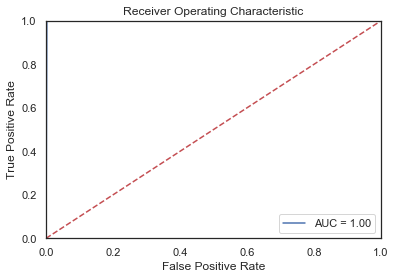

In [1384]:
target_names = ['0','1']
print(classification_report(y_test_over, Y_pred, target_names=target_names, digits=1))
print("\n ------------------------------------\n")
print("ROC-AUC Score is ..:",roc_auc_score(y_test_over, Y_pred))
print("Log Loss Score is ..:",log_loss(y_test_over, Y_pred, eps=1e-15))
fpr, tpr, threshold = metrics.roc_curve(y_test_over, Y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1385]:
cm = confusion_matrix(y_test_over, Y_pred)
cm

array([[6529,   15],
       [   0, 6630]], dtype=int64)

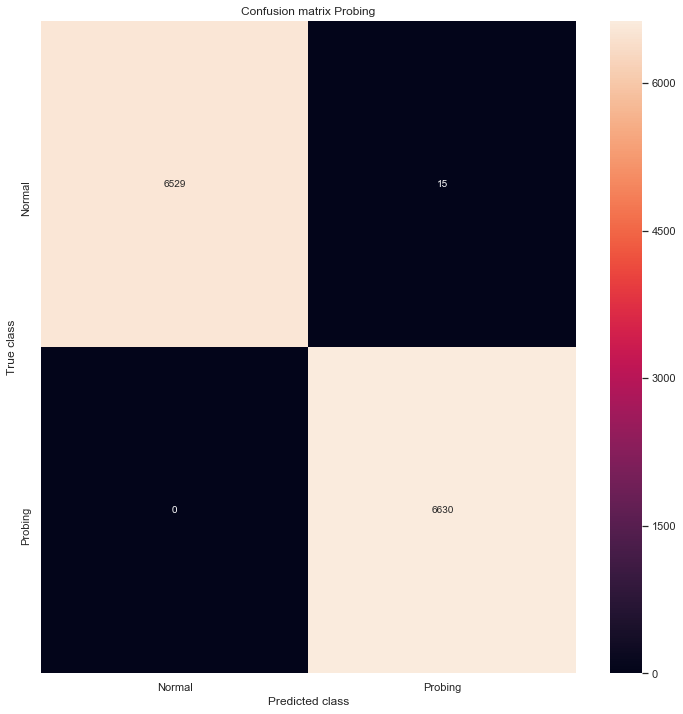

In [1386]:
LABELS = ["Normal", "Probing"]
plt.figure(figsize=(12, 12))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix Probing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

- SO WE CAN EASILY UNDERSTAND THAT NO CORELATION DATASET HAS BETTER RESULT.
- ALSO BY USING OVER SAMPLING, GOT NEARLY HUNDRED PERCENT ACCURACY.